## Case Background/ Context
6.7 million adults above 20 years have heart failure in the United States (CDC, 2024). In 2024, it was responsible for 13.9% of all deaths. Understanding the predictors of mortality for heart failure can help clinicians to provide patient-centered care and initiate care management protocols that improve prognosis.

Data from heart failure patients were extracted from the MIMIC-III database for a retrospective study to assess the predictors of in-hospital deaths of heart failure patients admitted to intensive care units (Li et al., 2021).

## Objectives
In this assignment, the data from the study by by Li et al. (2021) will be used to achieve the following objectives:
- To perform an exploratory data analysis on this sample of heart failure patients.
- Select predictors of in-hospital mortality of heart failure patients.
- To develop machine learning models to predict in-hospital mortality of ICU heart failure patients

## Variable Description
    - group:  Random assignment of patients into: 1= Derivation Group, 2= Validation Group
    - ID:  Patient identification number
    - outcome:  Status of the patient at discharge 0: Alive, 1: Dead.
    - age:  Age at the time of hospital admission (years)
    - gender:  1: Male, 2:Female
    - BMI:  Body mass index
    - hypertensive:  0: No, 1: Yes
    - atrialfibrillation:   0: No, 1: Yes
    - CHD with no MI:   0: No, 1: Yes
    - diabetes:   0: No, 1: Yes
    - deficiencyanemias:   absence of hypoferric anemia=0, presence of hypoferric anemia= 1
    - depression:   0: No, 1: Yes
    - Hyperlipemia:   0: No, 1: Yes
    - Renal failure:   0: No, 1: Yes
    - COPD:   0: No, 1: Yes
    - heart rate:  heart rate（bpm）
    - Systolic blood pressure:  Systolic blood pressure（mmHg)
    - Diastolic blood pressure:  Diastolic blood pressure（mmHg）
    - Respiratory rate:  Respiratory rate（bpm）
    - temperature:  Temperature in celcius (℃)
    - SP O2:  Oxygen saturation (%)
    - Urine output:  Urine output（ml）
    - hematocrit:  hematocrit（%）
    - RBC:  Red Blood Cells（m/uL)
    - MCH:  Mean Corpuscular Haemoglobin (pg)
    - MCHC:   Mean Corpuscular Haemoglobin Concentration (%) 
    - MCV:  Mean Corpuscular Volume (fL)
    - Leucocyte:  Leukocyte (K/uL)
    - Platelets:  Platelets(K/uL)
    - Neutrophils:  Neutrophils(%)
    - Basophils:  Basophils(%)
    - Lymphocyte: Lymphocyte(%)
    - PT:  Prothrombin time (seconds)
    - INR: International normalized ratio  
    - NT-proBNP:  N-terminal pro-brain natriuretic peptide (pg/mL)
    - RDW:  Red Cell Distribution Width
    - Creatine kinase:  Creatine kinase (IU/L)
    - Creatinine:   Creatinine(mg/dL)
    - Urea nitrogen:  Urea nitrogen(mg/dL)
    - glucose:  blood glucose(mEq/L)
    - Blood potassium:  Blood potassium(mEq/L)
    - Blood sodium:  Blood sodium(mEq/L)
    - Blood calcium:  Blood calcium(mg/dL)
    - Chloride:  Chloride(mEq/L)
    - Anion gap:  Anion gap(mEq/L)
    - Magnesium ion:  Magnesium ion(mg/dL)
    - PH:  Hydrogen ion concentration 
    - Bicarbonate:  Bicarbonate(mEq/L)
    - Lactic acid:  Lactic acid(mmol/L)
    - PCO2:  Partial pressure of carbon dioxide in arterial blood (mmHg)
    - EF:  Left ventricular ejection fraction (%)

## Import Packages

In [1]:
import pandas as pd
import numpy as np

# Data Visualization Packages
import seaborn as sns
import matplotlib.pyplot as plt

#Statistical Packages
import scipy.stats as stats 
from sklearn.model_selection import train_test_split#To split data into a train and test sets
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from tabulate import tabulate

#Advanced Statistical Packages
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)
#Filter out warnings
import warnings
warnings.filterwarnings("ignore")


## Import Dataset


In [2]:
data=pd.read_csv('assignment8.csv')

#Read the first 5 rows of the dataset
data.head()

group      ID  outcome  age  gendera        BMI  hypertensive  \
0      1  125047      0.0   72        1  37.588179             0   
1      1  139812      0.0   75        2        NaN             0   
2      1  109787      0.0   83        2  26.572634             0   
3      1  130587      0.0   43        2  83.264629             0   
4      1  138290      0.0   75        2  31.824842             1   

   atrialfibrillation  CHD with no MI  diabetes  ...  Blood sodium  \
0                   0               0         1  ...    138.750000   
1                   0               0         0  ...    138.888889   
2                   0               0         0  ...    140.714286   
3                   0               0         0  ...    138.500000   
4                   0               0         0  ...    136.666667   

   Blood calcium    Chloride  Anion gap  Magnesium ion     PH  Bicarbonate  \
0       7.463636  109.166667  13.166667       2.618182  7.230    21.166667   
1       8.162500   98.444444  11.444444       1.887500  7.225    33.444444   
2       8.266667  105.857143  10.000000       2.157143  7.268    30.571429   
3       9.476923   92.071429  12.357143       1.942857  7.370    38.571429   
4       8.733333  104.500000  15.166667       1.650000  7.250    22.000000   

   Lactic acid  PCO2  EF  
0          0.5  40.0  55  
1          0.5  78.0  55  
2          0.5  71.5  35  
3          0.6  75.0  55  
4          0.6  50.0  55  

[5 rows x 51 columns]

## Initial Data Overview

In [3]:
data.shape

(1177, 51)

#### Observation:
The dataset has 1177 rows and 51 columns

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1177 entries, 0 to 1176
Data columns (total 51 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   group                     1177 non-null   int64  
 1   ID                        1177 non-null   int64  
 2   outcome                   1176 non-null   float64
 3   age                       1177 non-null   int64  
 4   gendera                   1177 non-null   int64  
 5   BMI                       962 non-null    float64
 6   hypertensive              1177 non-null   int64  
 7   atrialfibrillation        1177 non-null   int64  
 8   CHD with no MI            1177 non-null   int64  
 9   diabetes                  1177 non-null   int64  
 10  deficiencyanemias         1177 non-null   int64  
 11  depression                1177 non-null   int64  
 12  Hyperlipemia              1177 non-null   int64  
 13  Renal failure             1177 non-null   int64  
 14  COPD    

#### Observation:
- The dataset is made up of float and integer data types


In [5]:
data.nunique() #Displays a list of the number of unique variables in each column

group                          2
ID                          1177
outcome                        2
age                           68
gendera                        2
BMI                          933
hypertensive                   2
atrialfibrillation             2
CHD with no MI                 2
diabetes                       2
deficiencyanemias              2
depression                     2
Hyperlipemia                   2
Renal failure                  2
COPD                           2
heart rate                  1094
Systolic blood pressure     1102
Diastolic blood pressure    1077
Respiratory rate            1004
temperature                  775
SP O2                        866
Urine output                 810
hematocrit                  1056
RBC                         1045
MCH                          926
MCHC                         803
MCV                          601
RDW                          836
Leucocyte                    983
Platelets                   1085
Neutrophil

In [6]:
data.duplicated().sum()

0

#### Observation
- There is no duplicated data in this dataset

In [7]:
data.isnull().sum()

group                         0
ID                            0
outcome                       1
age                           0
gendera                       0
BMI                         215
hypertensive                  0
atrialfibrillation            0
CHD with no MI                0
diabetes                      0
deficiencyanemias             0
depression                    0
Hyperlipemia                  0
Renal failure                 0
COPD                          0
heart rate                   13
Systolic blood pressure      16
Diastolic blood pressure     16
Respiratory rate             13
temperature                  19
SP O2                        13
Urine output                 36
hematocrit                    0
RBC                           0
MCH                           0
MCHC                          0
MCV                           0
RDW                           0
Leucocyte                     0
Platelets                     0
Neutrophils                 144
Basophil

#### Observation
- There is a significant amount of missing data from the  dataset.
- PCO2 has the largest amount of missing data (294) which represents about 25% of the entire dataset

## Data Cleaning

### Step 1: Create a Copy of the Original Dataset

In [8]:
df= data.copy()

### Step 2: Drop ID Column

In [9]:
df=df.drop('ID', axis=1)
df.head()

group  outcome  age  gendera        BMI  hypertensive  atrialfibrillation  \
0      1      0.0   72        1  37.588179             0                   0   
1      1      0.0   75        2        NaN             0                   0   
2      1      0.0   83        2  26.572634             0                   0   
3      1      0.0   43        2  83.264629             0                   0   
4      1      0.0   75        2  31.824842             1                   0   

   CHD with no MI  diabetes  deficiencyanemias  ...  Blood sodium  \
0               0         1                  1  ...    138.750000   
1               0         0                  1  ...    138.888889   
2               0         0                  1  ...    140.714286   
3               0         0                  0  ...    138.500000   
4               0         0                  1  ...    136.666667   

   Blood calcium    Chloride  Anion gap  Magnesium ion     PH  Bicarbonate  \
0       7.463636  109.166667  13.166667       2.618182  7.230    21.166667   
1       8.162500   98.444444  11.444444       1.887500  7.225    33.444444   
2       8.266667  105.857143  10.000000       2.157143  7.268    30.571429   
3       9.476923   92.071429  12.357143       1.942857  7.370    38.571429   
4       8.733333  104.500000  15.166667       1.650000  7.250    22.000000   

   Lactic acid  PCO2  EF  
0          0.5  40.0  55  
1          0.5  78.0  55  
2          0.5  71.5  35  
3          0.6  75.0  55  
4          0.6  50.0  55  

[5 rows x 50 columns]

### Step 3: Rename Columns

In [10]:
# Remove spaces between column names and replace with underscores
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Standardize name format and correct typographical errors
df=df.rename(columns={
    'gendera': 'gender', 
    'bmi': 'bmi',
    'chd_with_no_mi': 'chd_with_no_mi',
    'deficiencyanemias': 'deficiency_anemias',
    'renal_failure': 'renal_failure',
    'heart_rate_': 'heart_rate',
    'systolic_blood_pressure': 'systolic_blood_pressure',
    'diastolic_blood_pressure': 'diastolic_blood_pressure',
    'respiratory_rate_': 'respiratory_rate',
    'atrialfibrillation': 'atrial_fibrillation',
    'sp_O2 ': 'spO2',
    'urine_output': 'urine_output',
    'creatine_kinase': 'creatine_kinase',
    'urea_nitrogen': 'urea_nitrogen',
    'blood_potassium': 'blood_potassium',
    'blood_sodium': 'blood_sodium',
    'blood_calcium': 'blood_calcium',
    'anion_gap': 'anion_gap',
    'magnesium_ion': 'magnesium_ion',
    'hyperlipemia': 'hyperlipidemia',
    'copd': 'copd',
    'lactic_acid': 'lactic_acid',
    'respiratory_rate': 'respiratory_rate',
    'rbc': 'rbc',
    'mch': 'MCH',
    'mchc': 'MCHC',
    'mcv': 'MCV',
    'rdw': 'RDW',
    'leucocyte': 'leukocyte',  
    'platelets': 'platelets',
    'neutrophils': 'neutrophils',
    'basophils': 'basophils',
    'lymphocyte': 'lymphocyte',
    'pt': 'prothrombin',
    'inr': 'INR',
    'nt-probnp': 'nt_probnp',
    'creatinine': 'creatinine',
    'chloride': 'chloride',
    'ph': 'pH',
    'bicarbonate': 'bicarbonate',
    'pCO2': 'pCO2', 
    'ef': 'EF',
})

#### Comment
- Column names with spaces and dashes instead of underscores have been corrected.
- Mispelled column names have also been renamed

### Step 4: Clean and Transform 'Outcome' Column

In [11]:
#Drop missing data from column
df.dropna(subset=['outcome'], inplace=True)

df['outcome'].isnull().sum()

#Change values in 'outcome' column to an integer
df['outcome']=df['outcome'].astype('int')

### Step 4:  Data Type Conversion:  Categorical Variables from float/integer 

In [12]:
df[['group', 'outcome', 'gender', 'hypertensive', 'atrial_fibrillation',
       'chd_with_no_mi', 'diabetes', 'deficiency_anemias', 'depression',
       'hyperlipidemia', 'renal_failure', 'copd']]= df[['group', 'outcome', 'gender',
    'hypertensive', 'atrial_fibrillation', 'chd_with_no_mi', 'diabetes', 'deficiency_anemias', 
    'depression', 'hyperlipidemia','renal_failure', 'copd']].astype('category')


### Step 5: Dealing With Missing Data 

#### Numerical Columns: Impute With Median Value

In [13]:
# Fill missing values with the median for numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns


for col in numerical_columns:
    if col in df.columns:
        df[col].fillna(df[col].median(), inplace=True)

#### Categorical Columns: Impute with Modal Value

In [14]:
# Select categorical columns
categorical_columns = df.select_dtypes(include=['category']).columns

# Fill missing values with the mode for categorical columns
for col in categorical_columns:
    if col in df.columns:
        df[col].fillna(df[col].mode()[0], inplace=True)

## Exploratoratoy Analysis After Initial Data Cleaning

In [15]:
#View 10 random samples from the dataset
df.sample(10)

group outcome  age gender        bmi hypertensive atrial_fibrillation  \
544      1       0   73      2  26.935538            1                   0   
120      1       0   70      1  28.595574            1                   1   
581      1       0   82      2  43.486198            0                   0   
265      1       1   89      2  31.015625            0                   1   
1070     2       0   76      1  24.979389            0                   1   
399      1       0   89      1  27.473199            1                   0   
148      1       1   86      2  41.334760            1                   0   
891      2       0   81      1  27.125054            0                   1   
926      2       0   67      2  31.451676            1                   0   
719      1       0   63      2  42.912538            0                   0   

     chd_with_no_mi diabetes deficiency_anemias  ... blood_sodium  \
544               0        1                  1  ...   137.000000   
120               0        1                  0  ...   138.285714   
581               0        0                  0  ...   136.250000   
265               0        0                  0  ...   142.200000   
1070              0        1                  0  ...   142.400000   
399               0        0                  0  ...   140.583333   
148               0        0                  0  ...   144.333333   
891               1        0                  0  ...   128.909091   
926               0        0                  1  ...   146.000000   
719               0        1                  1  ...   130.000000   

     blood_calcium    chloride  anion_gap  magnesium_ion        pH  \
544       9.414286   98.000000  13.375000       2.028571  7.430000   
120       8.466667  104.285714  12.666667       2.080000  7.390000   
581       7.580000  105.250000  10.875000       2.075000  7.310000   
265       8.325000  103.800000  12.200000       2.400000  7.258000   
1070      8.420000  102.666667  18.066667       2.400000  7.415000   
399       8.900000  104.166667  13.333333       2.166667  7.350000   
148       7.291667  109.666667  13.555556       2.173333  7.390000   
891       8.022222   99.818182  15.800000       2.100000  7.520000   
926       7.160000  112.000000  15.545455       2.281818  7.399091   
719       7.737500   96.545455   7.636364       2.312500  7.380000   

      bicarbonate  lactic_acid       pco2  EF  
544     29.750000     2.400000  43.000000  55  
120     25.333333     1.100000  38.000000  75  
581     24.000000     2.700000  43.000000  35  
265     30.800000     1.414286  64.300000  55  
1070    25.600000     2.950000  44.000000  50  
399     27.083333     1.766667  40.500000  50  
148     24.888889     1.150000  45.285714  75  
891     17.900000     1.200000  21.500000  20  
926     21.909091     1.471429  40.272727  75  
719     30.545455     1.600000  43.000000  75  

[10 rows x 50 columns]

In [16]:
#Inspect shape of the dataset after cleaning
df.shape

(1176, 50)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1176 entries, 0 to 1176
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   group                     1176 non-null   category
 1   outcome                   1176 non-null   category
 2   age                       1176 non-null   int64   
 3   gender                    1176 non-null   category
 4   bmi                       1176 non-null   float64 
 5   hypertensive              1176 non-null   category
 6   atrial_fibrillation       1176 non-null   category
 7   chd_with_no_mi            1176 non-null   category
 8   diabetes                  1176 non-null   category
 9   deficiency_anemias        1176 non-null   category
 10  depression                1176 non-null   category
 11  hyperlipidemia            1176 non-null   category
 12  renal_failure             1176 non-null   category
 13  copd                      1176 non-null   catego

In [18]:
df.nunique()

group                          2
outcome                        2
age                           68
gender                         2
bmi                          934
hypertensive                   2
atrial_fibrillation            2
chd_with_no_mi                 2
diabetes                       2
deficiency_anemias             2
depression                     2
hyperlipidemia                 2
renal_failure                  2
copd                           2
heart_rate                  1095
systolic_blood_pressure     1102
diastolic_blood_pressure    1077
respiratory_rate            1005
temperature                  776
sp_o2                        867
urine_output                 810
hematocrit                  1055
rbc                         1044
MCH                          926
MCHC                         803
MCV                          601
RDW                          836
leukocyte                    983
platelets                   1085
neutrophils                  636
basophils 

In [19]:
df.isnull().sum()

group                       0
outcome                     0
age                         0
gender                      0
bmi                         0
hypertensive                0
atrial_fibrillation         0
chd_with_no_mi              0
diabetes                    0
deficiency_anemias          0
depression                  0
hyperlipidemia              0
renal_failure               0
copd                        0
heart_rate                  0
systolic_blood_pressure     0
diastolic_blood_pressure    0
respiratory_rate            0
temperature                 0
sp_o2                       0
urine_output                0
hematocrit                  0
rbc                         0
MCH                         0
MCHC                        0
MCV                         0
RDW                         0
leukocyte                   0
platelets                   0
neutrophils                 0
basophils                   0
lymphocyte                  0
prothrombin                 0
INR       

In [20]:
df.duplicated().sum()

0

#### Observations
- The cleaned dataset has 1176 rows and 50 columns.
- Columns have been renamed to facilitate smooth indexing and analysis.
- There is no missing value.
- There is no duplicated dataset.
- The dataset now has categorical, float and integer data types.

## Statistical Analyisis

In [21]:
df.describe()

age          bmi   heart_rate  systolic_blood_pressure  \
count  1176.000000  1176.000000  1176.000000              1176.000000   
mean     74.047619    29.846932    84.566001               117.971224   
std      13.437241     8.465107    15.936989                17.257678   
min      19.000000    13.346801    36.000000                75.000000   
25%      65.000000    25.274510    72.535035               105.490385   
50%      77.000000    28.312474    83.610799               116.128205   
75%      85.000000    32.104250    95.613929               128.489286   
max      99.000000   104.970366   135.708333               203.000000   

       diastolic_blood_pressure  respiratory_rate  temperature        sp_o2  \
count               1176.000000       1176.000000  1176.000000  1176.000000   
mean                  59.520811         20.797132    36.676880    96.274731   
std                   10.616945          3.982728     0.602896     2.286308   
min                   24.736842         11.137931    33.250000    75.916667   
25%                   52.286102         17.954237    36.287037    95.000000   
50%                   58.461538         20.372308    36.650794    96.452273   
75%                   65.409759         23.366983    37.016534    97.894608   
max                  107.000000         40.900000    39.132478   100.000000   

       urine_output   hematocrit  ...  blood_sodium  blood_calcium  \
count   1176.000000  1176.000000  ...   1176.000000    1176.000000   
mean    1892.601616    31.910614  ...    138.897009       8.501787   
std     1253.850105     5.203007  ...      4.146172       0.571440   
min        0.000000    20.311111  ...    114.666667       6.700000   
25%      997.250000    28.154375  ...    136.666667       8.150000   
50%     1675.000000    30.795455  ...    139.250000       8.500000   
75%     2475.000000    35.003125  ...    141.600000       8.869063   
max     8820.000000    55.425000  ...    154.736842      10.950000   

          chloride    anion_gap  magnesium_ion           pH  bicarbonate  \
count  1176.000000  1176.000000    1176.000000  1176.000000  1176.000000   
mean    102.292048    13.923755       2.120286     7.378895    26.912116   
std       5.334562     2.653463       0.251608     0.058396     5.169696   
min      80.266667     6.636364       1.400000     7.090000    12.857143   
25%      99.000000    12.250000       1.955556     7.350000    23.452020   
50%     102.516667    13.666667       2.092582     7.380000    26.500000   
75%     105.571429    15.404167       2.241964     7.410000    29.881250   
max     122.526316    25.500000       4.072727     7.580000    47.666667   

       lactic_acid         pco2           EF  
count  1176.000000  1176.000000  1176.000000  
mean      1.804292    44.903693    48.710034  
std       0.888894    11.067475    12.872604  
min       0.500000    18.750000    15.000000  
25%       1.300000    39.000000    40.000000  
50%       1.600000    43.000000    55.000000  
75%       2.002273    47.275974    55.000000  
max       8.333333    98.600000    75.000000  

[8 rows x 38 columns]

In [22]:
# Define an aggregate function for the mean, median, skew and curtosis of a dataset (Google Colab, 2023)
def aggregate_stats(df):
  """
  Calculates mean, mode, median, skew, and kurtosis for numerical columns in a DataFrame.

  Args:
    df: A pandas DataFrame.

  Returns:
    A pandas DataFrame with the calculated statistics.
  """

  # Select numerical columns
  numerical_cols = df.select_dtypes(include=['float', 'int']).columns

  # Calculate statistics
  stats_df = pd.DataFrame({
      'mean': df[numerical_cols].mean(),
      'median': df[numerical_cols].median(),
      'mode': df[numerical_cols].mode().iloc[0],  # Taking the first mode if multiple exist
      'skew': df[numerical_cols].skew(),
      'kurtosis': df[numerical_cols].kurtosis()
  })

  return stats_df

# Apply the function to your DataFrame
aggregate_stats(df)


mean       median         mode       skew  \
age                          74.047619    77.000000    89.000000  -0.854947   
bmi                          29.846932    28.312474    28.312474   2.572413   
heart_rate                   84.566001    83.610799    83.610799   0.303127   
systolic_blood_pressure     117.971224   116.128205   116.128205   0.713021   
diastolic_blood_pressure     59.520811    58.461538    58.461538   0.616094   
respiratory_rate             20.797132    20.372308    20.372308   0.553231   
temperature                  36.676880    36.650794    36.650794   0.136413   
sp_o2                        96.274731    96.452273    96.452273  -1.393286   
urine_output               1892.601616  1675.000000  1675.000000   1.443498   
hematocrit                   31.910614    30.795455    30.600000   0.925425   
rbc                           3.574702     3.489286     3.120000   0.932001   
MCH                          29.539803    29.752778    30.100000  -0.635930   
MCHC                         32.864584    32.988312    32.700000  -0.457765   
MCV                          89.902561    90.000000    92.000000  -0.202907   
RDW                          15.952854    15.506696    15.500000   1.378396   
leukocyte                    10.715043     9.683750     6.600000   2.587841   
platelets                   241.517507   222.666667   222.000000   1.489313   
neutrophils                  80.403771    82.469048    82.469048  -2.216225   
basophils                     0.382409     0.300000     0.300000  11.492976   
lymphocyte                   12.014964    10.466667    10.466667   2.700180   
prothrombin                  17.437939    14.636667    14.636667   2.708074   
INR                           1.620518     1.300000     1.100000   2.740117   
nt_probnp                 11011.039612  5837.750000   269.000000   2.143913   
creatine_kinase             224.851103    89.500000    89.500000  27.049371   
creatinine                    1.640661     1.285417     0.900000   3.988830   
urea_nitrogen                36.293574    30.611111    23.000000   1.483855   
glucose                     148.617329   136.400000   136.400000   1.480872   
blood_potassium               4.176425     4.114835     4.000000   0.954921   
blood_sodium                138.897009   139.250000   140.000000  -0.808876   
blood_calcium                 8.501787     8.500000     8.500000   0.147484   
chloride                    102.292048   102.516667   104.000000  -0.092570   
anion_gap                    13.923755    13.666667    13.000000   0.809677   
magnesium_ion                 2.120286     2.092582     2.000000   1.290889   
pH                            7.378895     7.380000     7.380000  -0.339583   
bicarbonate                  26.912116    26.500000    26.000000   0.483103   
lactic_acid                   1.804292     1.600000     1.600000   2.597486   
pco2                         44.903693    43.000000    43.000000   1.540333   
EF                           48.710034    55.000000    55.000000  -0.492064   

                            kurtosis  
age                         0.322940  
bmi                        12.416897  
heart_rate                 -0.272893  
systolic_blood_pressure     0.687385  
diastolic_blood_pressure    0.962570  
respiratory_rate            0.681775  
temperature                 1.810853  
sp_o2                       6.735272  
urine_output                3.430525  
hematocrit                  0.855417  
rbc                         1.280842  
MCH                         1.358692  
MCHC                        0.377062  
MCV                         1.168346  
RDW                         3.194648  
leukocyte                  15.949468  
platelets                   5.391352  
neutrophils                 9.367799  
basophils                 203.823881  
lymphocyte                 13.571462  
prothrombin                10.332174  
INR                        10.461090  
nt_probnp                   6.465369  
creatine_kinase 

#### Key Observations:
- Age: The mean age of patients in this sample is 74 years and the median age is 77 years.
- BMI: The meann BMI is 29.84.
- Blood pressure: The average blood pressure of the patients in the sample is 118/ 60mmHg.

## Univariate Analysis

In [23]:
# function to plot a boxplot and a histogram along the same scale.

def hist_box(data, column, figsize=(12, 7), kde=False, bins=None, title=None):
    """
    This function takes the following args:
    data: dataframe
    column: dataframe column
    figsize: size of figure (default (12,7))
    kde= False: do not show density curve 
    bins: number of bins for histogram (default None),
    title: Title of the column
    
    and plots a combined boxplot and histogram using seaborn
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=column, ax=ax_box2, showmeans=True, color="blue"
    )  # boxplot will be created the mean value of the column will be indicated
    sns.histplot(
        data=data, x=column, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=column, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[column].mean(), color="red", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[column].median(), color="green", linestyle="-"
    )  # Add median to the histogram

In [24]:
# function to create labeled barplots


def annotated_barplot(data, feature, perc=True, n=None):
    """
    This function plots a barplot with  the seaborn package 
    and shows the percentage at the top by taking the
    following args:

    data: dataframe
    feature: dataframe column
    perc: (default is False)
    n: displays the top n category levels (default is None)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # show the percentage of each class 
        else:
            label = p.get_height()  # count of each level 

        x = p.get_x() + p.get_width() / 2  # width 
        y = p.get_height()  # height 

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the graph

    plt.show()  

### Univariate Analysis of Numerical Variables

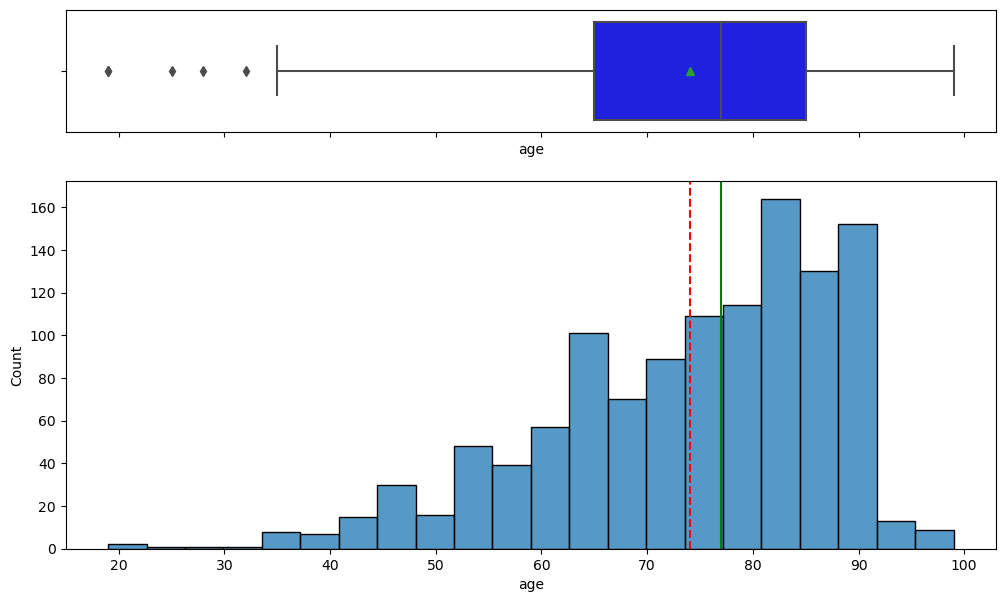

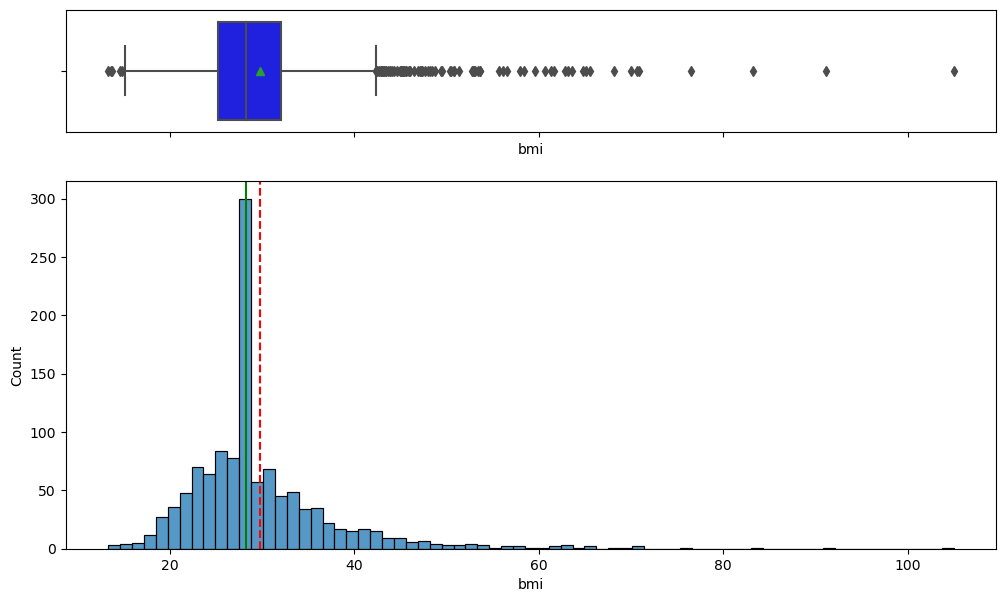

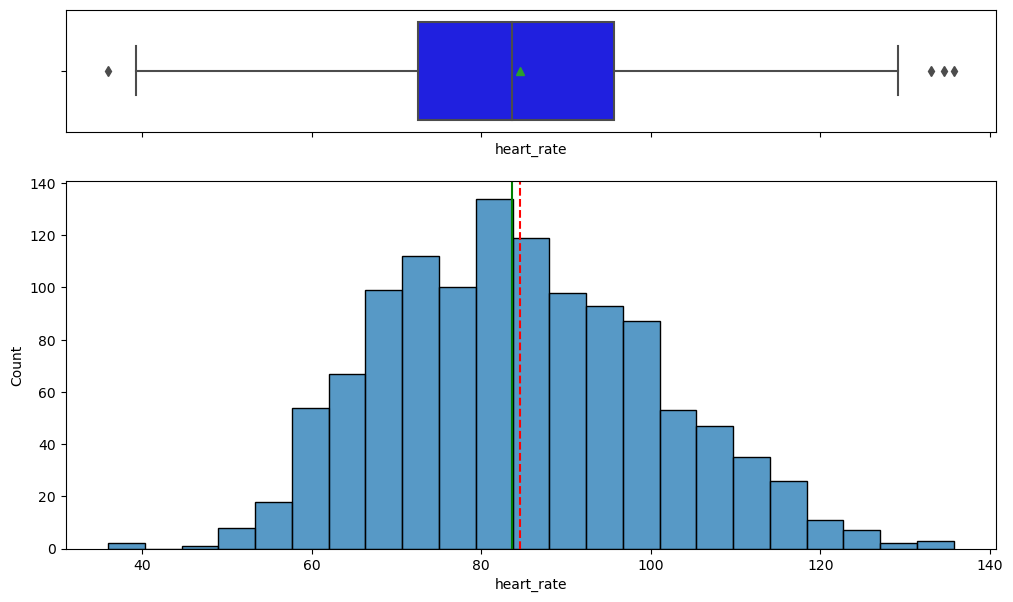

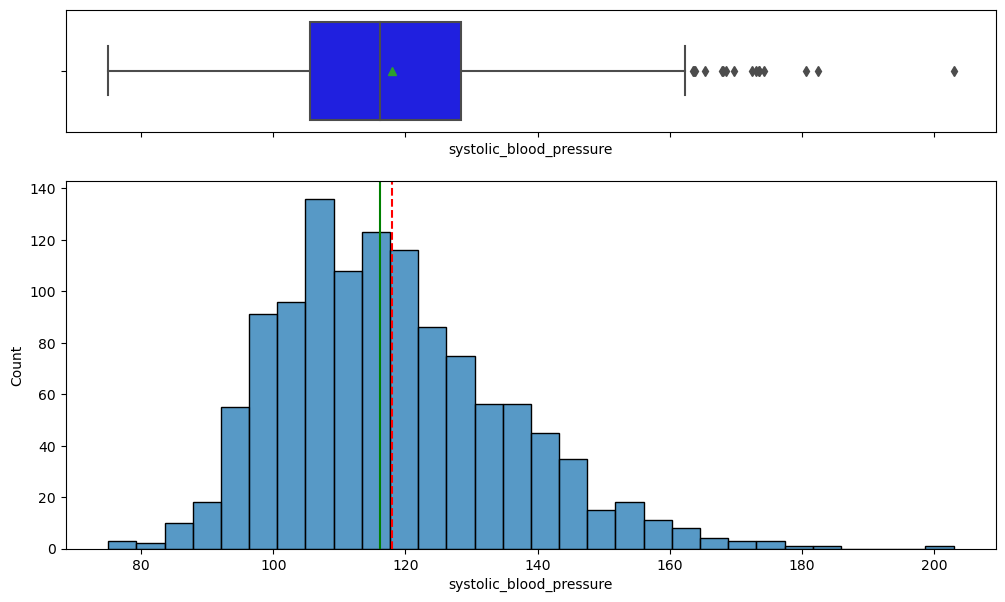

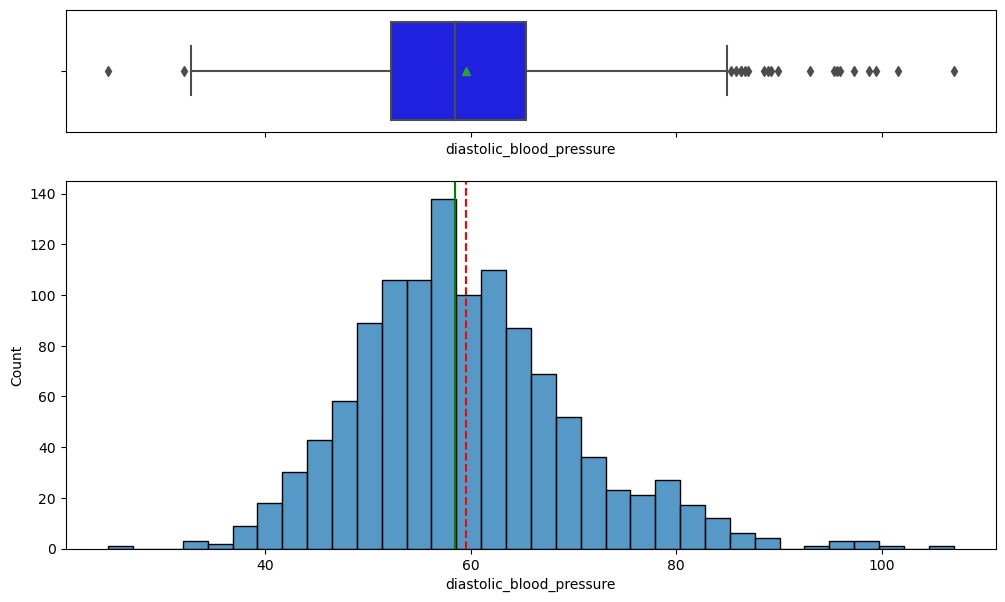

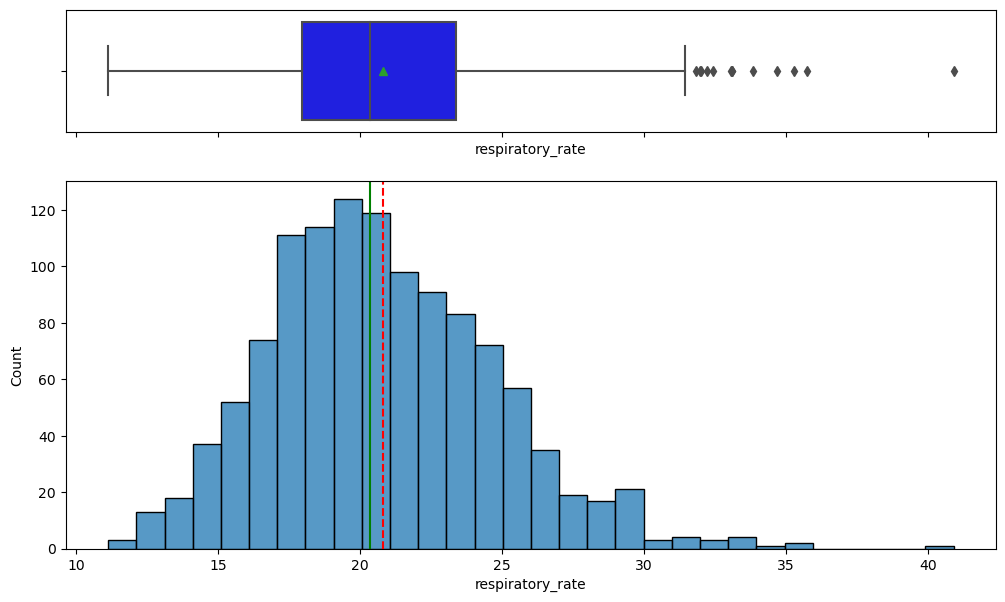

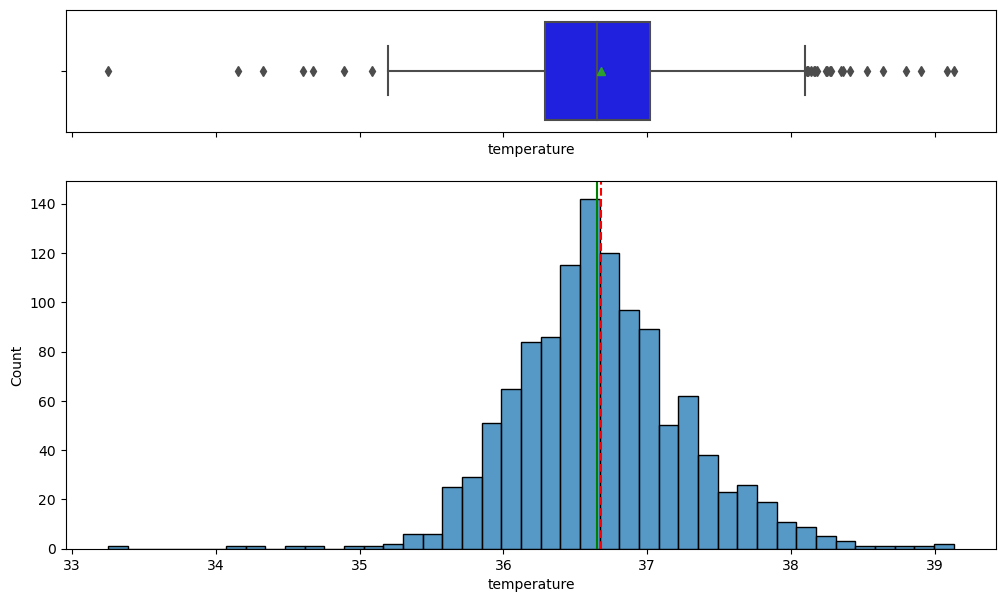

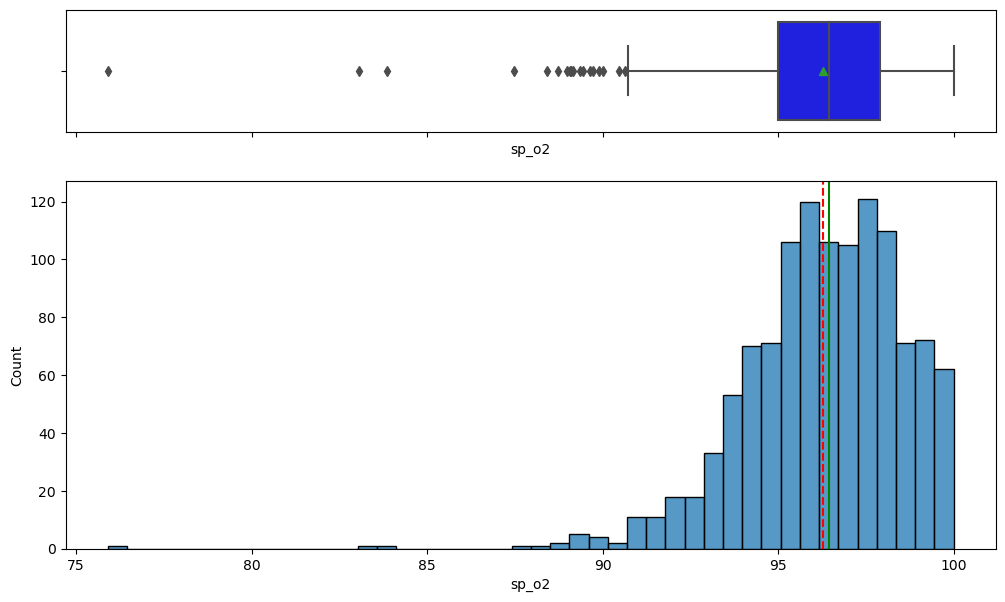

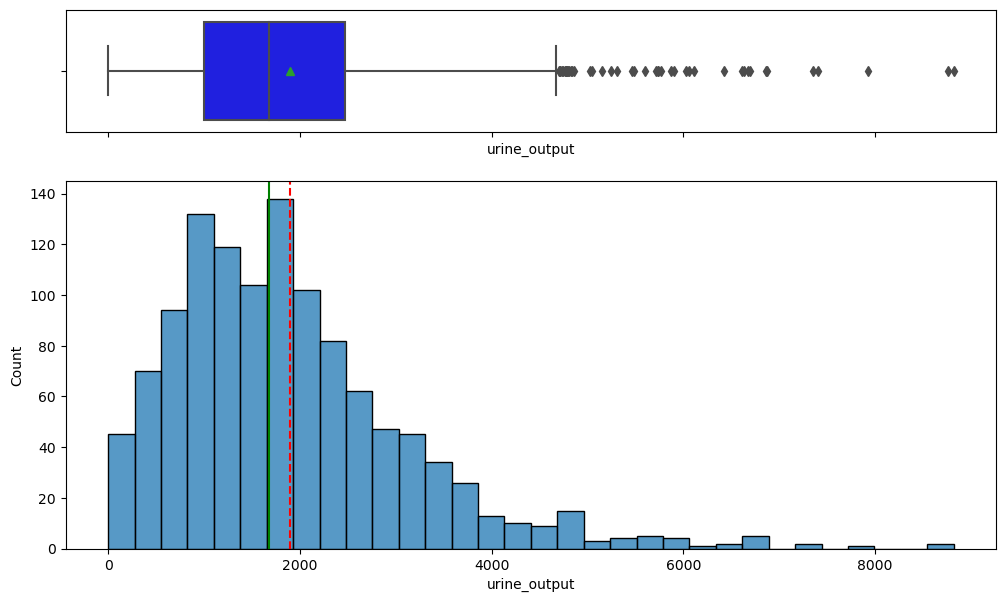

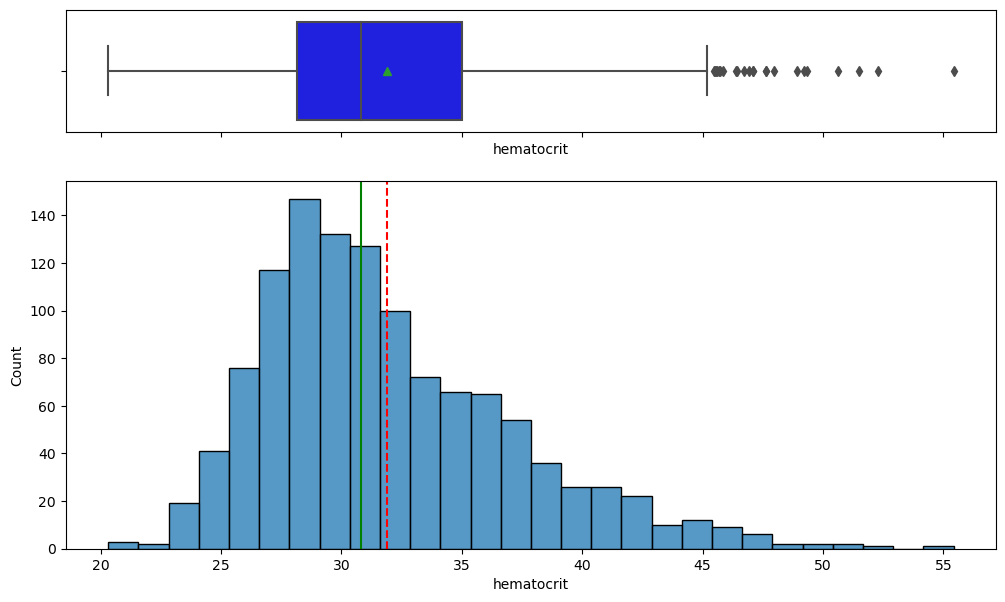

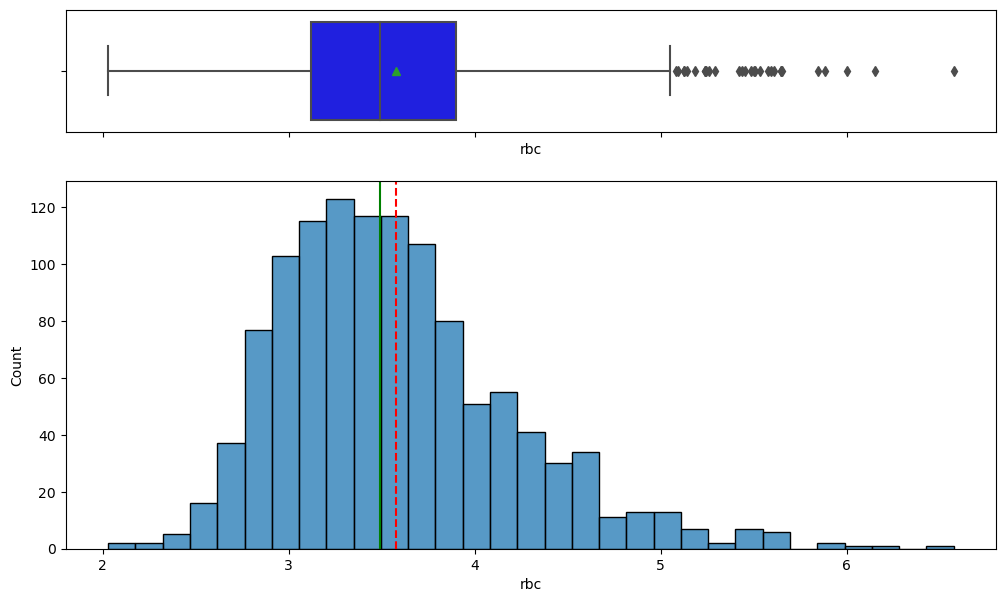

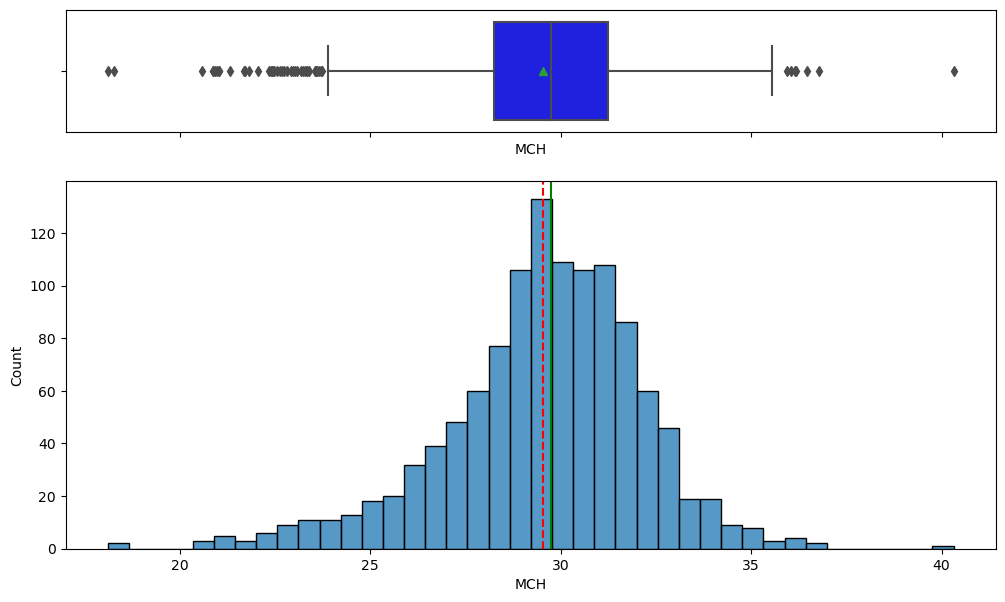

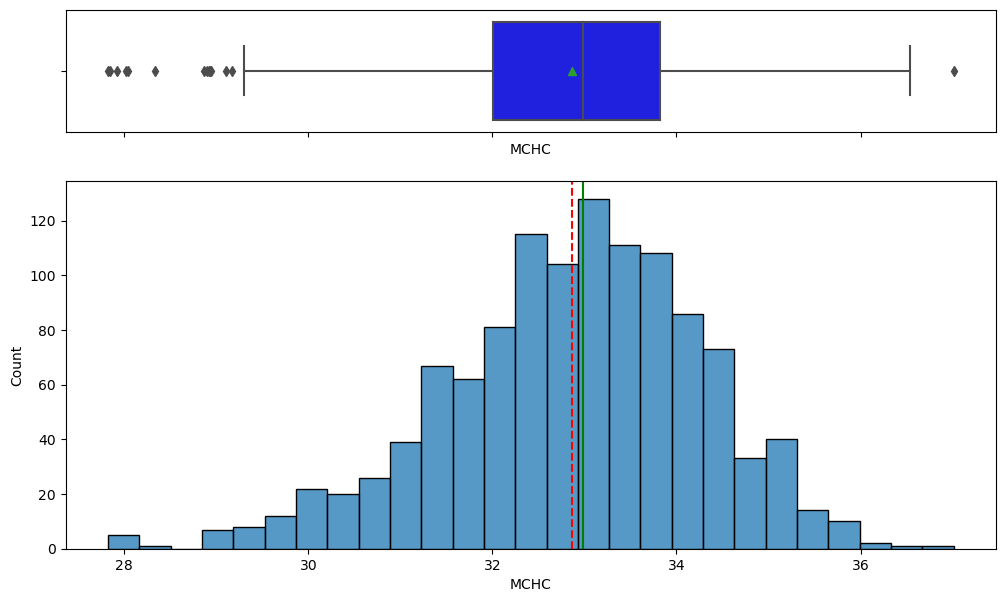

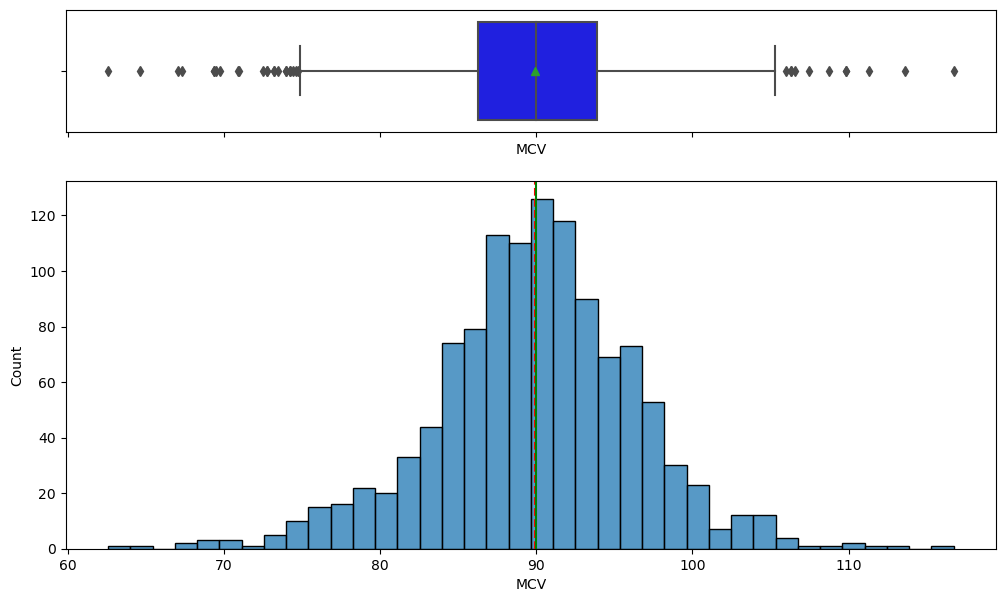

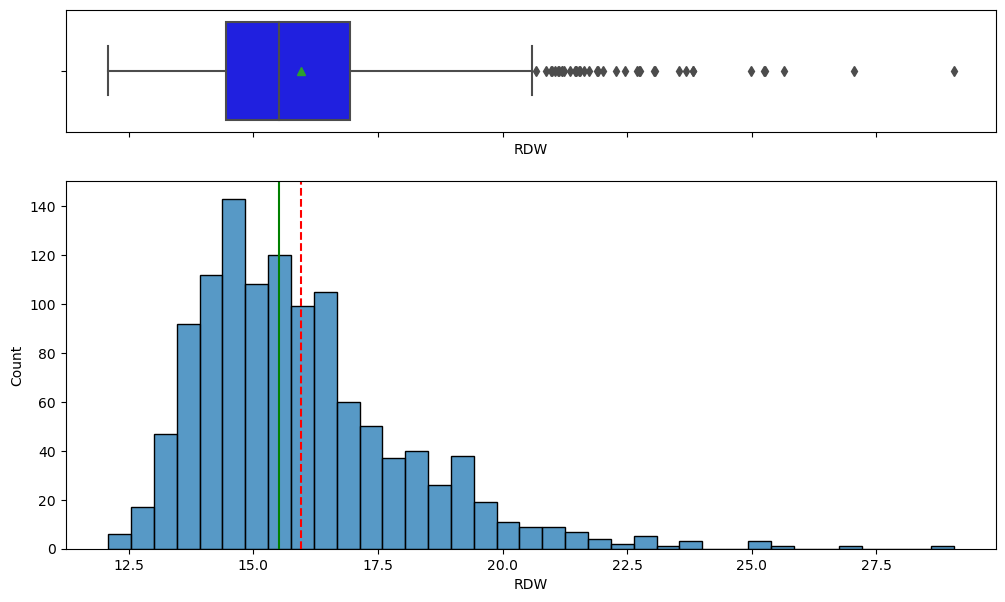

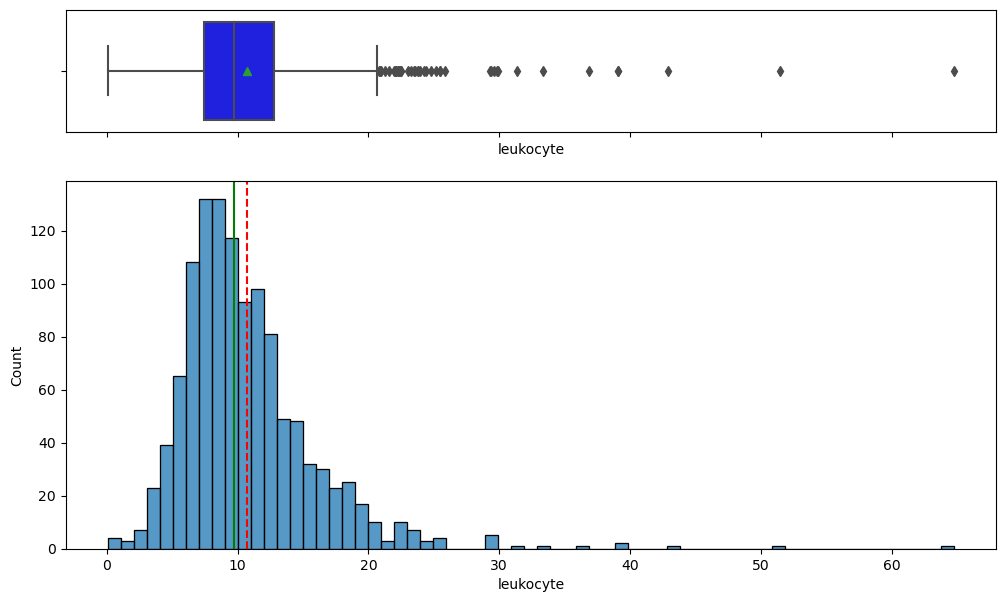

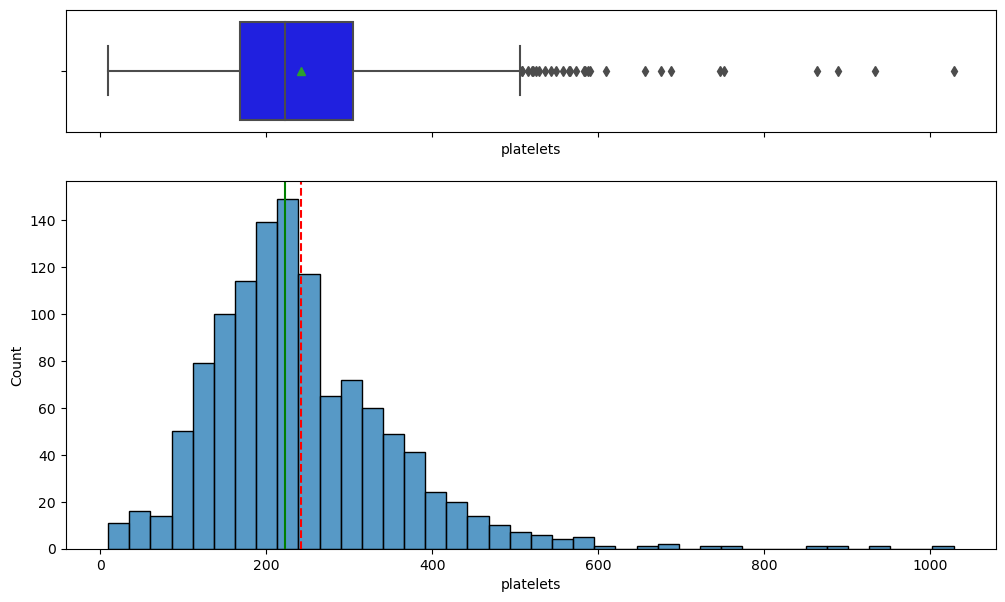

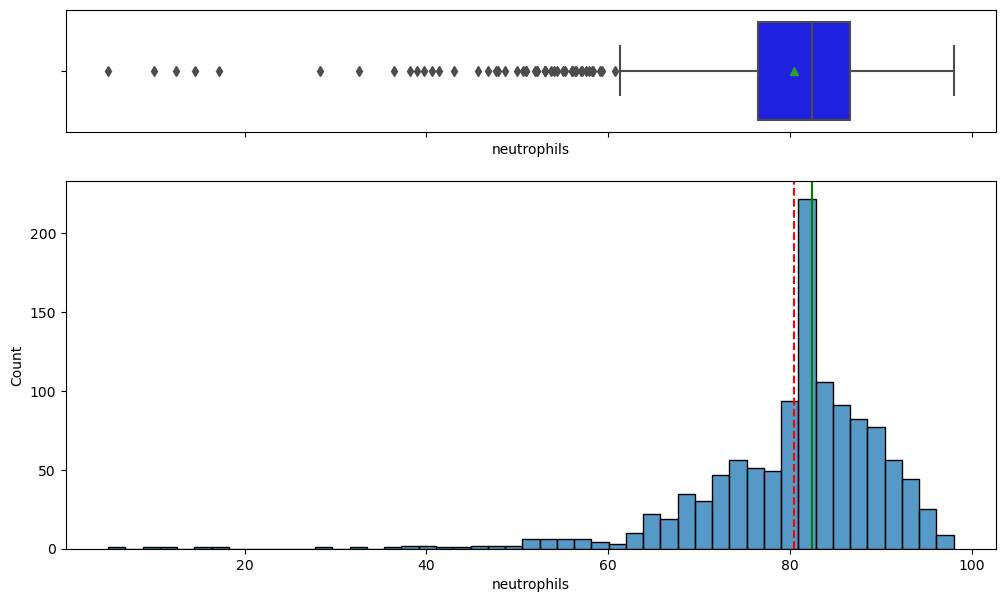

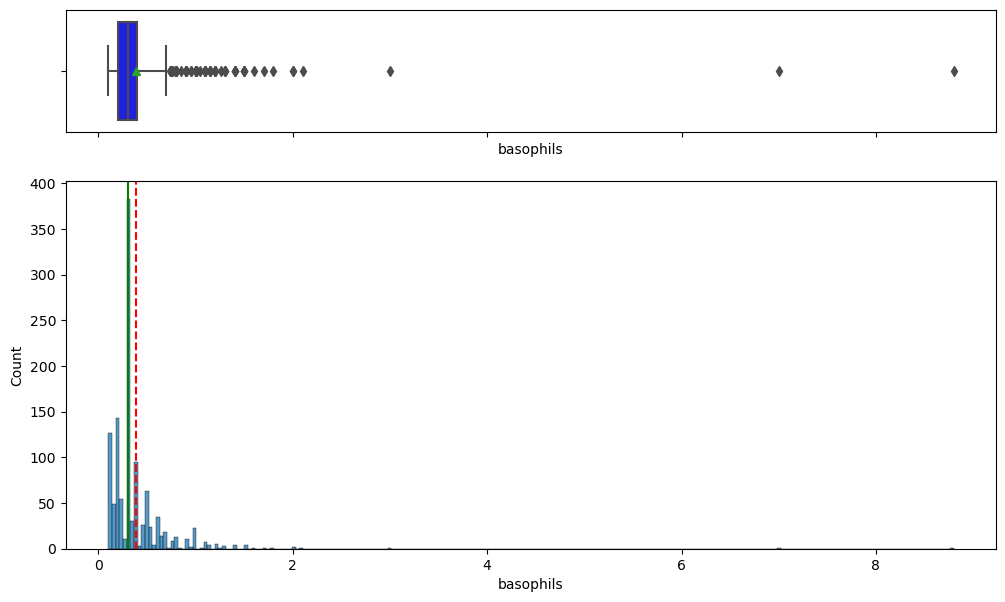

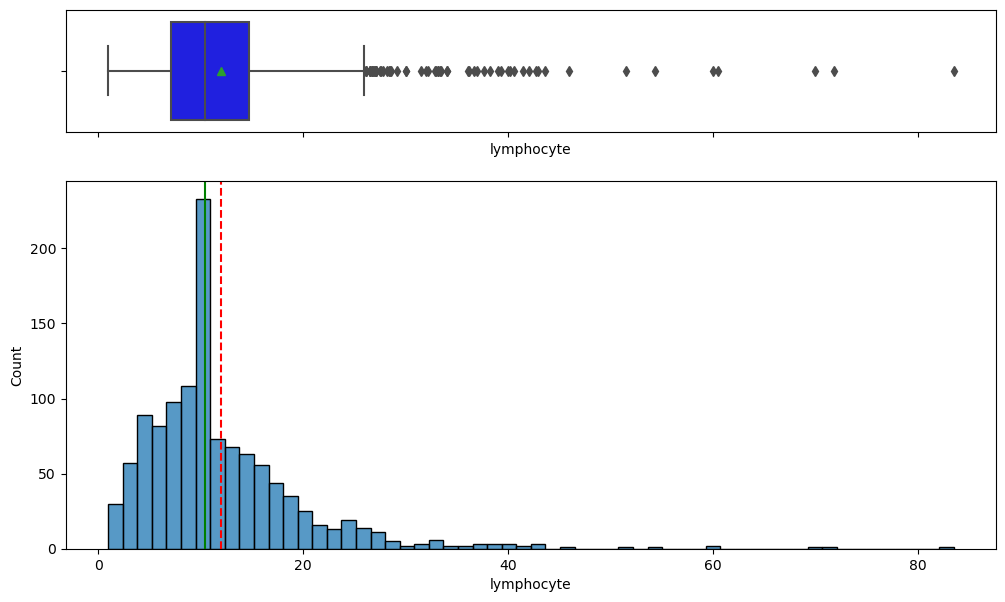

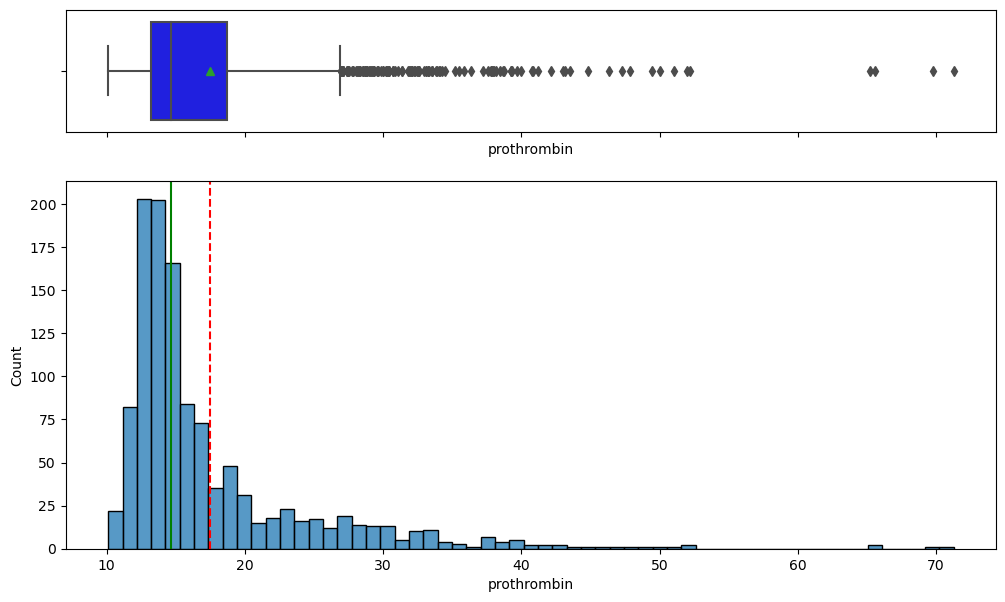

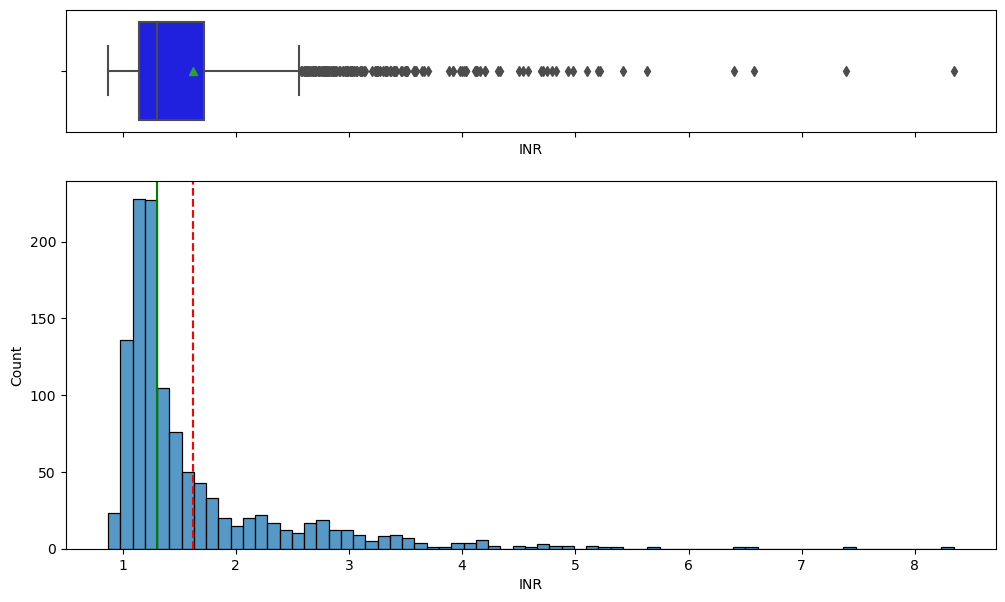

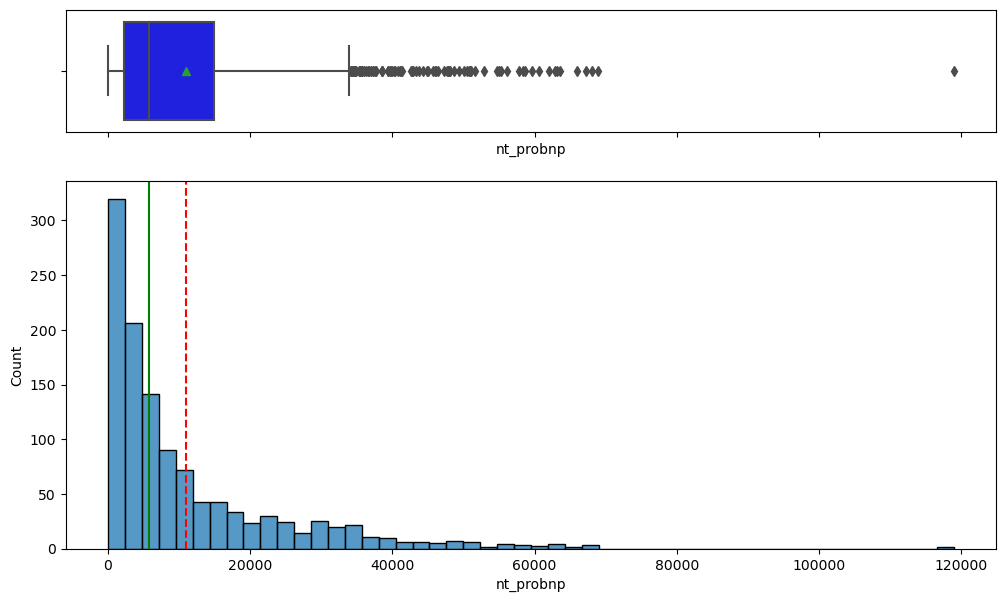

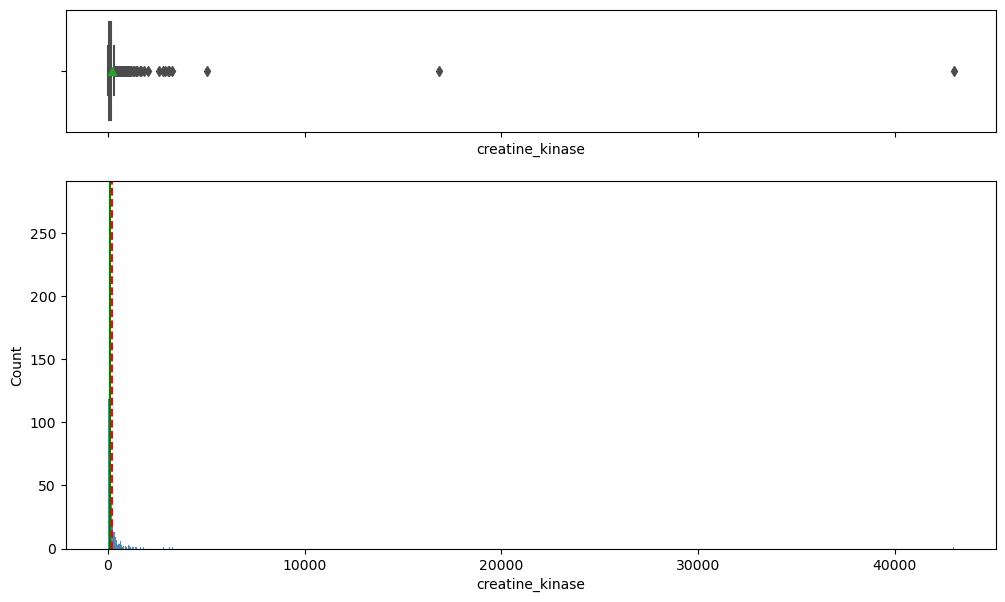

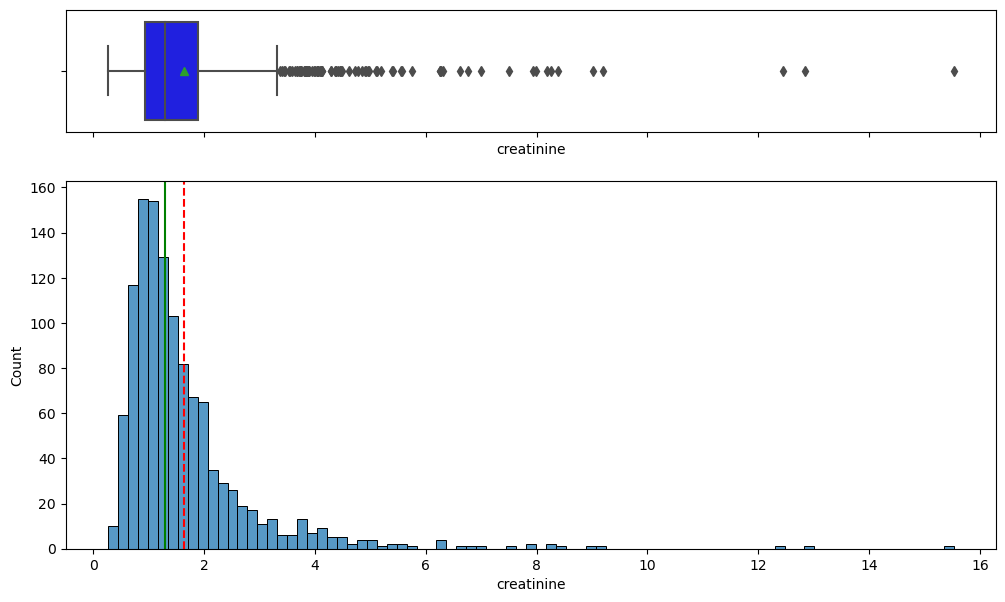

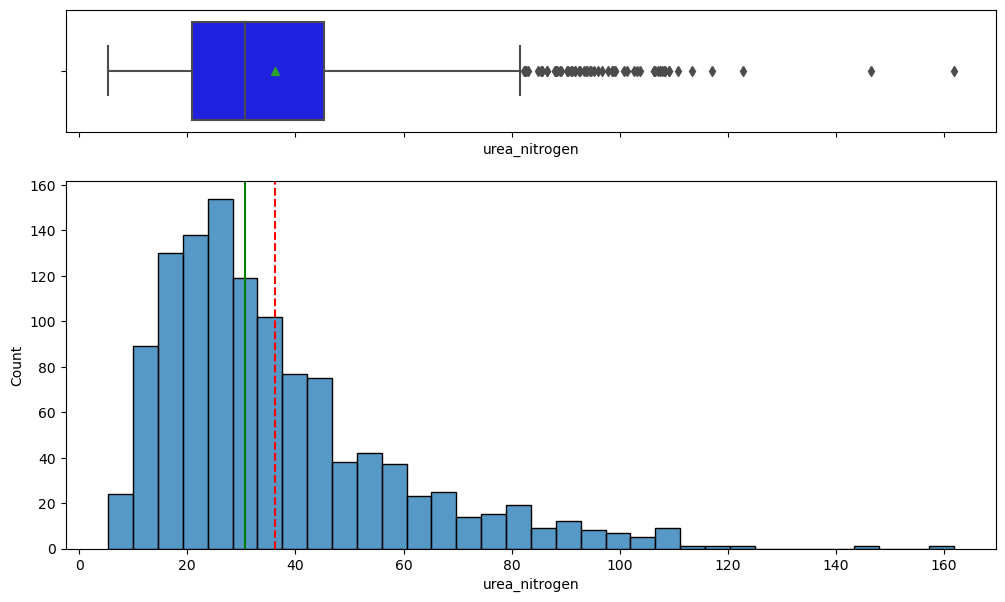

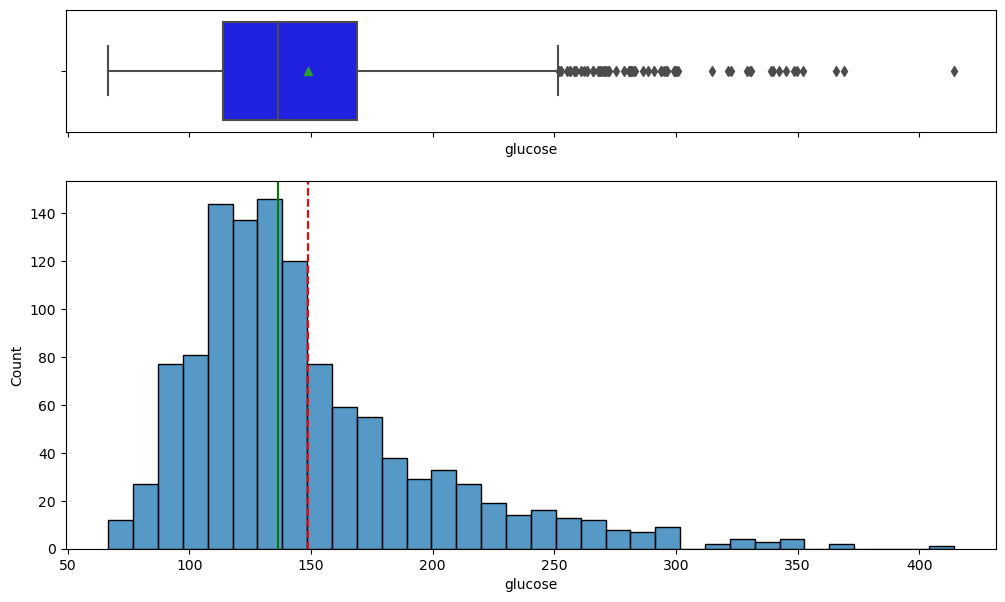

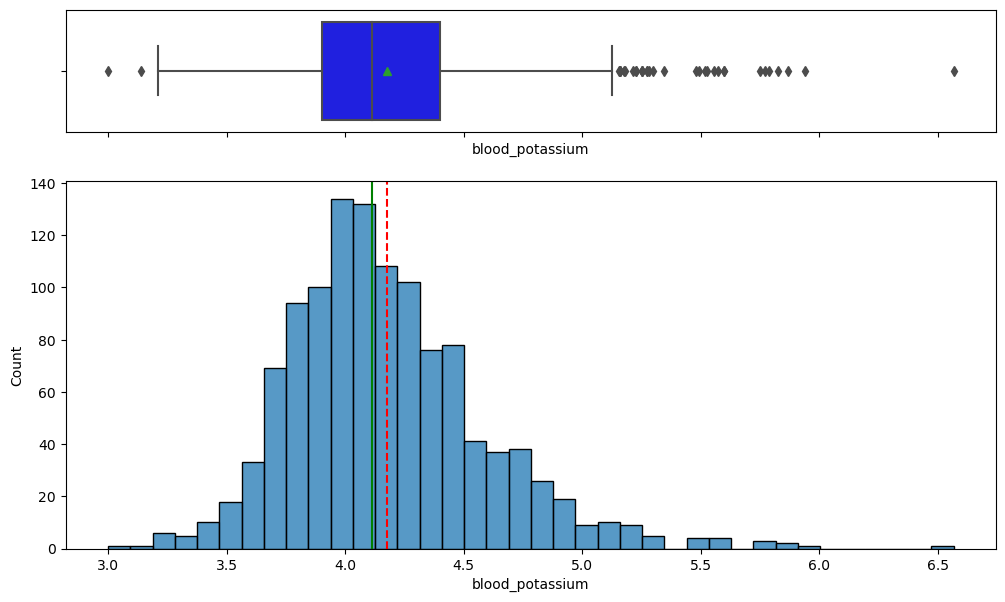

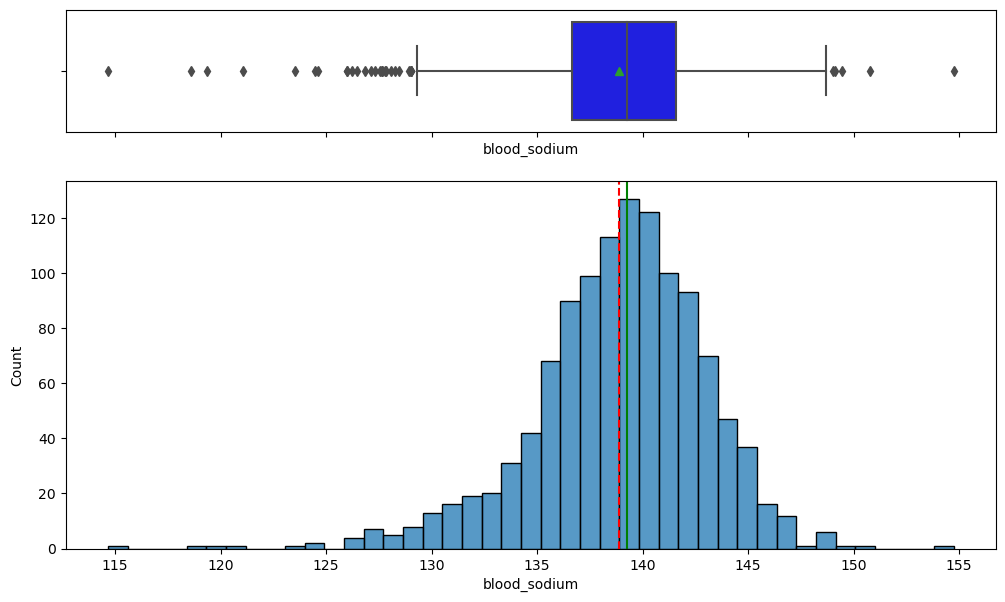

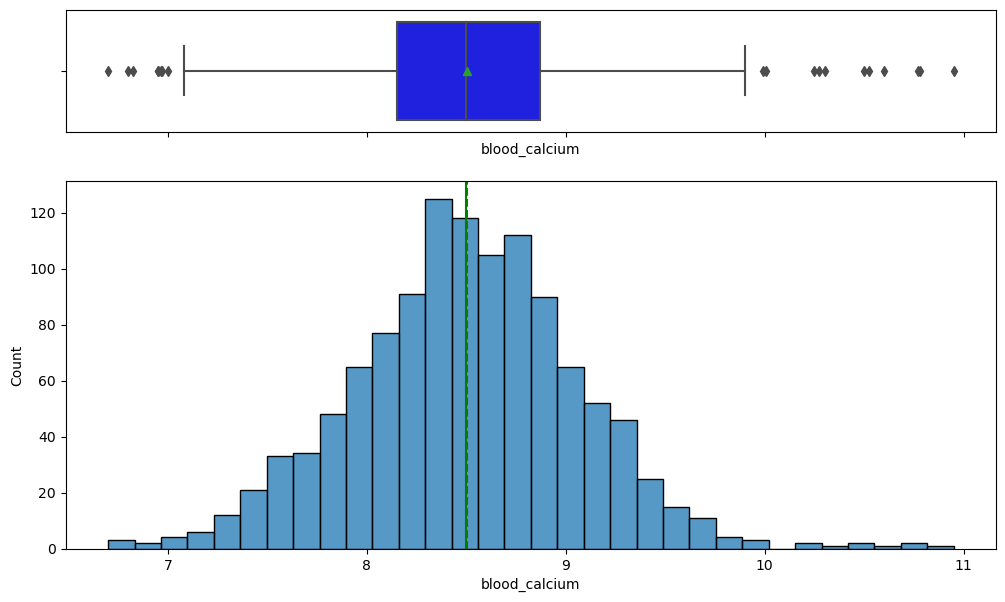

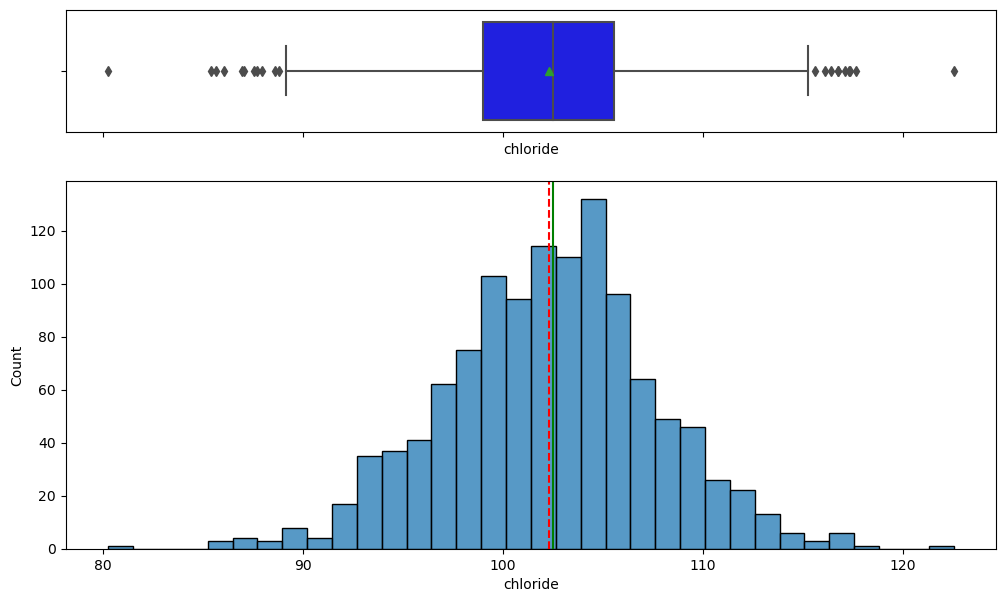

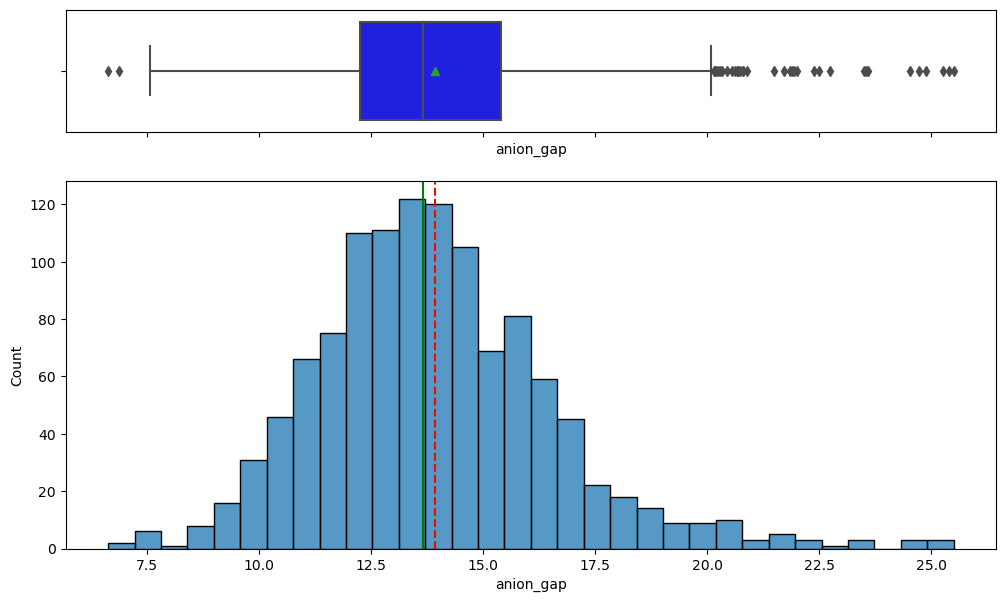

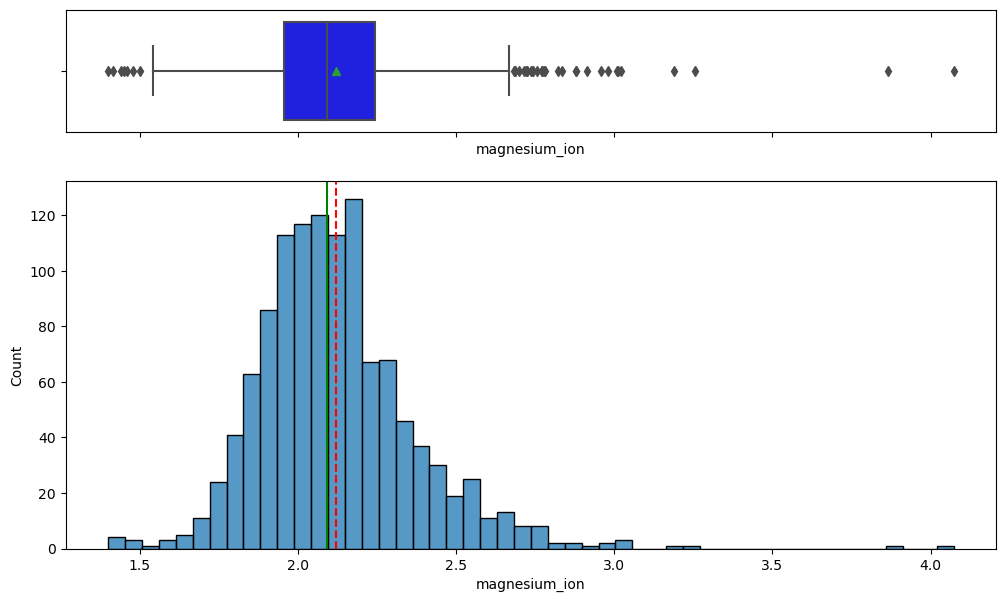

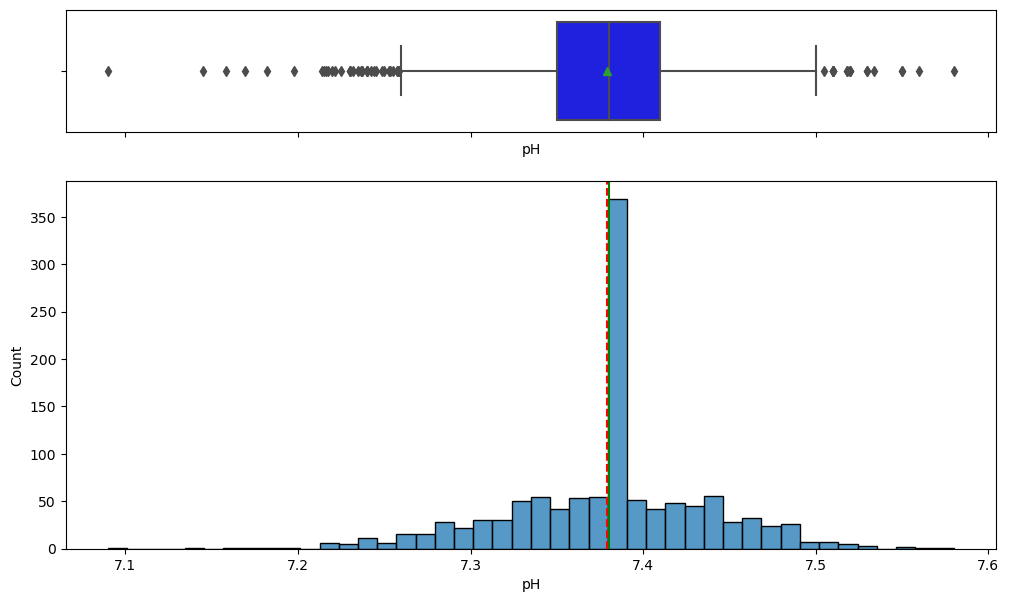

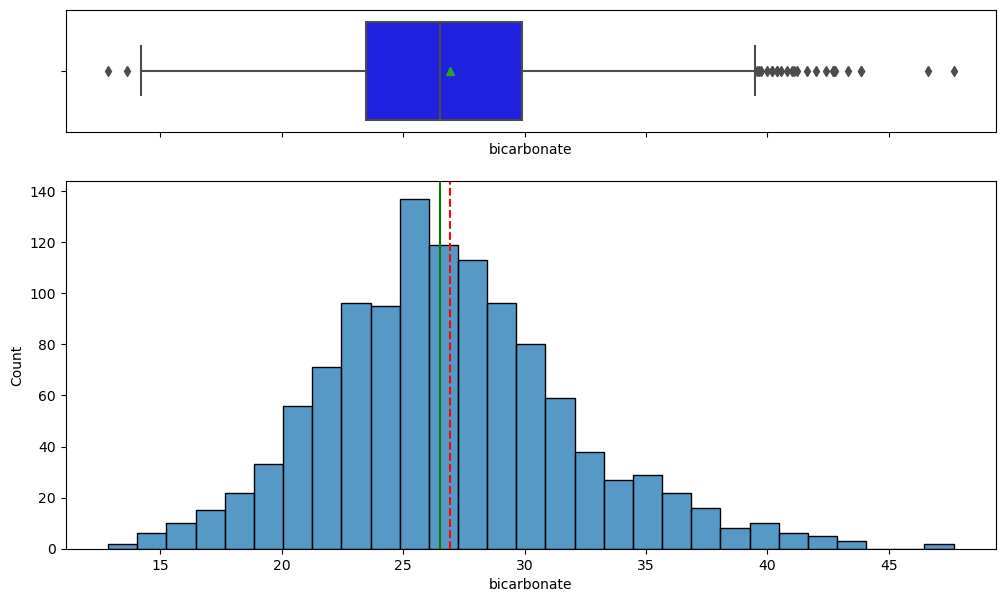

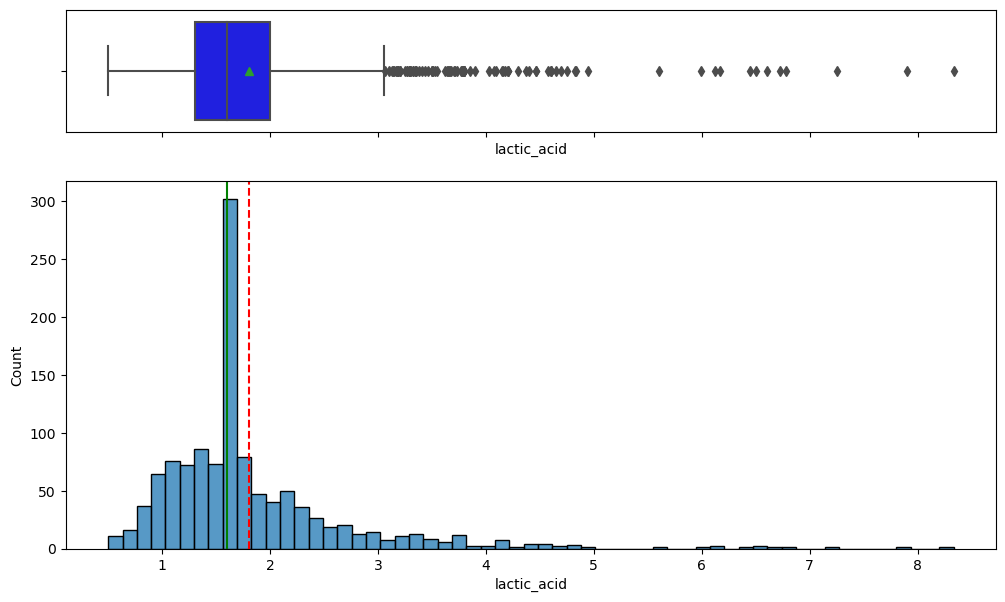

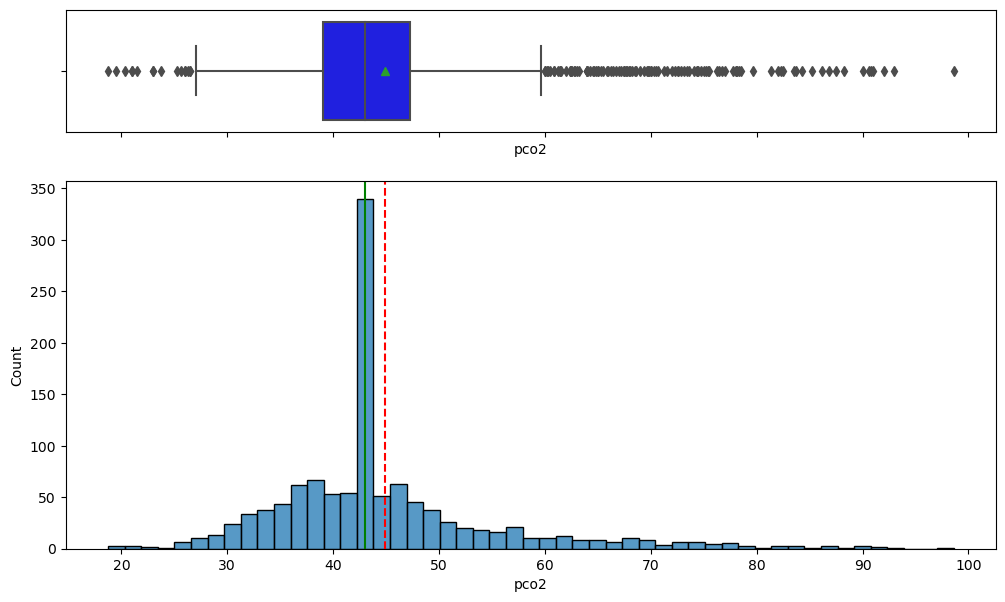

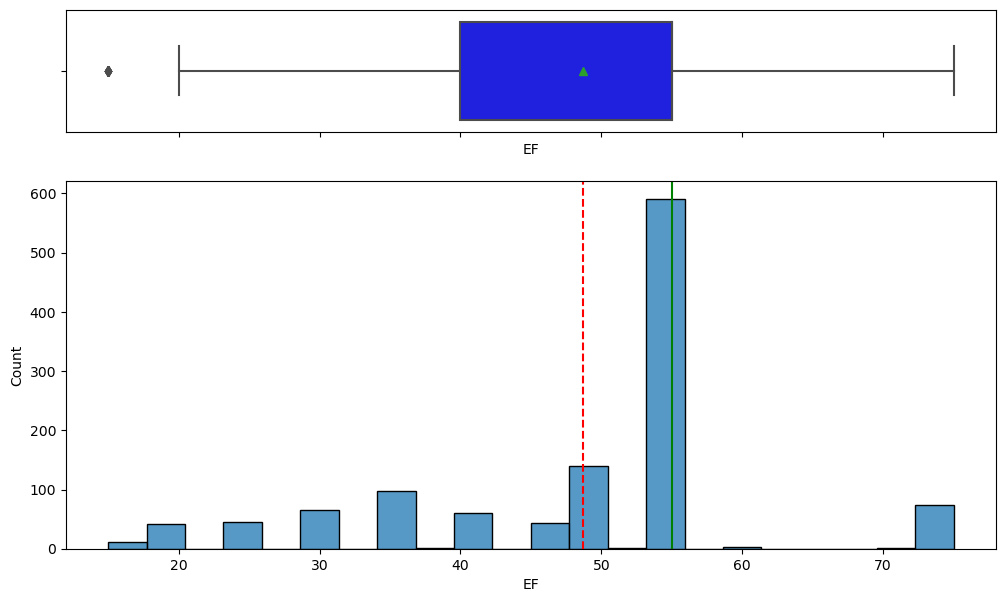

In [25]:
#Assign numerical columns to a variable 'num_col'
num_cols=df[['age', 'bmi', 'heart_rate', 'systolic_blood_pressure',
       'diastolic_blood_pressure', 'respiratory_rate', 'temperature', 'sp_o2',
       'urine_output', 'hematocrit', 'rbc', 'MCH', 'MCHC', 'MCV', 'RDW',
       'leukocyte', 'platelets', 'neutrophils', 'basophils', 'lymphocyte',
       'prothrombin', 'INR', 'nt_probnp', 'creatine_kinase', 'creatinine',
       'urea_nitrogen', 'glucose', 'blood_potassium', 'blood_sodium',
       'blood_calcium', 'chloride', 'anion_gap', 'magnesium_ion', 'pH',
       'bicarbonate', 'lactic_acid', 'pco2', 'EF']]


# Visualize a histogram and boxplot of each column
for i in num_cols:
    hist_box(num_cols, i)

#### Observations: 

##### 1. Approximately Normal Distributed Columns:
- Temperature
- Blood Calcium
- pH
##### 2. Columns with Right-Skewed Distributions:
- bmi
- heart_rate
- systolic_blood_pressure
- respiratory_rate
- urine_output
- hematocrit
- rbc
- MCV
- RDW
- leukocyte
- platelets
- basophils
- lymphocyte
- prothrombin
- INR
- nt_probnp
- creatine_kinase
- creatinine
- urea_nitrogen
- glucose
- blood_potassium
- anion_gap
- magnesium_ion
- bicarbonate
- lactic_acid
- pco2
##### 3. Columns with Left-Skewed Distributions:
- Age
- spO2
- MCH
- MCHC
- Neutrophils
- blood_sodium
- chloride
- EF

### Univariate Analysis of Categorical Columns

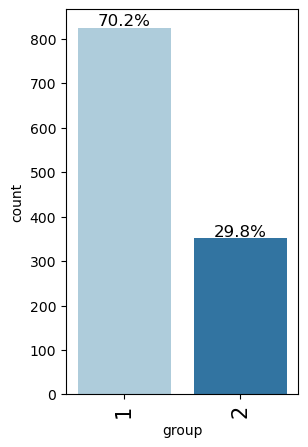

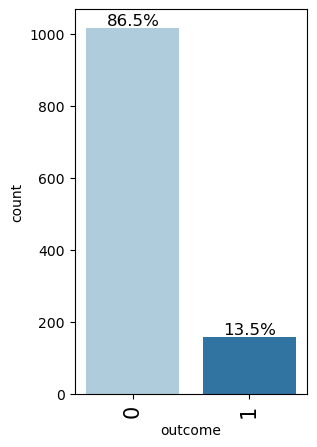

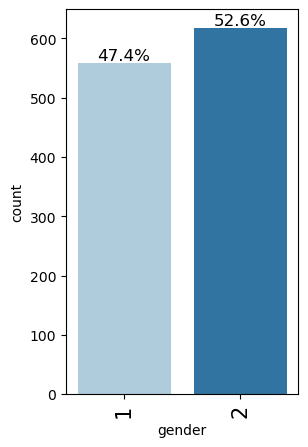

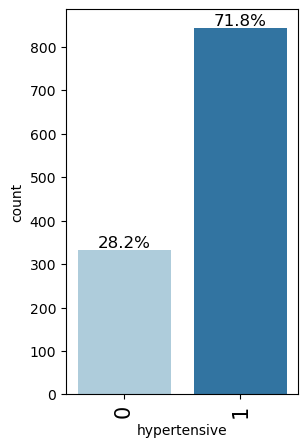

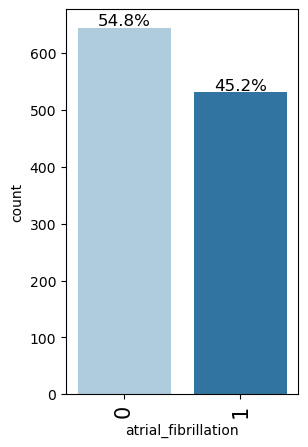

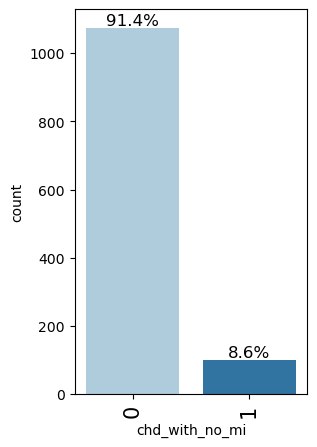

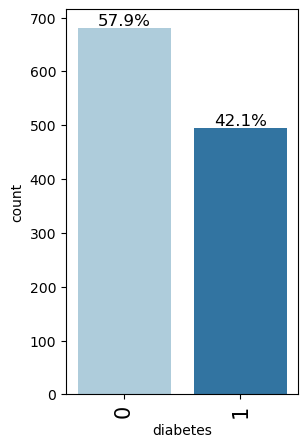

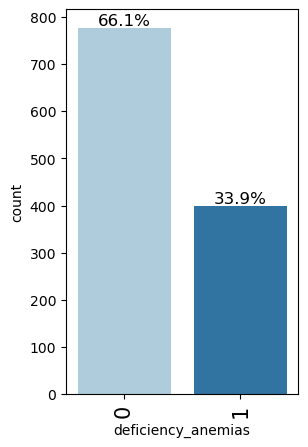

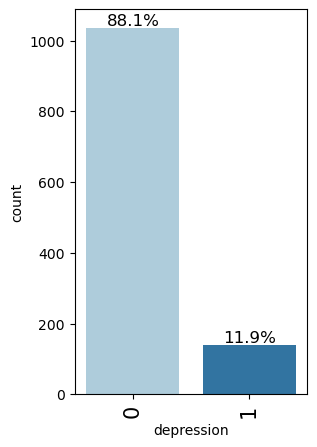

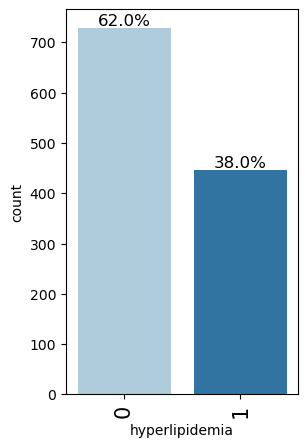

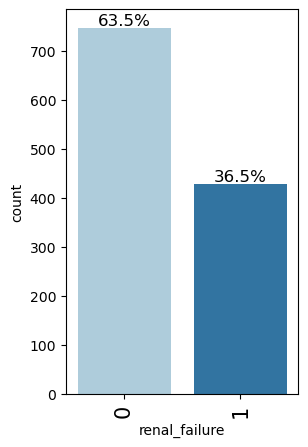

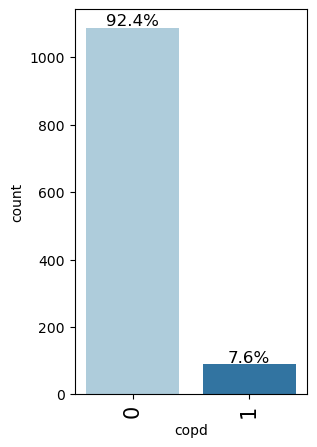

In [26]:
cat_cols=df[['group', 'outcome', 'gender', 'hypertensive', 'atrial_fibrillation',
       'chd_with_no_mi', 'diabetes', 'deficiency_anemias', 'depression',
       'hyperlipidemia', 'renal_failure', 'copd']]

for i in cat_cols:
    annotated_barplot(cat_cols, i)

### Key Observations:
#### Outcome: 13.5% of patients died and 86.5% survived
#### Gender: 52.6% of patients are females
#### Comorbidities: 
- 71.8% of the patients have hypertension
- 45.2% have atrial fibrillation
- 8.6% have chronic heart disease without myocardial infarction
- 42.1% have diabetes
- 33.9 have deficiency anemias
- 11.9 have depression
- 38% have hyperlipidemia
- 36.5% have renal failure
- 7.6% have chronic obstructive pulmonary disease

## Bivariate Analysis

### 1. 'Outcome' Vrs Numerical Variables

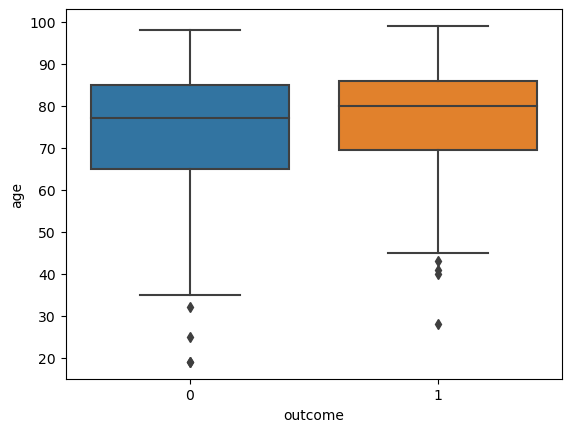

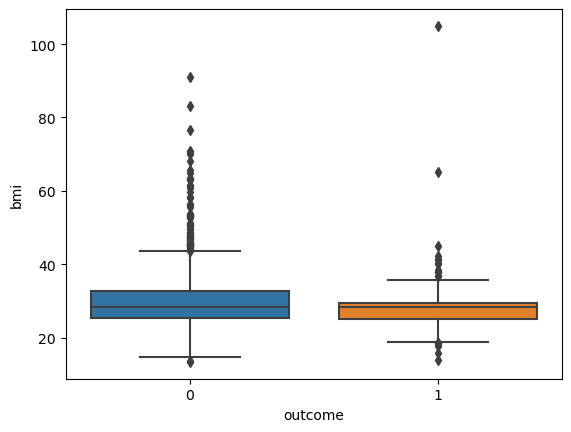

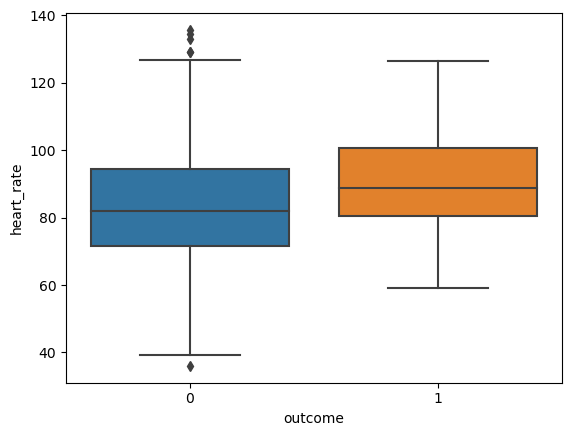

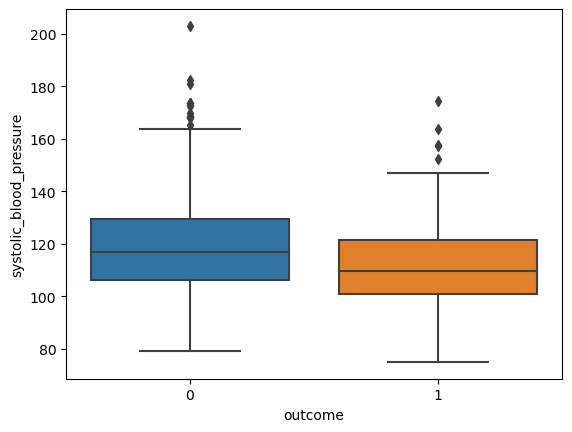

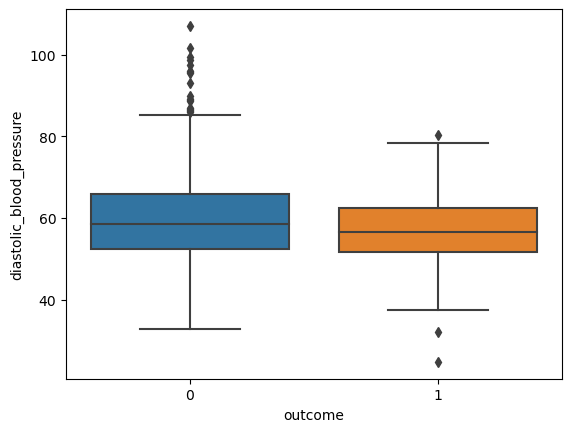

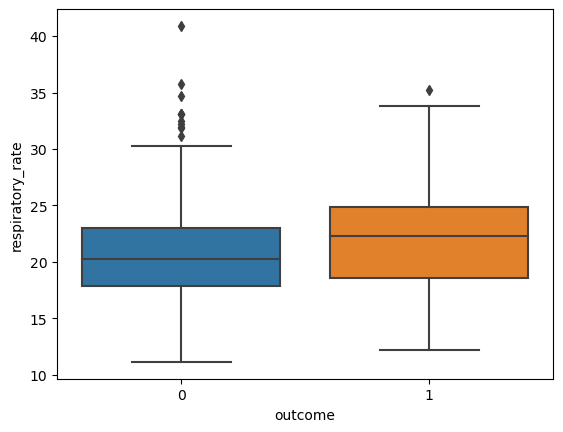

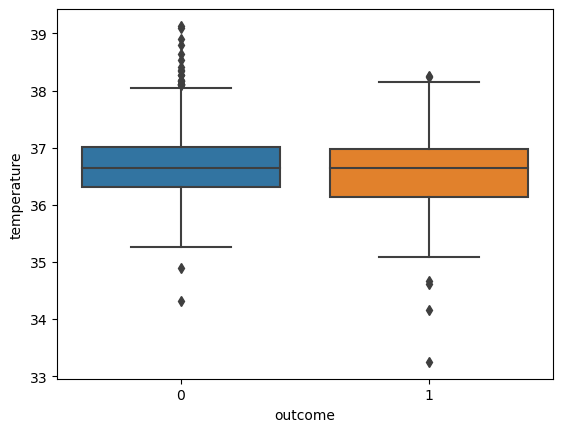

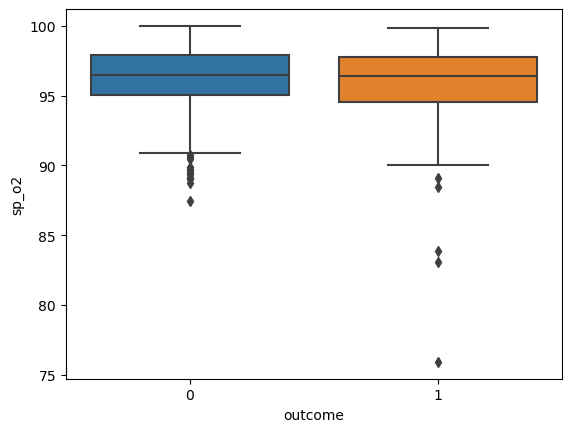

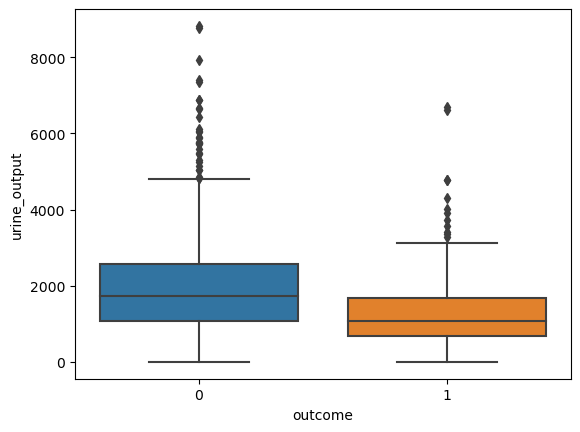

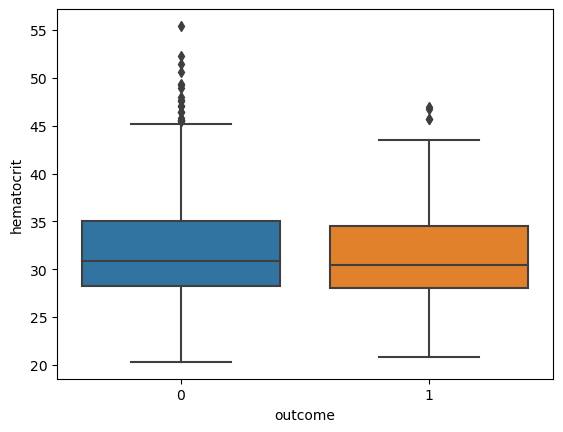

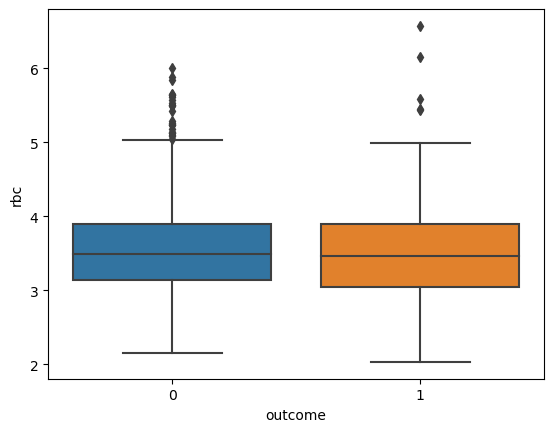

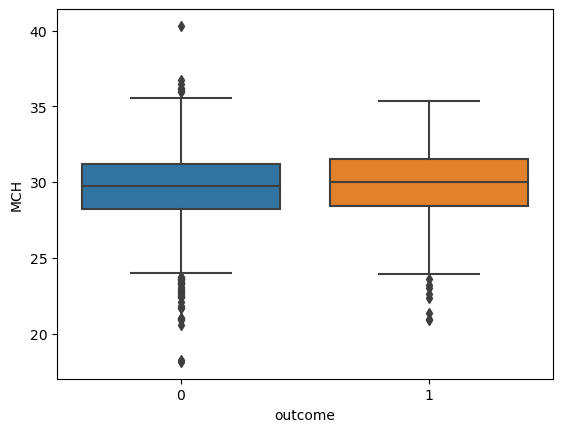

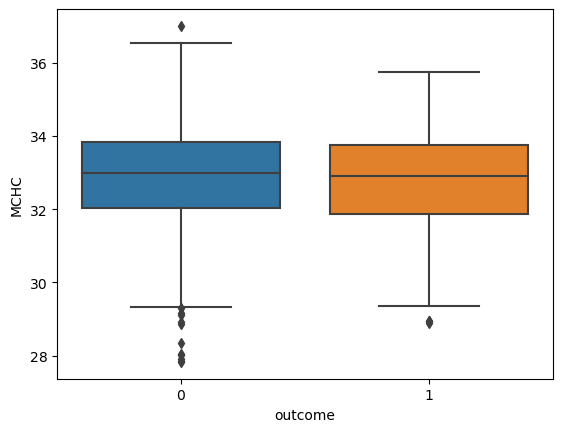

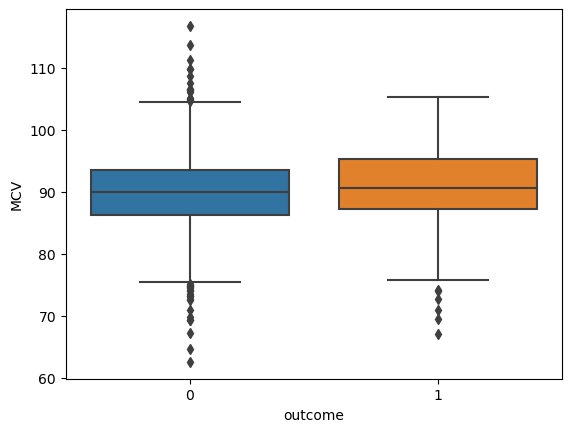

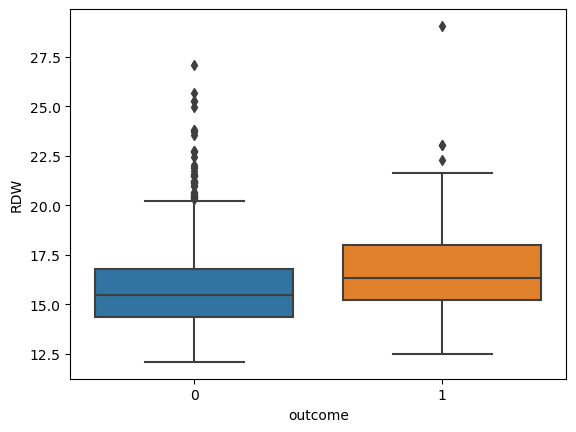

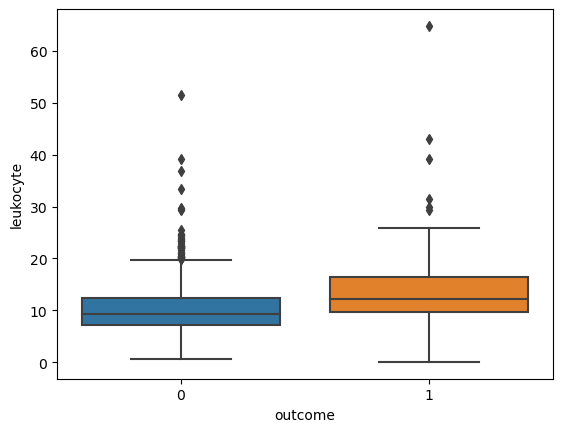

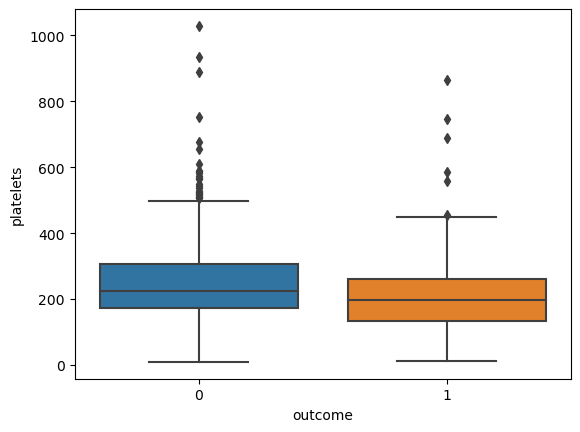

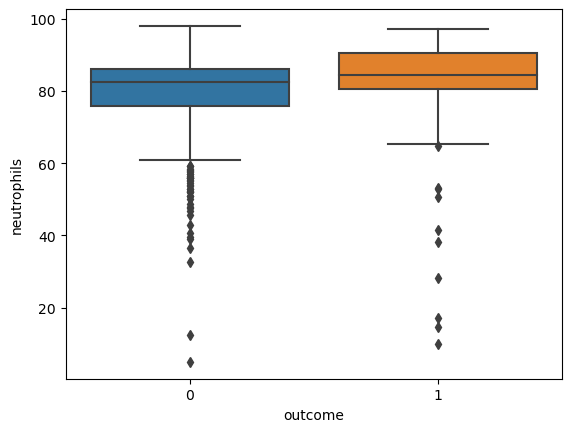

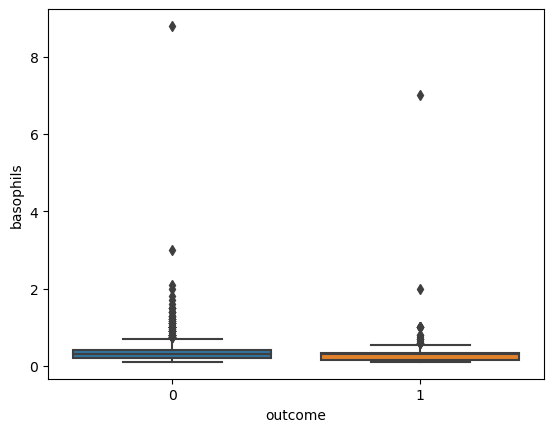

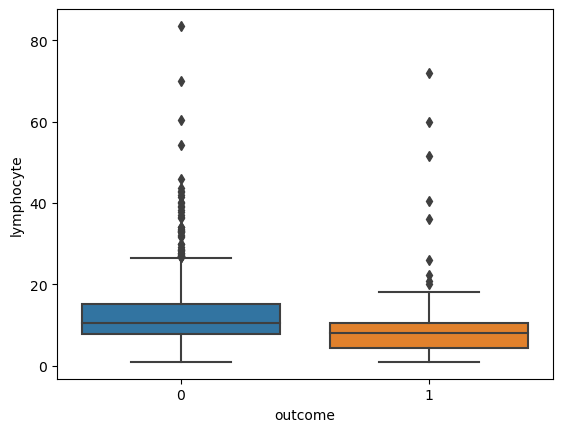

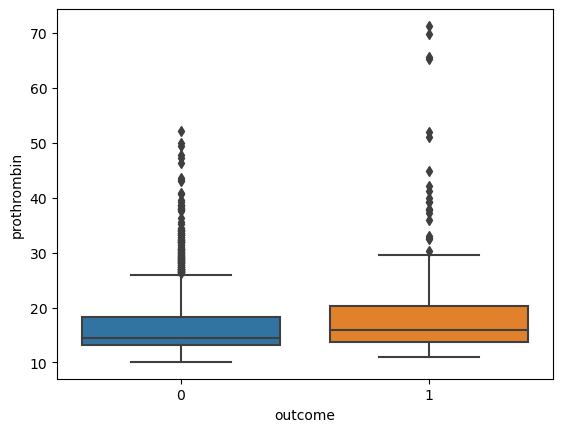

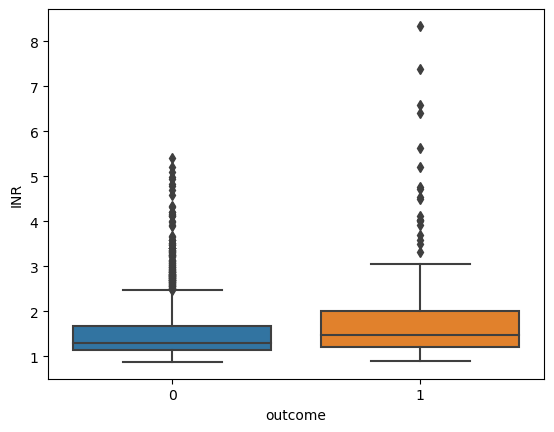

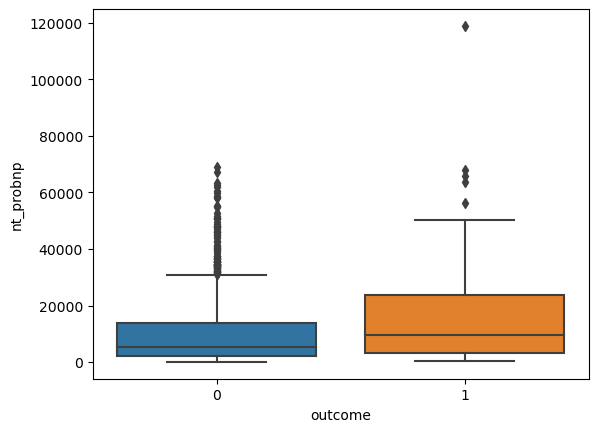

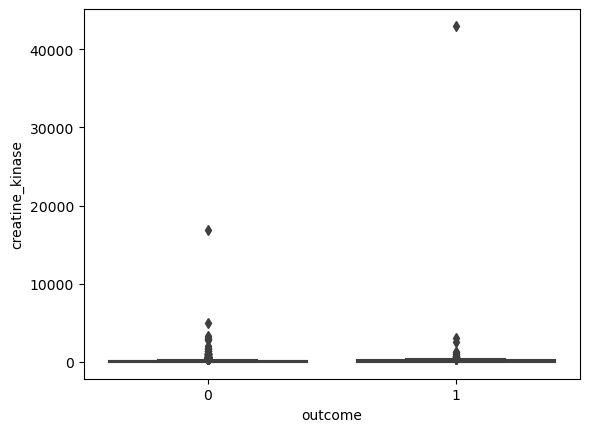

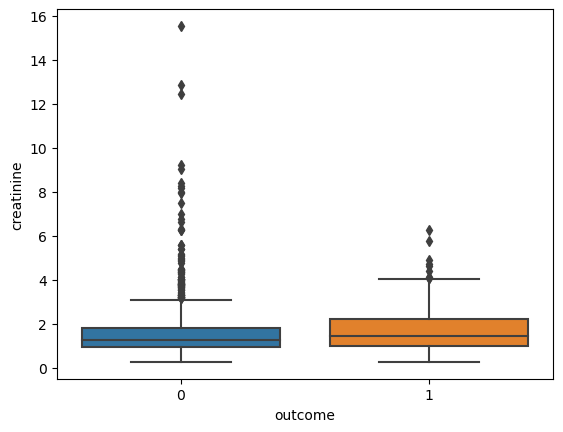

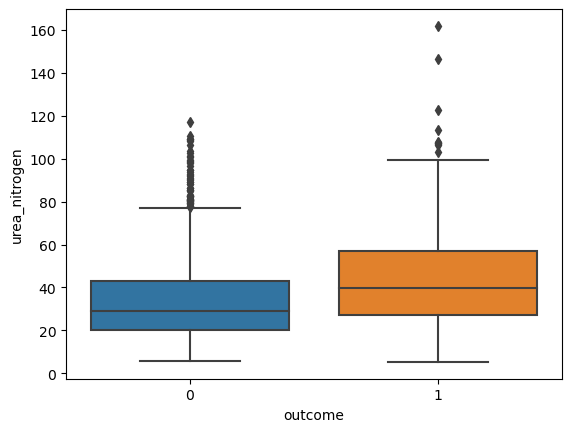

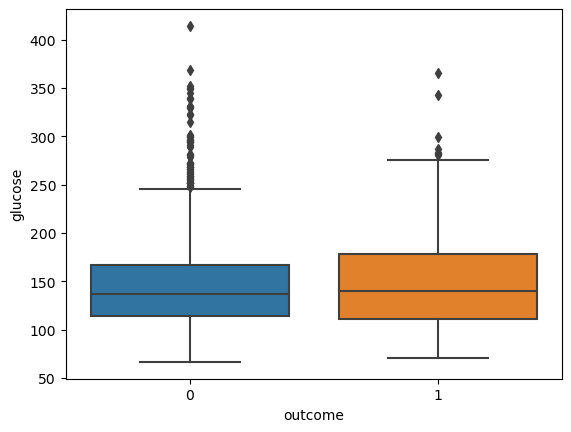

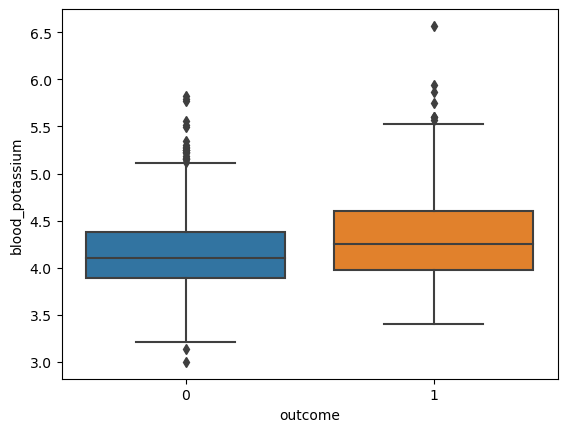

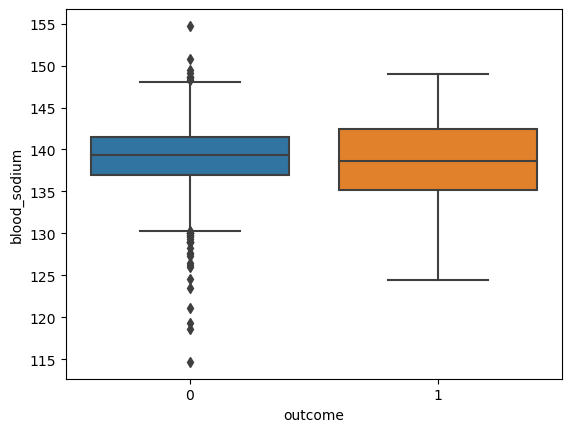

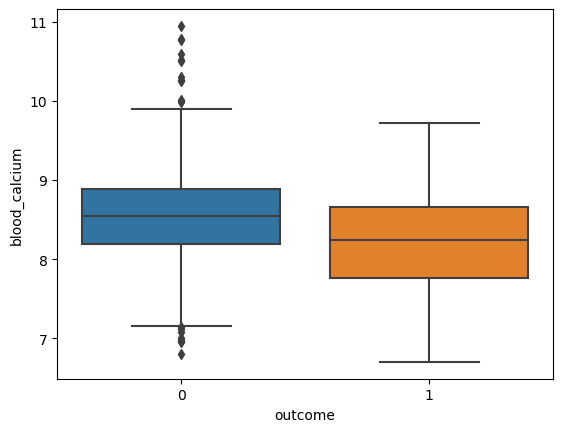

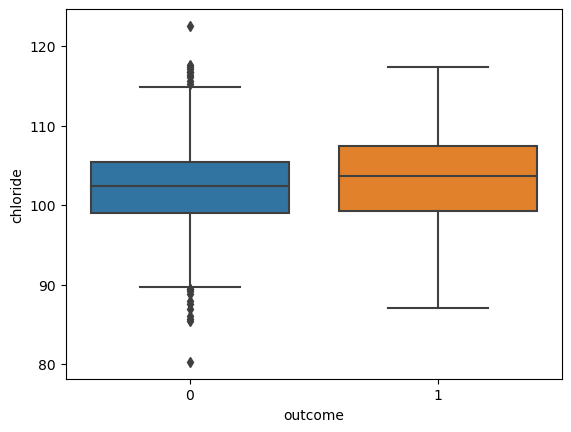

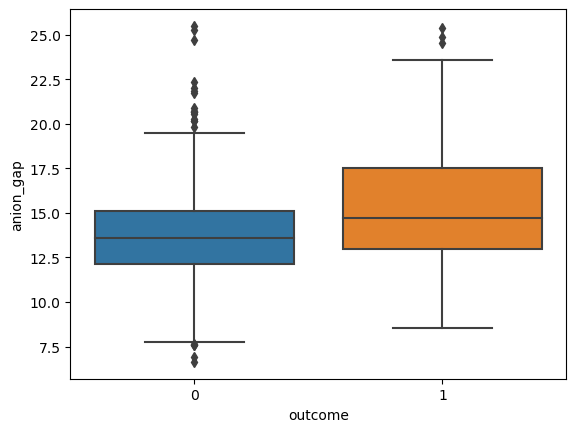

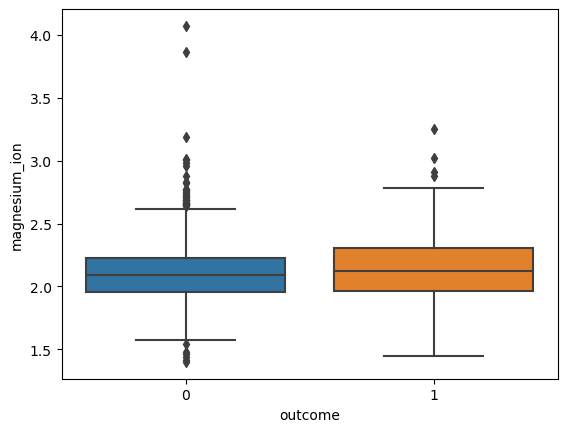

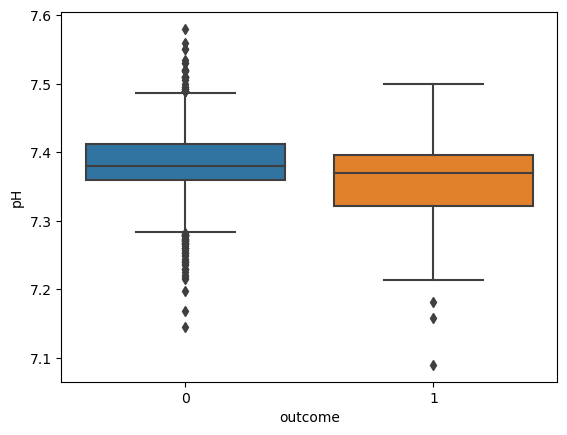

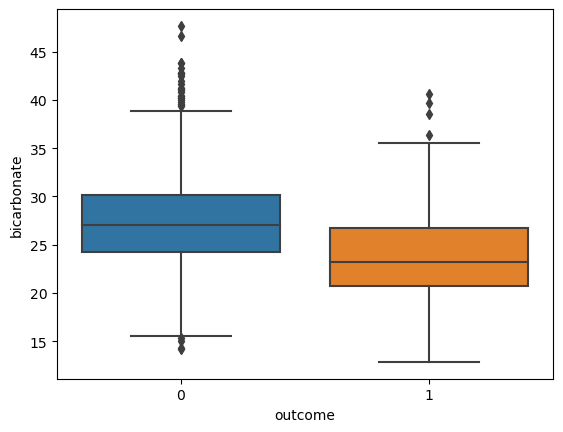

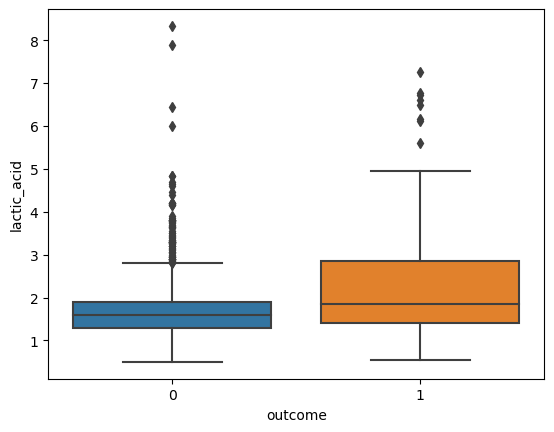

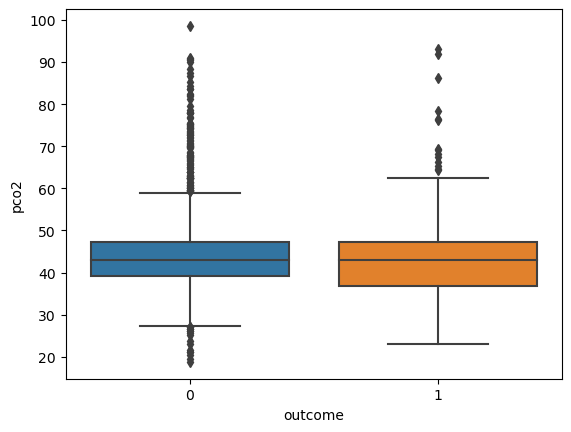

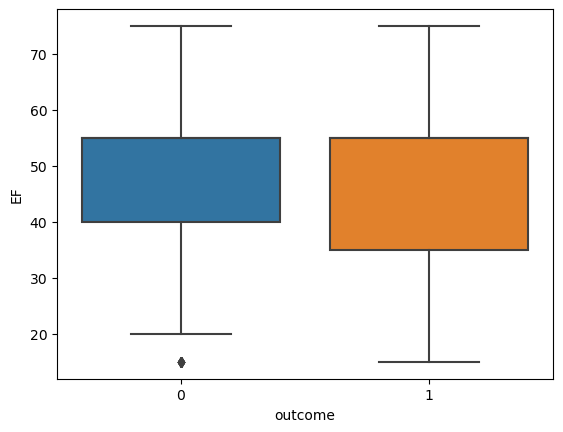

In [27]:
for i in df:
    if i in numerical_columns:
        sns.boxplot(data=df, x=df['outcome'], y=df[i])
        plt.show()

#### Observtions:
    - Age: The median age of the patients who died was 80 years.
    - BMI: Both groups had approximately the same BMI
    - Heart Rate: Patients who died had a higher median heart rate than those who survived.
    - Respiratory rate: Patients who died had a higher median respiratory rate
    - Urine output: Patients who died had a lower median urine output.
    - Leukocyte: Patients who died had a higher median leukocyte count.
    - Platelets: Patients who died had a lower median count.
    - Urea nitrogen: A higher median value is seen in patients who died.
    - Blood potassium: A higher median value is seen in patients who died.
    - Blood sodium: A slightly lower median value is seen in patients who died.
    - Blood calcium: A lower median value is seen in patients who died.
    - Anion gap and Bicarbonate: Patients who died have a significantly higher median anion gap but lower bicarbonate levels.
    - Lactic acid: A higher median value is seen in patients who died. 

### 2. Bivariate/ Chi-Square Analysis and Visualization of 'Outcome vrs. Categorical Variables

group      1    2   All
outcome                
All      825  351  1176
0        709  308  1017
1        116   43   159
------------------------------------------------------------------------------------------------------------------------


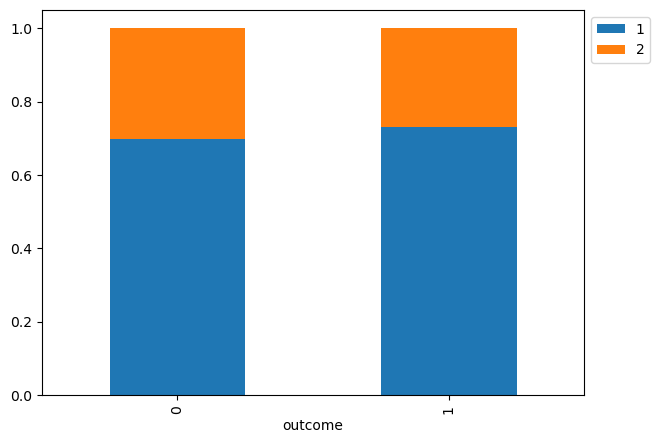

gender     1    2   All
outcome                
All      558  618  1176
0        478  539  1017
1         80   79   159
------------------------------------------------------------------------------------------------------------------------


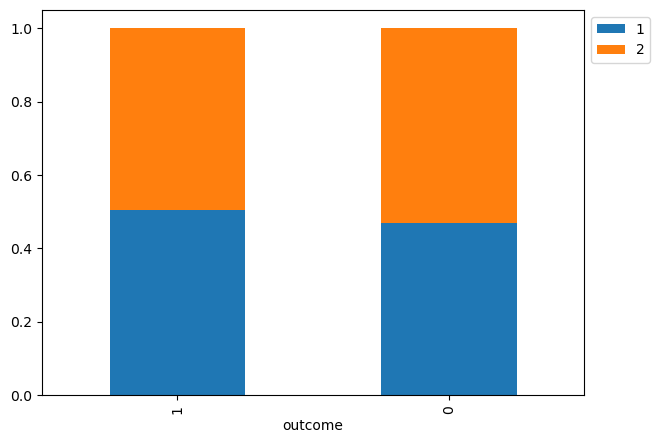

hypertensive    0    1   All
outcome                     
All           332  844  1176
0             274  743  1017
1              58  101   159
------------------------------------------------------------------------------------------------------------------------


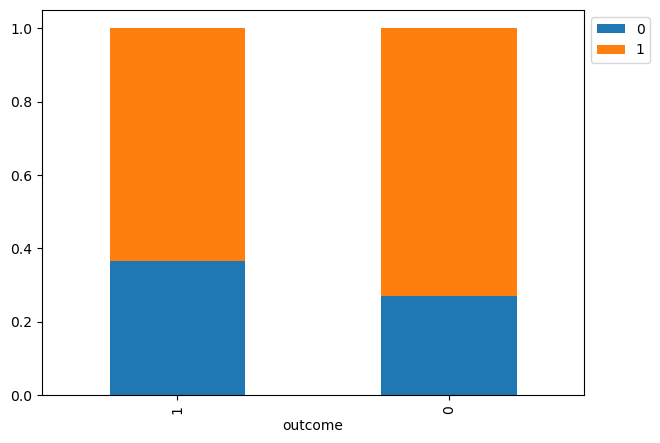

atrial_fibrillation    0    1   All
outcome                            
All                  645  531  1176
0                    578  439  1017
1                     67   92   159
------------------------------------------------------------------------------------------------------------------------


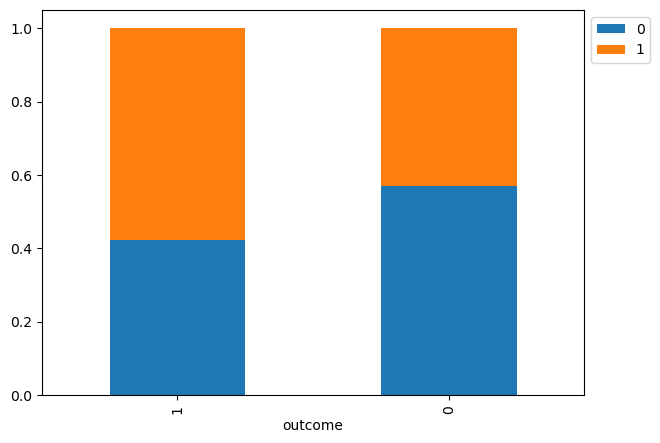

chd_with_no_mi     0    1   All
outcome                        
All             1075  101  1176
0                928   89  1017
1                147   12   159
------------------------------------------------------------------------------------------------------------------------


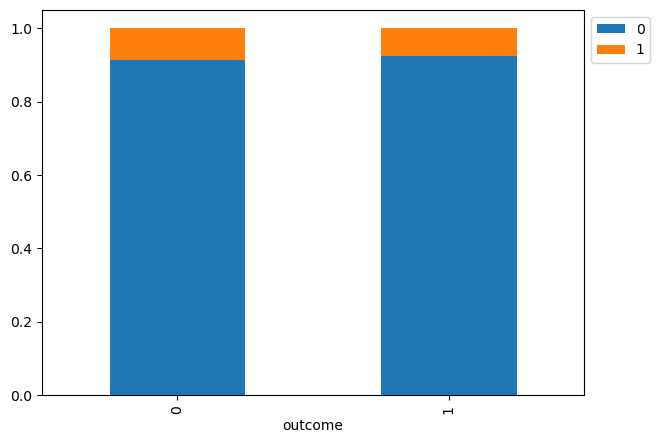

diabetes    0    1   All
outcome                 
All       681  495  1176
0         579  438  1017
1         102   57   159
------------------------------------------------------------------------------------------------------------------------


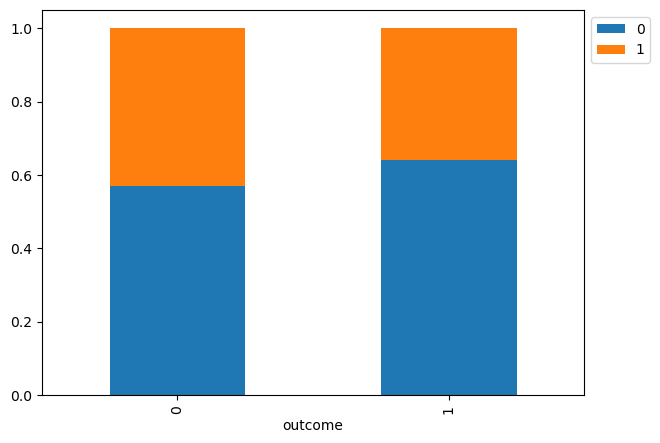

deficiency_anemias    0    1   All
outcome                           
All                 777  399  1176
0                   653  364  1017
1                   124   35   159
------------------------------------------------------------------------------------------------------------------------


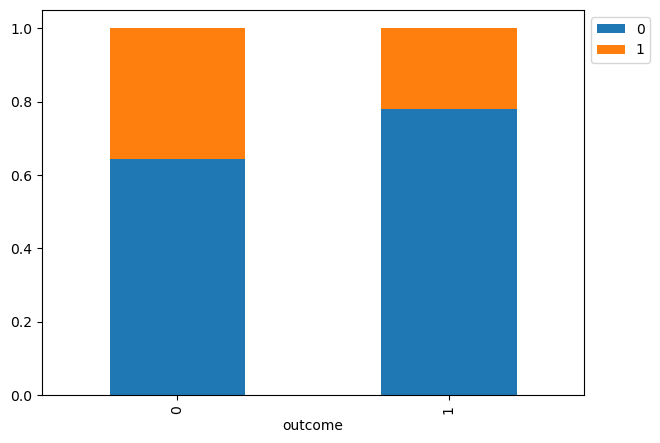

depression     0    1   All
outcome                    
All         1036  140  1176
0            888  129  1017
1            148   11   159
------------------------------------------------------------------------------------------------------------------------


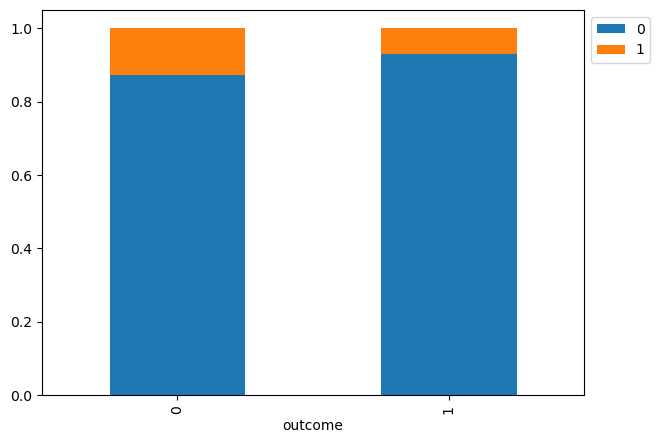

hyperlipidemia    0    1   All
outcome                       
All             729  447  1176
0               620  397  1017
1               109   50   159
------------------------------------------------------------------------------------------------------------------------


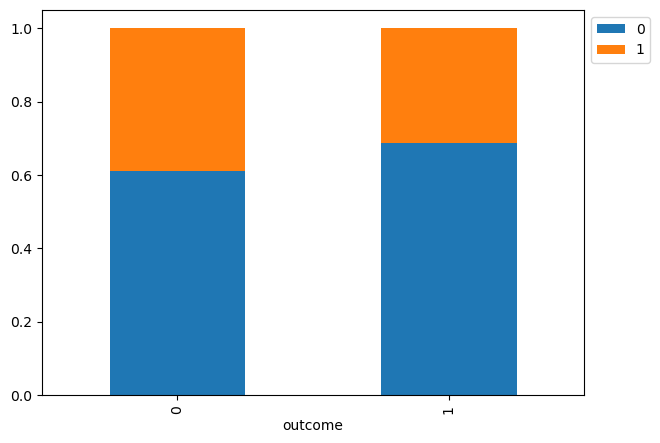

renal_failure    0    1   All
outcome                      
All            747  429  1176
0              625  392  1017
1              122   37   159
------------------------------------------------------------------------------------------------------------------------


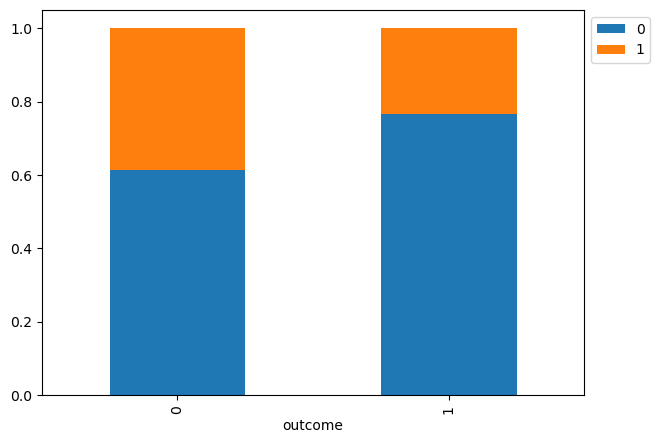

copd        0   1   All
outcome                
All      1087  89  1176
0         935  82  1017
1         152   7   159
------------------------------------------------------------------------------------------------------------------------


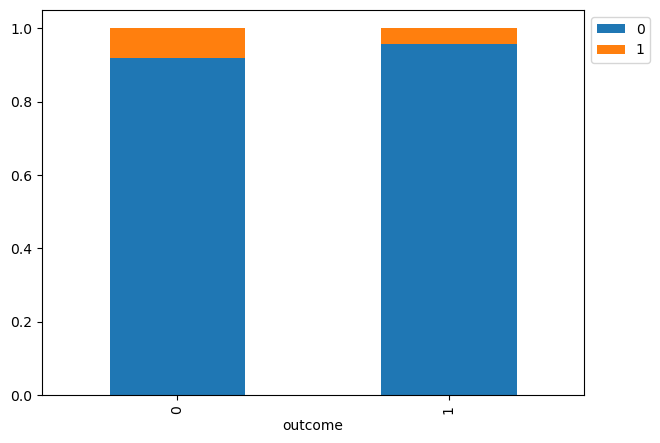

In [28]:
# Define a code for stacked plots in bivariate analysis
def stacked_barplot(data, variable, target):
    """
    This code plots a stacked bar chart with the following args:

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[variable].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[variable], data[target], margins=True).sort_values(
        by=sorter, ascending=False #Formulates a cross table or dependency table for chi-square
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[variable], data[target], normalize="index").sort_values(
        by=sorter, ascending=False #Formulates a cross table or dependency table for chi-square
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

    
# Plot stacked bar plots for categorical variables    
for variable in cat_cols:
    if variable== 'outcome':
        pass
    else:
        stacked_barplot(cat_cols, 'outcome', variable)

#### Key Observations:
##### Outcome vs. Gender:
- The proportion of males who died (80 out of 159) is about the same as females (79 out of 159)

#####  Outcome vs. Atrial Fibrillation
- 92 out of 159 patients who died had atrial fibrillation.

##### Outcome vs. Hypertension
- 37 out of the 429 patients with renal failure died.

##### Outcome vs. Diabetes
- 57 out of the 159 patients who died had diabetes.

##### Outcome vs. Hyperlipidemia
- 50 out of the 159 mortalities had hyperlipidemia

##### Outcome vs. Renal Failure
- 37 out of the 159 mortalities had renal failure.
- These 37 patients were out of a total of 429 renal failure cases.

##### Outcome vs. Deficiency Anemias
- 35 out of the 159 mortalities had a deficiency anemia

##### Outcome vrs. Depression
- 11 out of the total mortalities were diagnosed with depression

## 3. Log Transformation

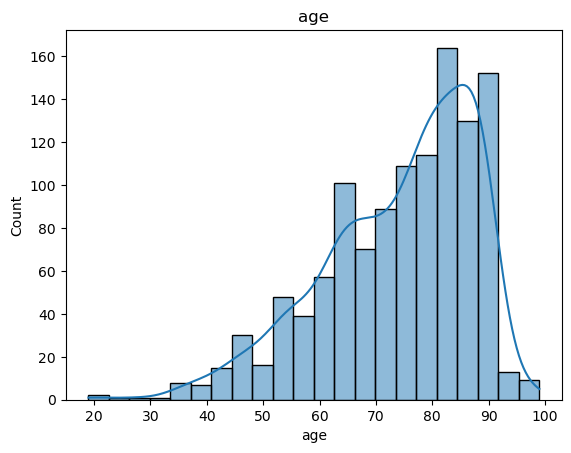

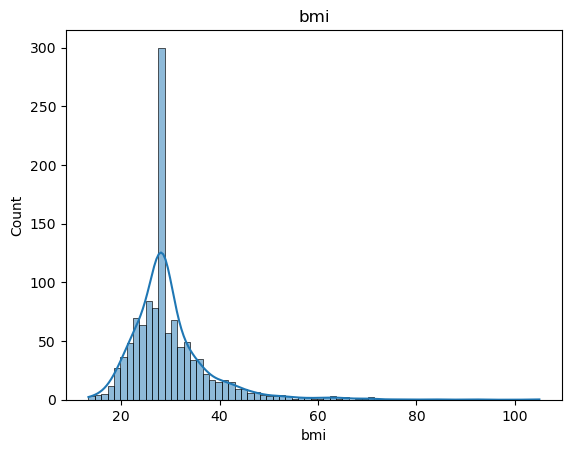

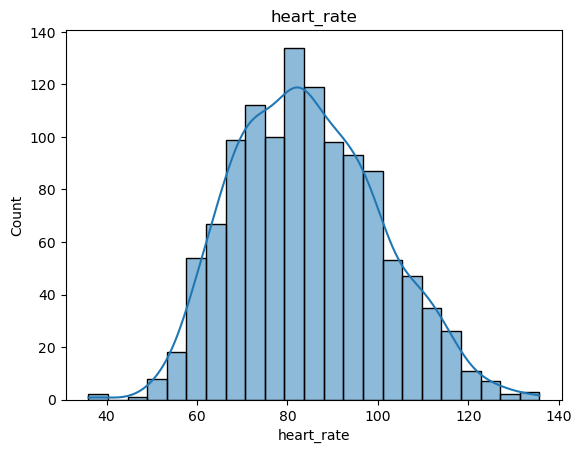

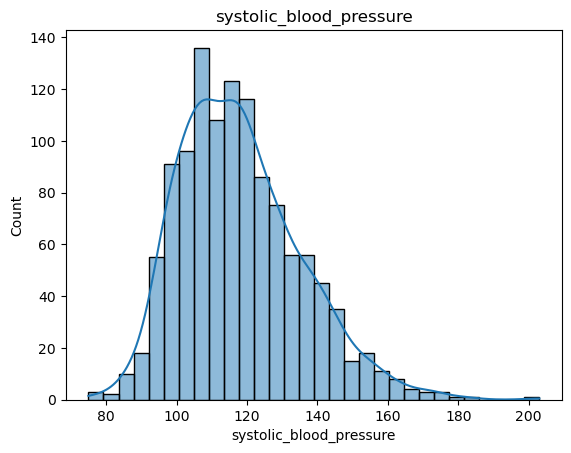

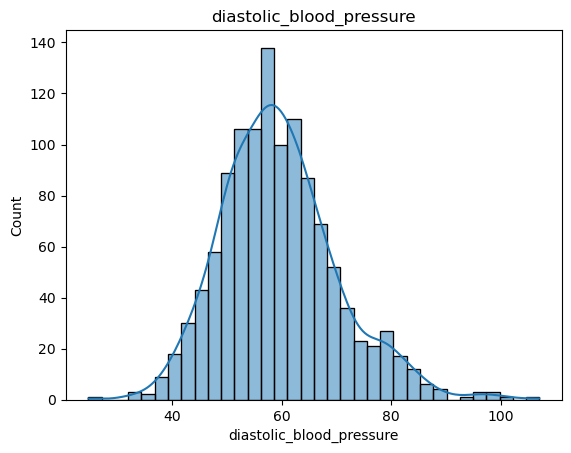

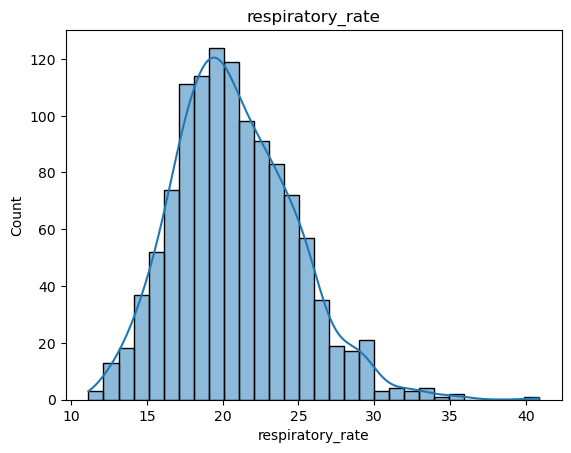

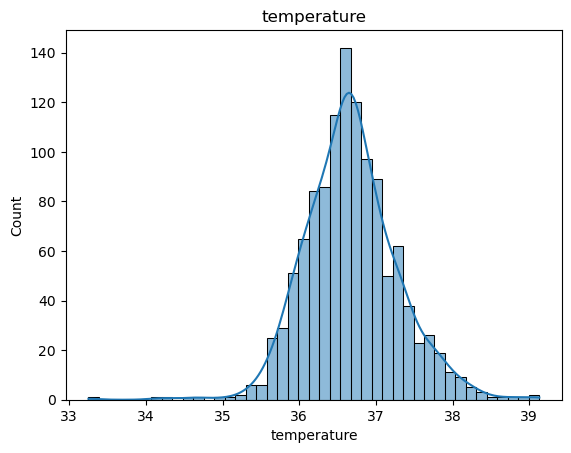

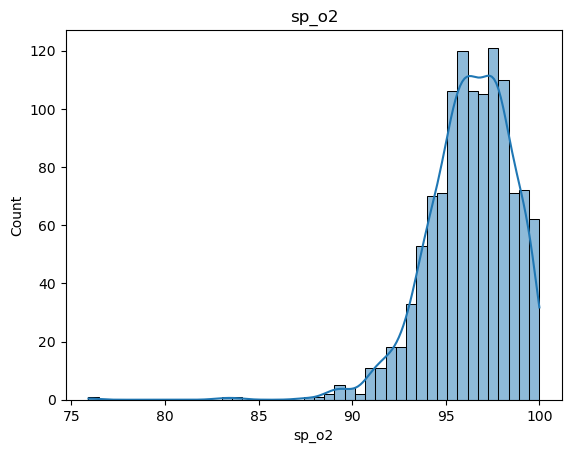

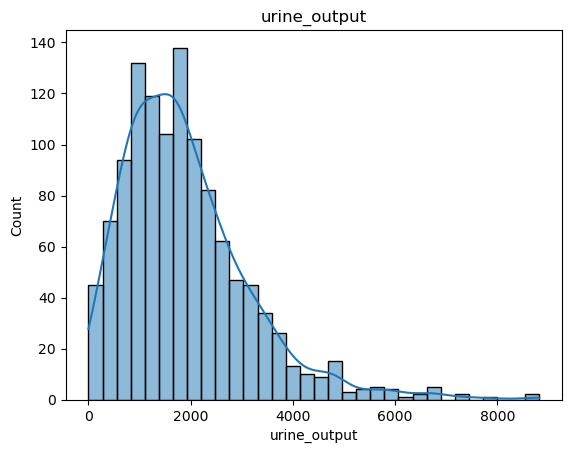

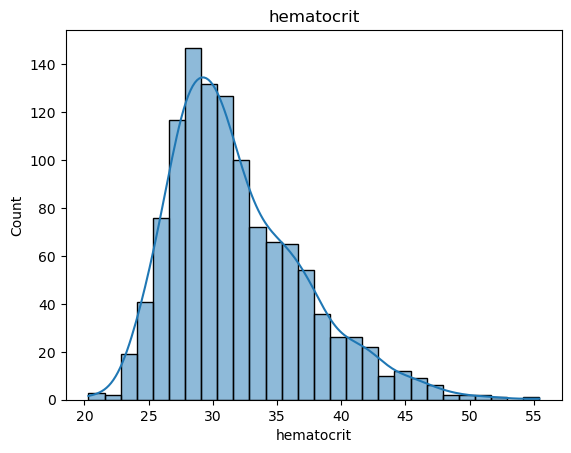

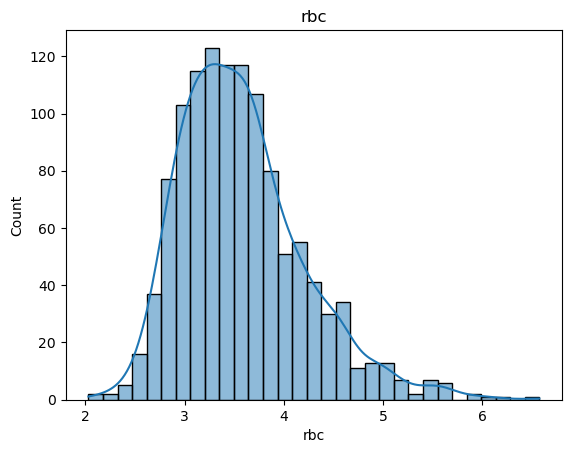

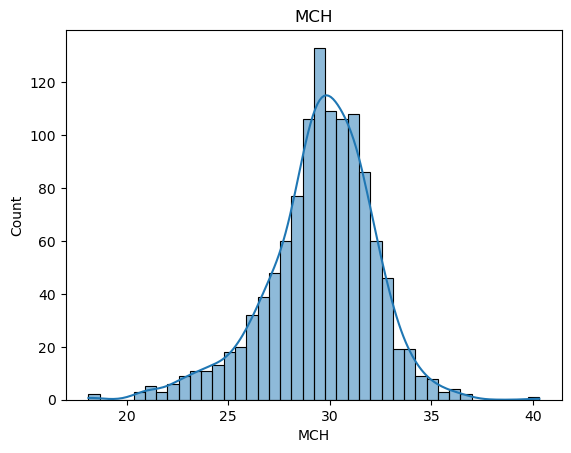

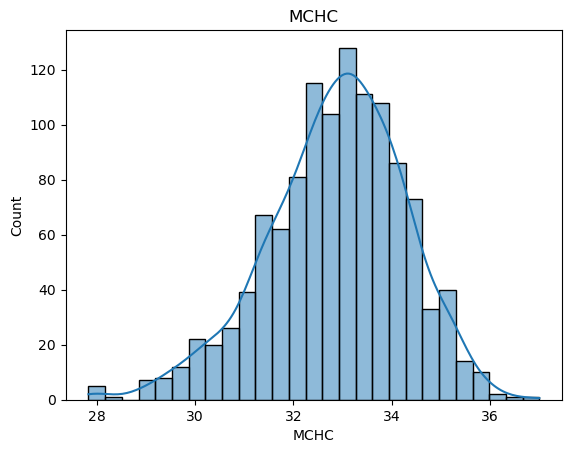

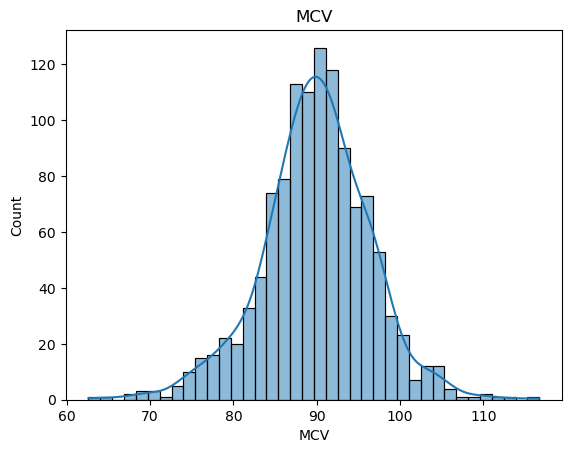

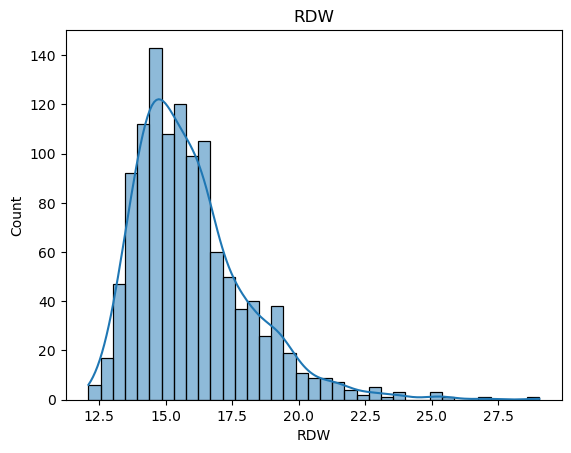

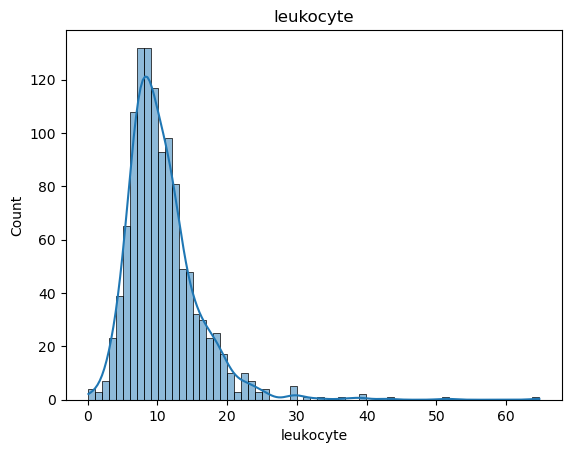

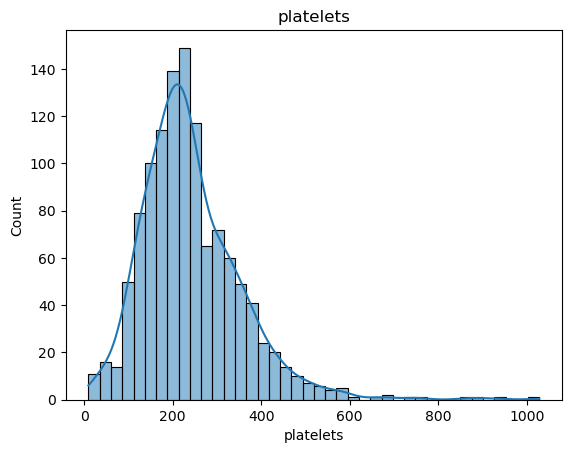

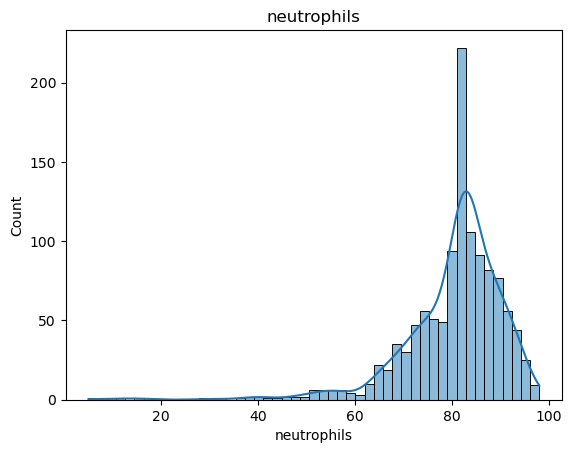

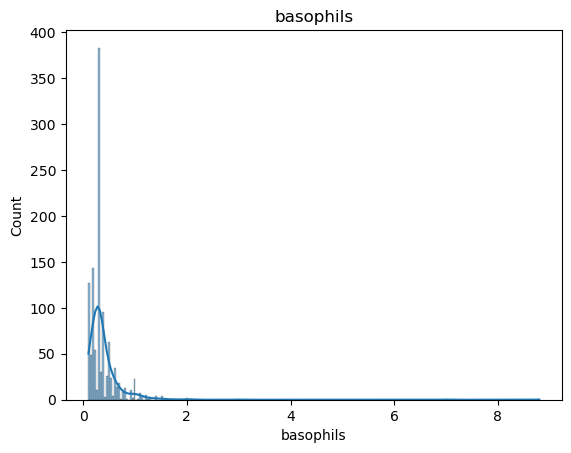

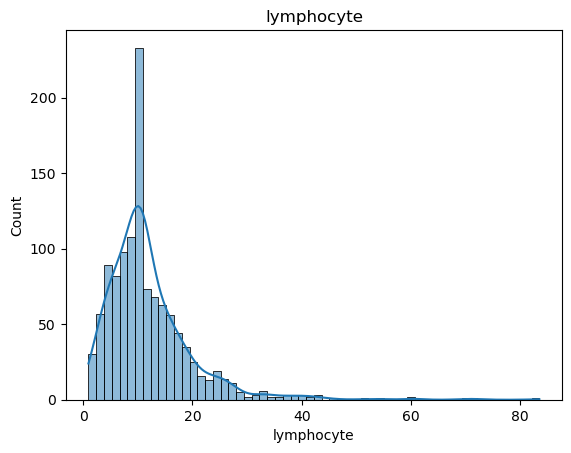

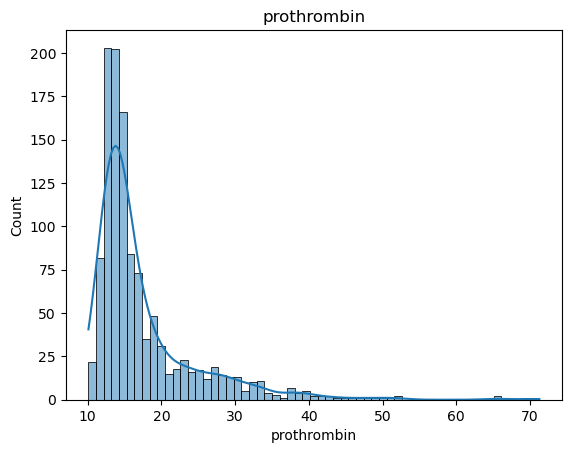

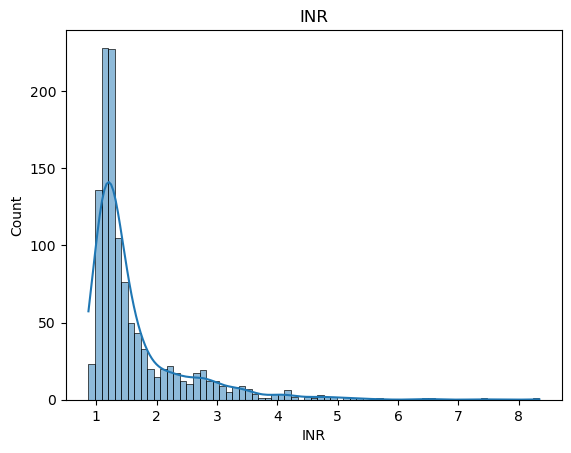

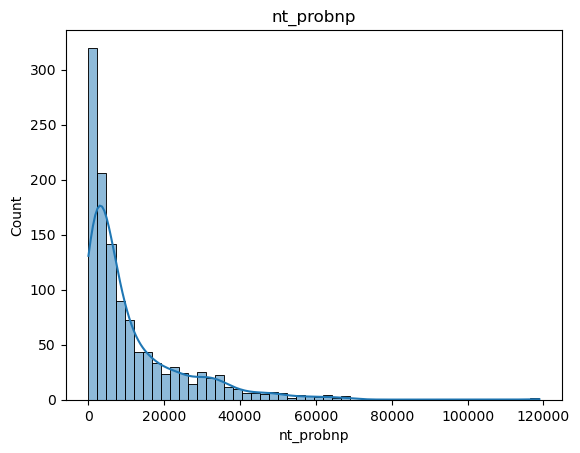

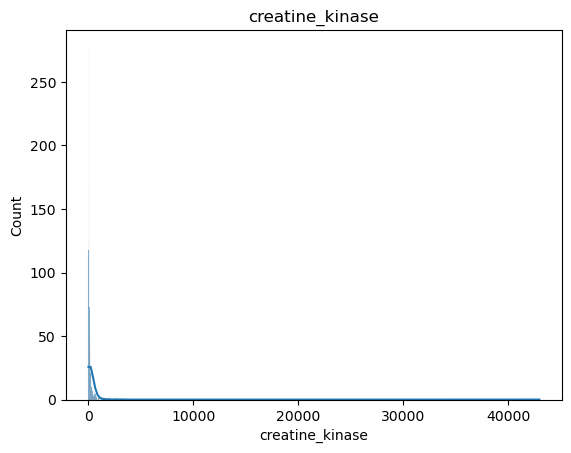

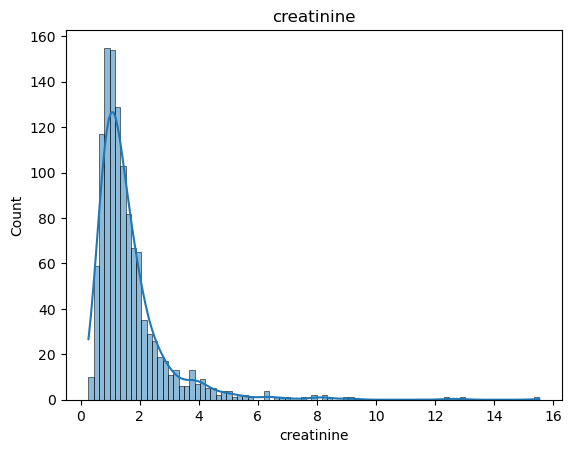

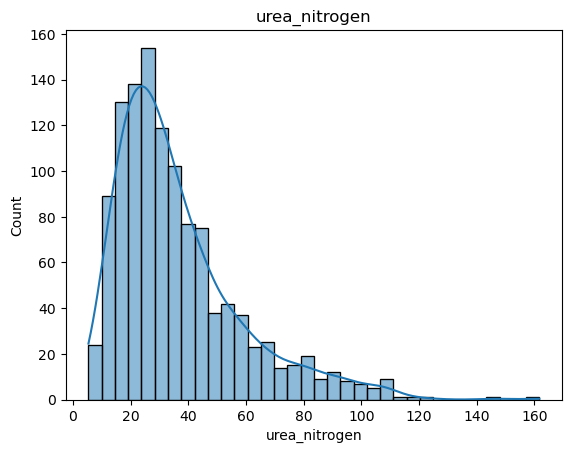

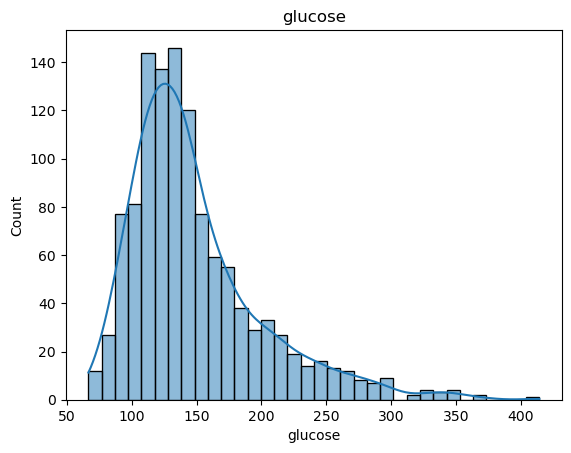

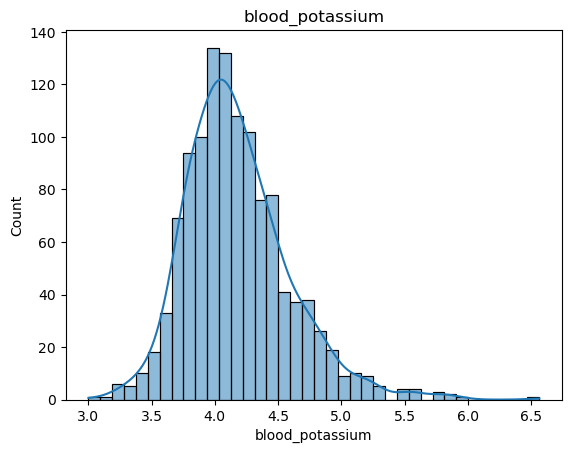

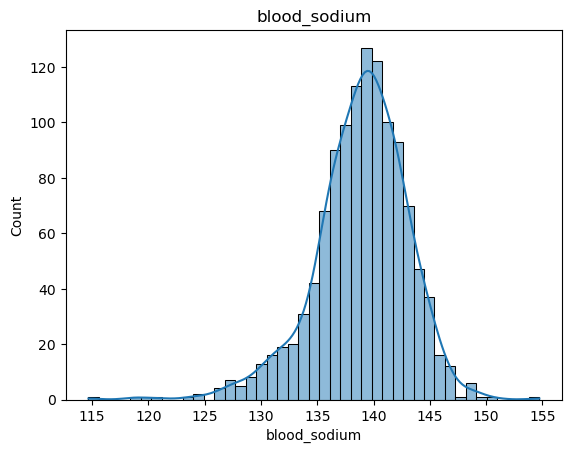

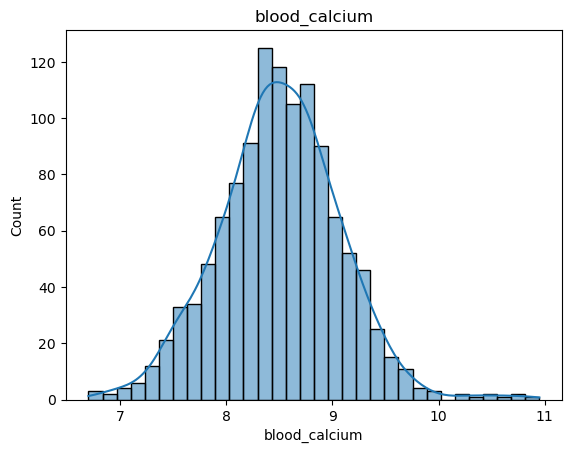

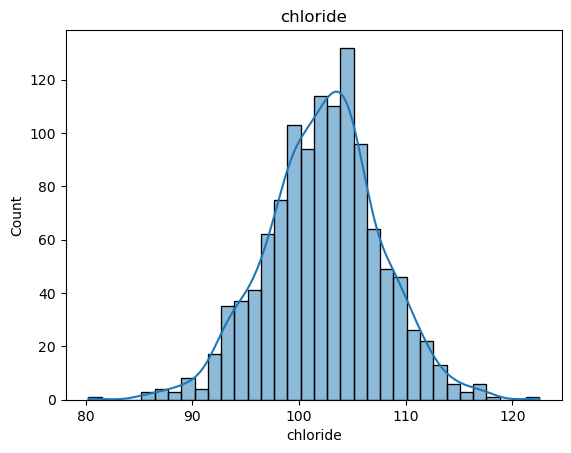

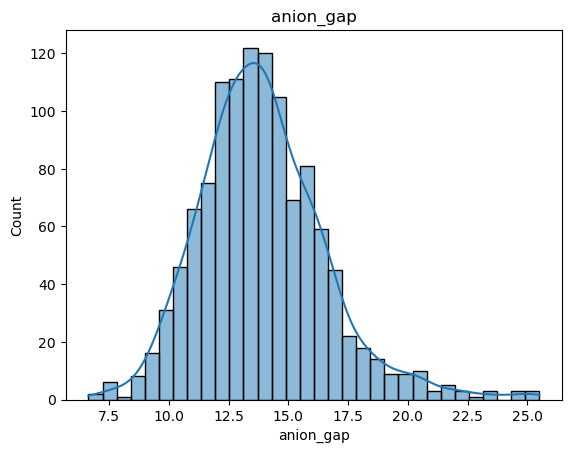

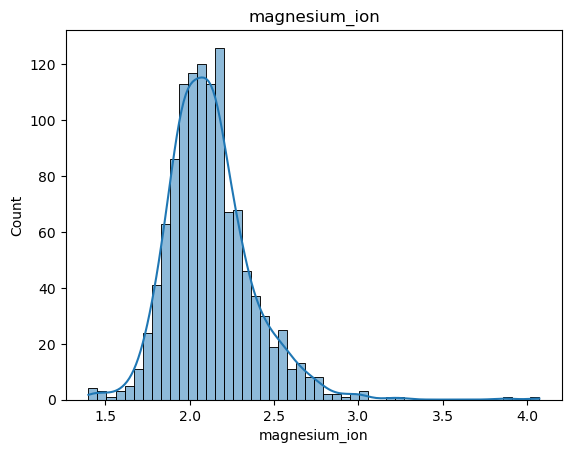

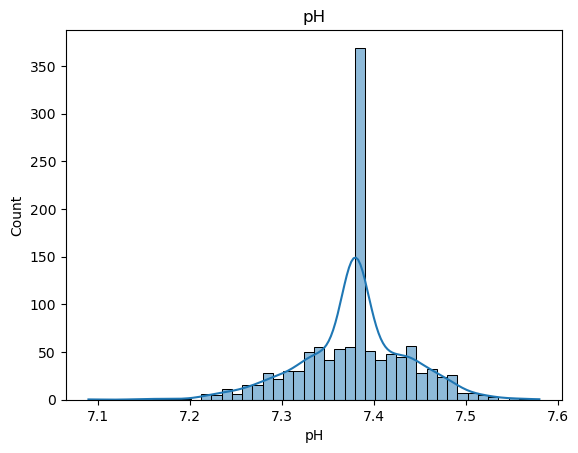

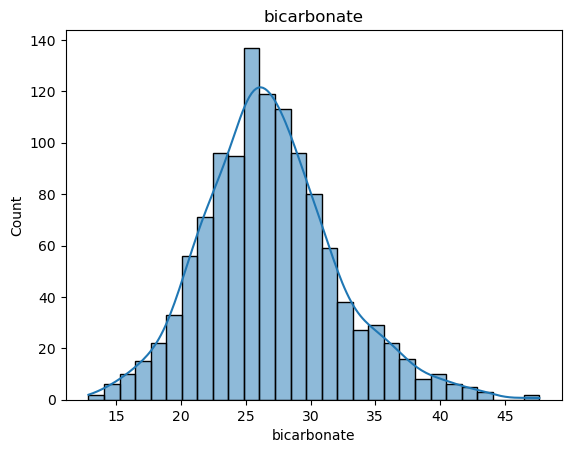

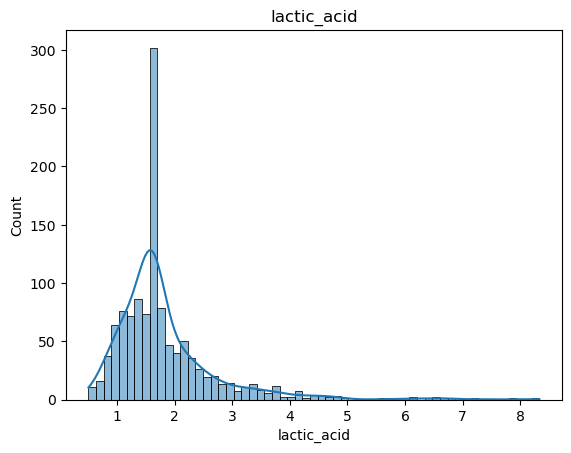

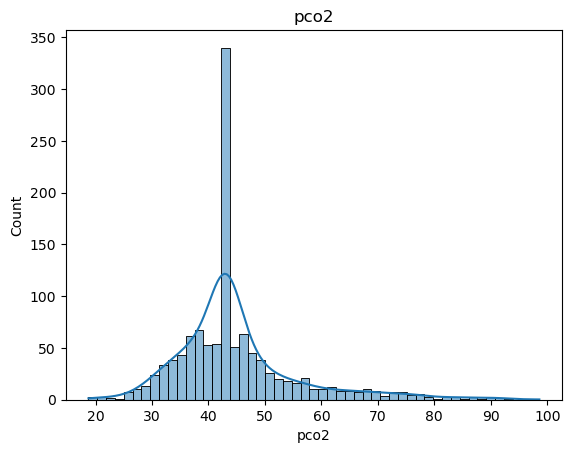

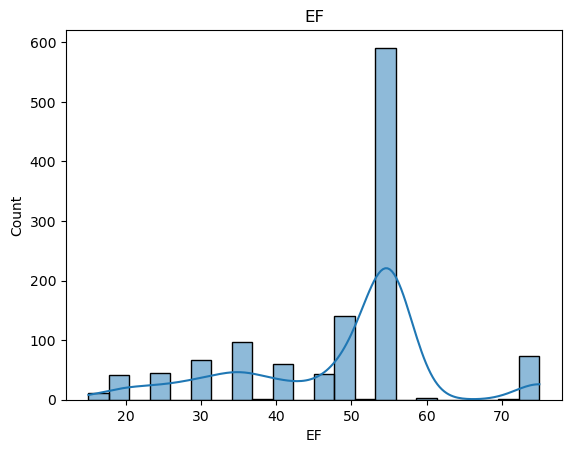

In [29]:
# Apply log transformation to reassess skewed columns
df_log_transformed = df.copy()


for col in num_cols:
    df_log_transformed[col] = np.log1p(df[col])# log1p is used to avoid log(0)
    sns.histplot(df[col], kde=True) #Visualize the data
    plt.title(col)
    plt.show()


    



#### Observation
After log transformation, the following variables remain markedly skewed:
- Age
- spO2
- urine_output
- MCH
- MCHC
- RDW
- leukocyte
- platelets
- neutrophils
- basophils
- prothrombin
- INR
- nt_probnp
- EF

## 4a) Two Means T-Test on Dataset before Transformation

In [30]:
# # Assuming 'outcome' is the column you want to compare means for
alive =df[df['outcome'] == 0]
dead = df[df['outcome'] == 1]

#Hypothesis:
#H0: There is no difference between the means of the two groups
#Ha: There is a difference between the means

# Perform a two-means t-test on log-transformed data (assuming equal variances) and store
results = []
for col in num_cols:
  result = stats.ttest_ind(alive[col], dead[col], equal_var=True, nan_policy='omit')
  results.append({
      'Variable': col,
      't-statistic': result.statistic,
      'p-value': result.pvalue
      })

# Create DataFrame from results
results_df = pd.DataFrame(results)
print(results_df)



                    Variable  t-statistic       p-value
0                        age    -2.214976  2.695313e-02
1                        bmi     2.119439  3.426284e-02
2                 heart_rate    -4.471053  8.537316e-06
3    systolic_blood_pressure     4.565683  5.502854e-06
4   diastolic_blood_pressure     2.986001  2.885113e-03
5           respiratory_rate    -4.028543  5.973136e-05
6                temperature     3.177621  1.523628e-03
7                      sp_o2     2.441031  1.479236e-02
8               urine_output     5.928538  4.013858e-09
9                 hematocrit     0.566553  5.711265e-01
10                       rbc     0.822305  4.110701e-01
11                       MCH    -0.458724  6.465171e-01
12                      MCHC     1.093063  2.745902e-01
13                       MCV    -1.170575  2.420073e-01
14                       RDW    -5.130645  3.376046e-07
15                 leukocyte    -7.296225  5.435014e-13
16                 platelets     3.043081  2.393

#### Observation
Columns without statistically significant differences in the means of the 2 groups:
- spO2 
- hematocrit  
- rbc 
- MCH  
- MCHC 
- MCV
- neutrophils 
- creatine_kinase
- creatinine
- glucose 
- chloride
- pCO2
- EF


## 4b. Two Means T-Test on Skewed Variables Above After Log-Transformation

In [31]:
#Transform the variables of interest
for col in ['sp_o2','hematocrit','rbc', 'MCH', 'MCHC', 'MCV', 'neutrophils']:
    df_log_transformed[col] = np.log(df_log_transformed[col])
    
#Define the 2 groups
alive_trans = df_log_transformed[df_log_transformed['outcome']==0][['sp_o2','hematocrit','rbc', 
                                                                          'MCH', 'MCHC', 'MCV',
                                                                          'neutrophils', 
                                                                          'creatine_kinase', 
                                                                          'glucose','chloride',
                                                                          'pco2', 'EF']]
dead_trans = df_log_transformed[df_log_transformed['outcome']==1][['sp_o2','hematocrit','rbc', 
                                                                         'MCH', 'MCHC', 'MCV',
                                                                         'neutrophils', 
                                                                         'creatine_kinase',
                                                                         'glucose', 'chloride',
                                                                         'pco2', 'EF']]

# Perform t-test for each variable
trans_results=[]
for col in alive_trans.columns:
  result = stats.ttest_ind(alive_trans[col], dead_trans[col], equal_var=False)
  print(f"T-test for {col}: t-statistic = {result.statistic}, p-value = {result.pvalue}")


T-test for sp_o2: t-statistic = 1.894776541283626, p-value = 0.0597299551677909
T-test for hematocrit: t-statistic = 0.6449305627297173, p-value = 0.5196870764452325
T-test for rbc: t-statistic = 1.1110378429684256, p-value = 0.2678954365428605
T-test for MCH: t-statistic = -0.25303422380254753, p-value = 0.8005030151669836
T-test for MCHC: t-statistic = 1.0784199509618349, p-value = 0.28206640447667086
T-test for MCV: t-statistic = -0.9298672111180933, p-value = 0.3535686873501327
T-test for neutrophils: t-statistic = 0.0328629239282241, p-value = 0.9738216144748355
T-test for creatine_kinase: t-statistic = -0.3820554570389598, p-value = 0.7028461746844705
T-test for glucose: t-statistic = -0.6277032363810663, p-value = 0.5309252608627775
T-test for chloride: t-statistic = -1.7595056069392516, p-value = 0.08004156617704547
T-test for pco2: t-statistic = 1.409308971899614, p-value = 0.16029101989481603
T-test for EF: t-statistic = 1.0956158692594158, p-value = 0.27457647095855386


#### Observation
- 'rbc' is the only variable that has a statistically significant t-distribution after log-transfromation

## Variable Selection
Based on observations made during data cleaning, visualization, log transformation and t-testing, the following variables will be selected as predictor variables for in-hospital mortality among heart failure patients

- Gender
- BMI
- Hypertensive
- Atrial fibrillation
- CHD with no MI
- Diabetes
- Deficiency anemias
- Hyperlipemia
- Renal failure
- COPD
- Blood sodium
- Blood calcium
- Anion gap
- Magnesium ion
- PH
- Bicarbonate
- Lactic acid
- Heart rate
- Systolic blood pressure
- Diastolic blood pressure
- temperature
- depression

##### These variables, from initial analysis, satisfy the assumptions of:
- An approximately normal distribution
- Testing with equal variances 




### Step 1. Define Selected Predictor Variables as df_1

In [32]:
df_1= df[['outcome', 'gender', 'bmi', 'hypertensive',
       'atrial_fibrillation', 'chd_with_no_mi', 'diabetes',
       'deficiency_anemias', 'hyperlipidemia', 'renal_failure',
       'copd','blood_sodium', 'blood_calcium', 'anion_gap', 'magnesium_ion', 'pH',
       'bicarbonate', 'systolic_blood_pressure', 'diastolic_blood_pressure', 'temperature',
         'depression']]


### Step 2: Quick Overview of Predictor-Variable Dataset

In [33]:
df_1.head()

outcome gender        bmi hypertensive atrial_fibrillation chd_with_no_mi  \
0       0      1  37.588179            0                   0              0   
1       0      2  28.312474            0                   0              0   
2       0      2  26.572634            0                   0              0   
3       0      2  83.264629            0                   0              0   
4       0      2  31.824842            1                   0              0   

  diabetes deficiency_anemias hyperlipidemia renal_failure  ... blood_sodium  \
0        1                  1              1             1  ...   138.750000   
1        0                  1              0             0  ...   138.888889   
2        0                  1              0             1  ...   140.714286   
3        0                  0              0             0  ...   138.500000   
4        0                  1              0             1  ...   136.666667   

   blood_calcium  anion_gap  magnesium_ion     pH  bicarbonate  \
0       7.463636  13.166667       2.618182  7.230    21.166667   
1       8.162500  11.444444       1.887500  7.225    33.444444   
2       8.266667  10.000000       2.157143  7.268    30.571429   
3       9.476923  12.357143       1.942857  7.370    38.571429   
4       8.733333  15.166667       1.650000  7.250    22.000000   

   systolic_blood_pressure  diastolic_blood_pressure  temperature  depression  
0               155.866667                 68.333333    36.714286           0  
1               140.000000                 65.000000    36.682540           0  
2               135.333333                 61.375000    36.453704           0  
3               126.400000                 73.200000    36.287037           0  
4               156.560000                 58.120000    36.761905           0  

[5 rows x 21 columns]

In [34]:
df_1.shape

(1176, 21)

In [35]:
df_1.isnull().sum()

outcome                     0
gender                      0
bmi                         0
hypertensive                0
atrial_fibrillation         0
chd_with_no_mi              0
diabetes                    0
deficiency_anemias          0
hyperlipidemia              0
renal_failure               0
copd                        0
blood_sodium                0
blood_calcium               0
anion_gap                   0
magnesium_ion               0
pH                          0
bicarbonate                 0
systolic_blood_pressure     0
diastolic_blood_pressure    0
temperature                 0
depression                  0
dtype: int64

In [36]:
df_1.duplicated().sum()

0

In [37]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1176 entries, 0 to 1176
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   outcome                   1176 non-null   category
 1   gender                    1176 non-null   category
 2   bmi                       1176 non-null   float64 
 3   hypertensive              1176 non-null   category
 4   atrial_fibrillation       1176 non-null   category
 5   chd_with_no_mi            1176 non-null   category
 6   diabetes                  1176 non-null   category
 7   deficiency_anemias        1176 non-null   category
 8   hyperlipidemia            1176 non-null   category
 9   renal_failure             1176 non-null   category
 10  copd                      1176 non-null   category
 11  blood_sodium              1176 non-null   float64 
 12  blood_calcium             1176 non-null   float64 
 13  anion_gap                 1176 non-null   float6

In [38]:
df_1.describe()

bmi  blood_sodium  blood_calcium    anion_gap  magnesium_ion  \
count  1176.000000   1176.000000    1176.000000  1176.000000    1176.000000   
mean     29.846932    138.897009       8.501787    13.923755       2.120286   
std       8.465107      4.146172       0.571440     2.653463       0.251608   
min      13.346801    114.666667       6.700000     6.636364       1.400000   
25%      25.274510    136.666667       8.150000    12.250000       1.955556   
50%      28.312474    139.250000       8.500000    13.666667       2.092582   
75%      32.104250    141.600000       8.869063    15.404167       2.241964   
max     104.970366    154.736842      10.950000    25.500000       4.072727   

                pH  bicarbonate  systolic_blood_pressure  \
count  1176.000000  1176.000000              1176.000000   
mean      7.378895    26.912116               117.971224   
std       0.058396     5.169696                17.257678   
min       7.090000    12.857143                75.000000   
25%       7.350000    23.452020               105.490385   
50%       7.380000    26.500000               116.128205   
75%       7.410000    29.881250               128.489286   
max       7.580000    47.666667               203.000000   

       diastolic_blood_pressure  temperature  
count               1176.000000  1176.000000  
mean                  59.520811    36.676880  
std                   10.616945     0.602896  
min                   24.736842    33.250000  
25%                   52.286102    36.287037  
50%                   58.461538    36.650794  
75%                   65.409759    37.016534  
max                  107.000000    39.132478

#### Observations:
- The final dataset is made up of 1176 rows and 21 columns
- There is no duplicated or missing data.
- The dataset is made up of float and categorical data types

### Step 3: Outlier Detection and Treatment of Predictor Columns/ Variables

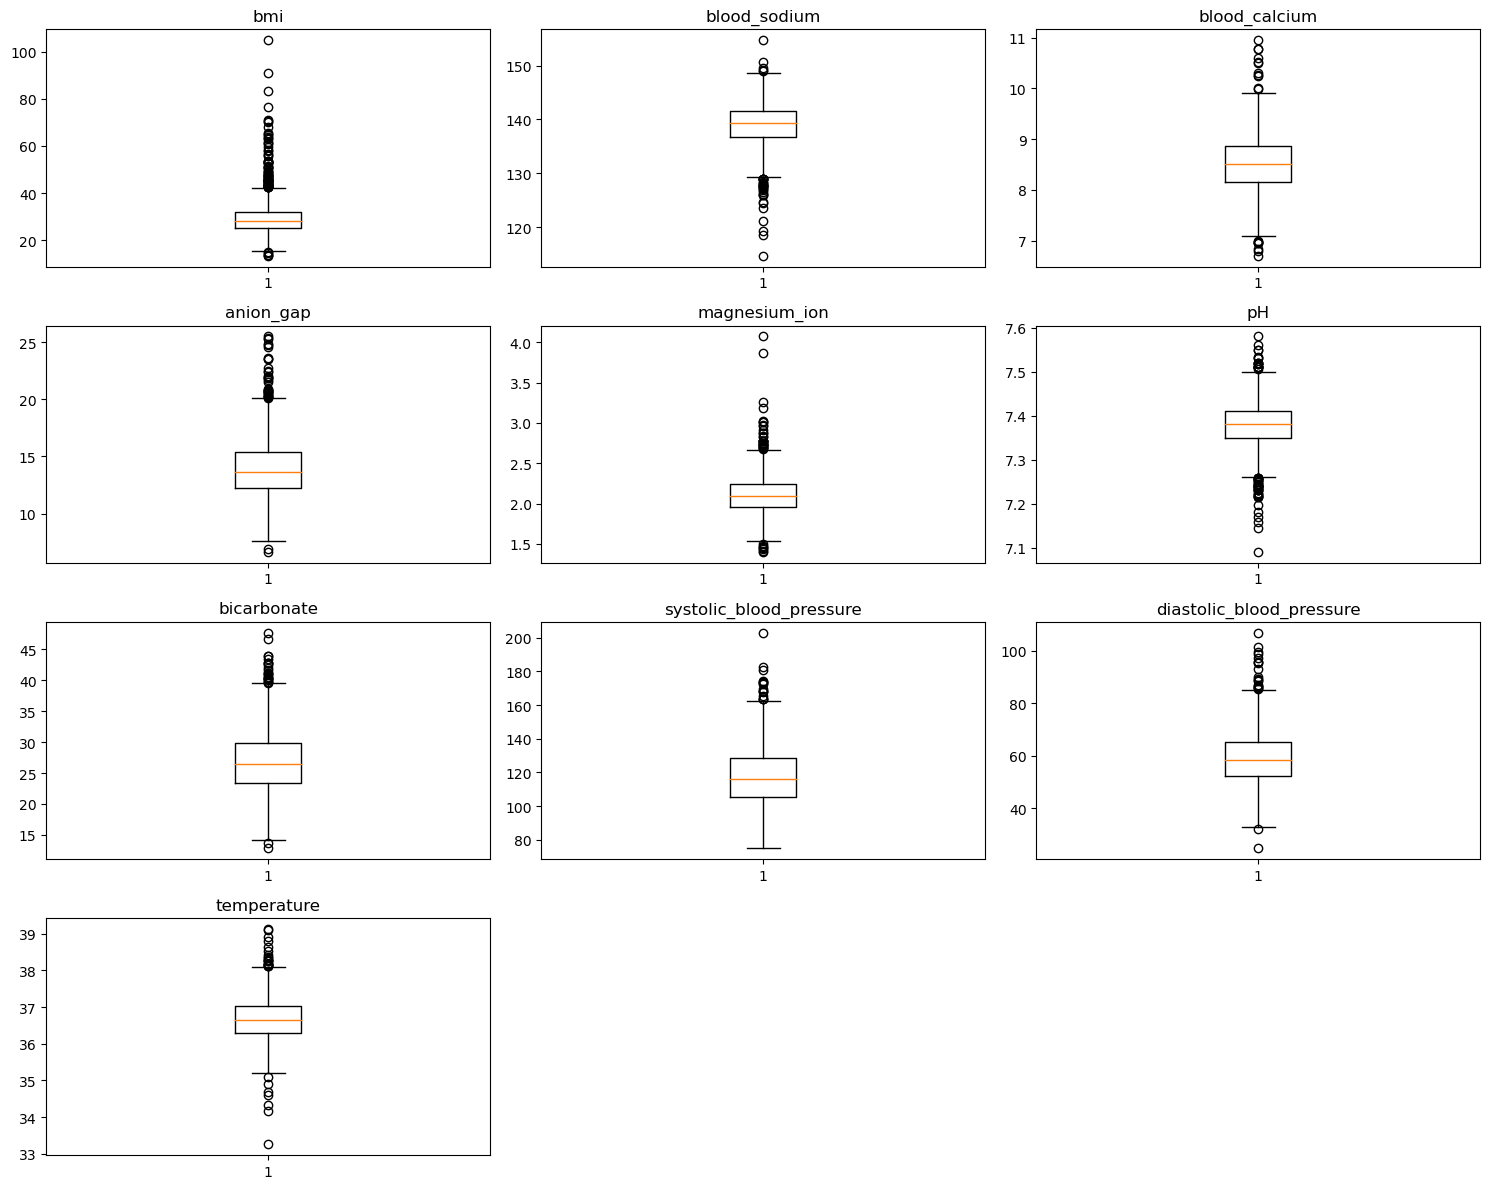

In [39]:
# Select numerical columns in df_1
numerical_cols_df1 = df_1.select_dtypes(include=['float', 'int']).columns
df_1_numerical = df_1[numerical_cols_df1]

#Detect outliers with boxplots
plt.figure(figsize=(15, 12))
           
for i, variable in enumerate(numerical_cols_df1):
    plt.subplot(4, 3, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

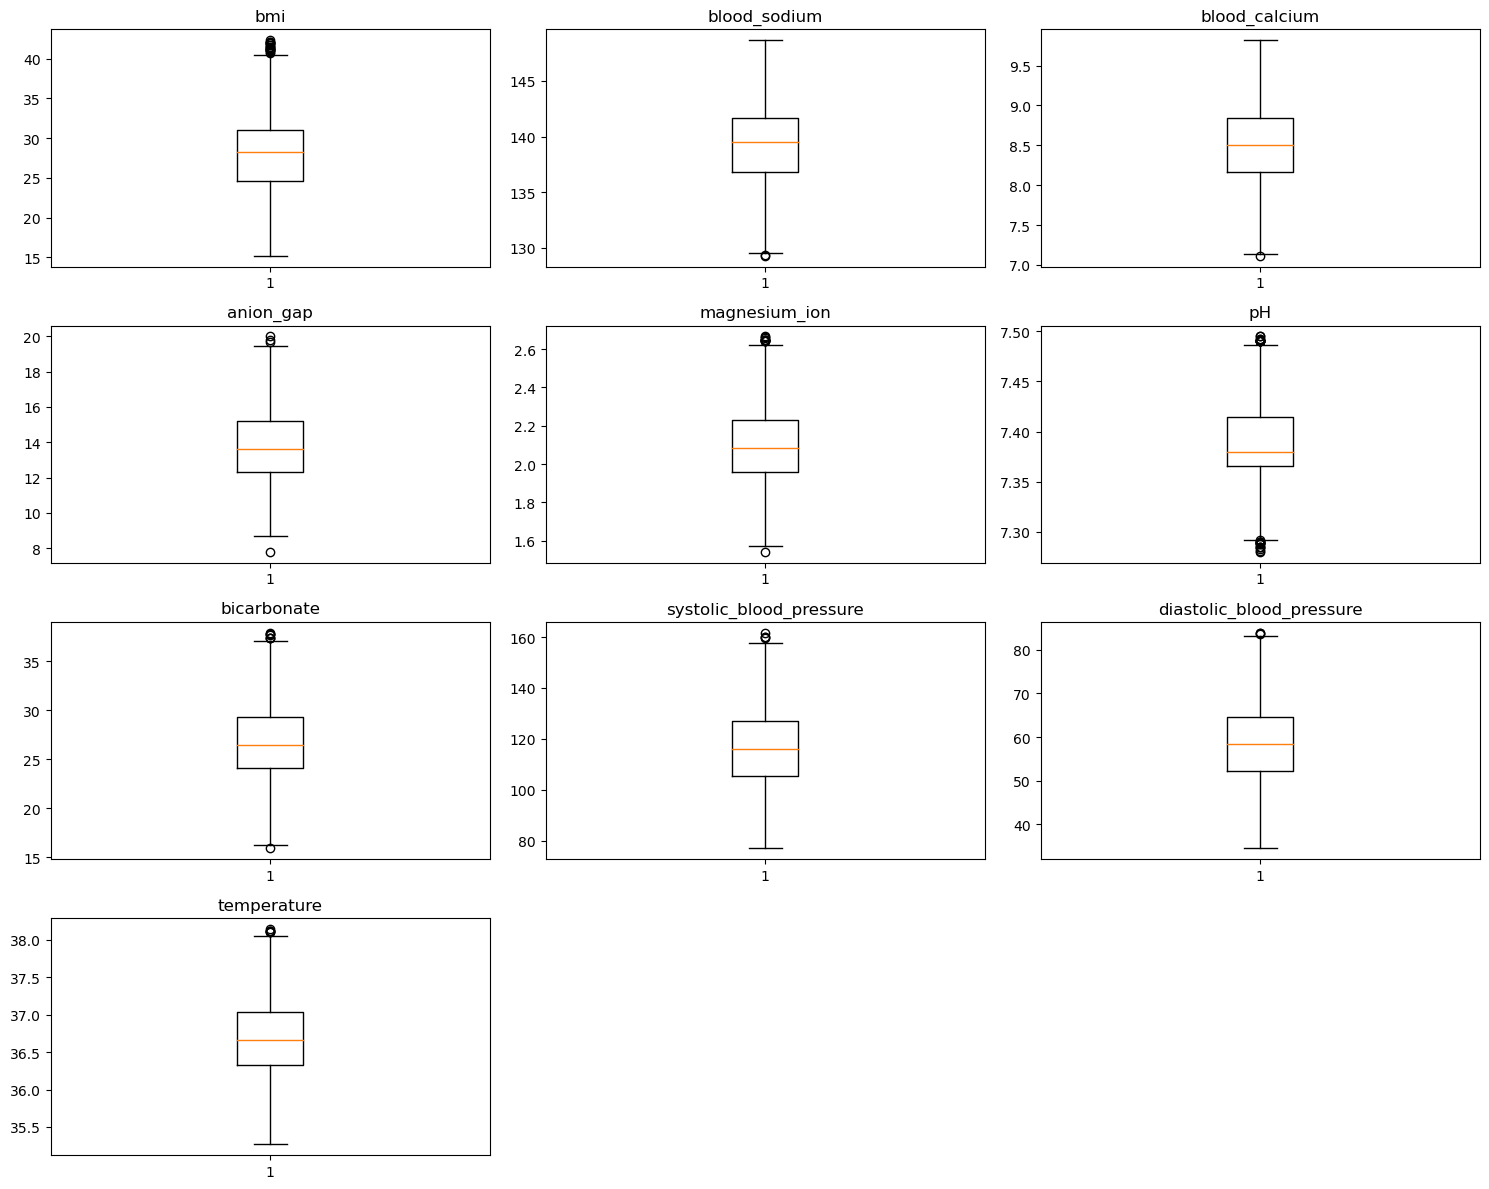

In [40]:
#Remove outliers 
for i in numerical_cols_df1:
    Q1 = df_1[i].quantile(0.25)
    Q3 = df_1[i].quantile(0.75)
    IQR = Q3 - Q1
    df_1 = df_1[~((df_1[i] < (Q1 - 1.5 * IQR)) | (df_1[i] >(Q3 + 1.5 * IQR)))]
    
    
# Check again for outliers with boxplots
plt.figure(figsize=(15, 12))
           
for i, variable in enumerate(numerical_cols_df1):
    plt.subplot(4, 3, i + 1)
    plt.boxplot(df_1[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

#### Observation:
- Outliers have been treated.
- The remaining outliers seen in the boxplot will be maintained because they are considered to be significant

### Step 4: Visualize the Relationship Between the Predictor Variables with Pairplots and a Heatmap

###  Pairplots

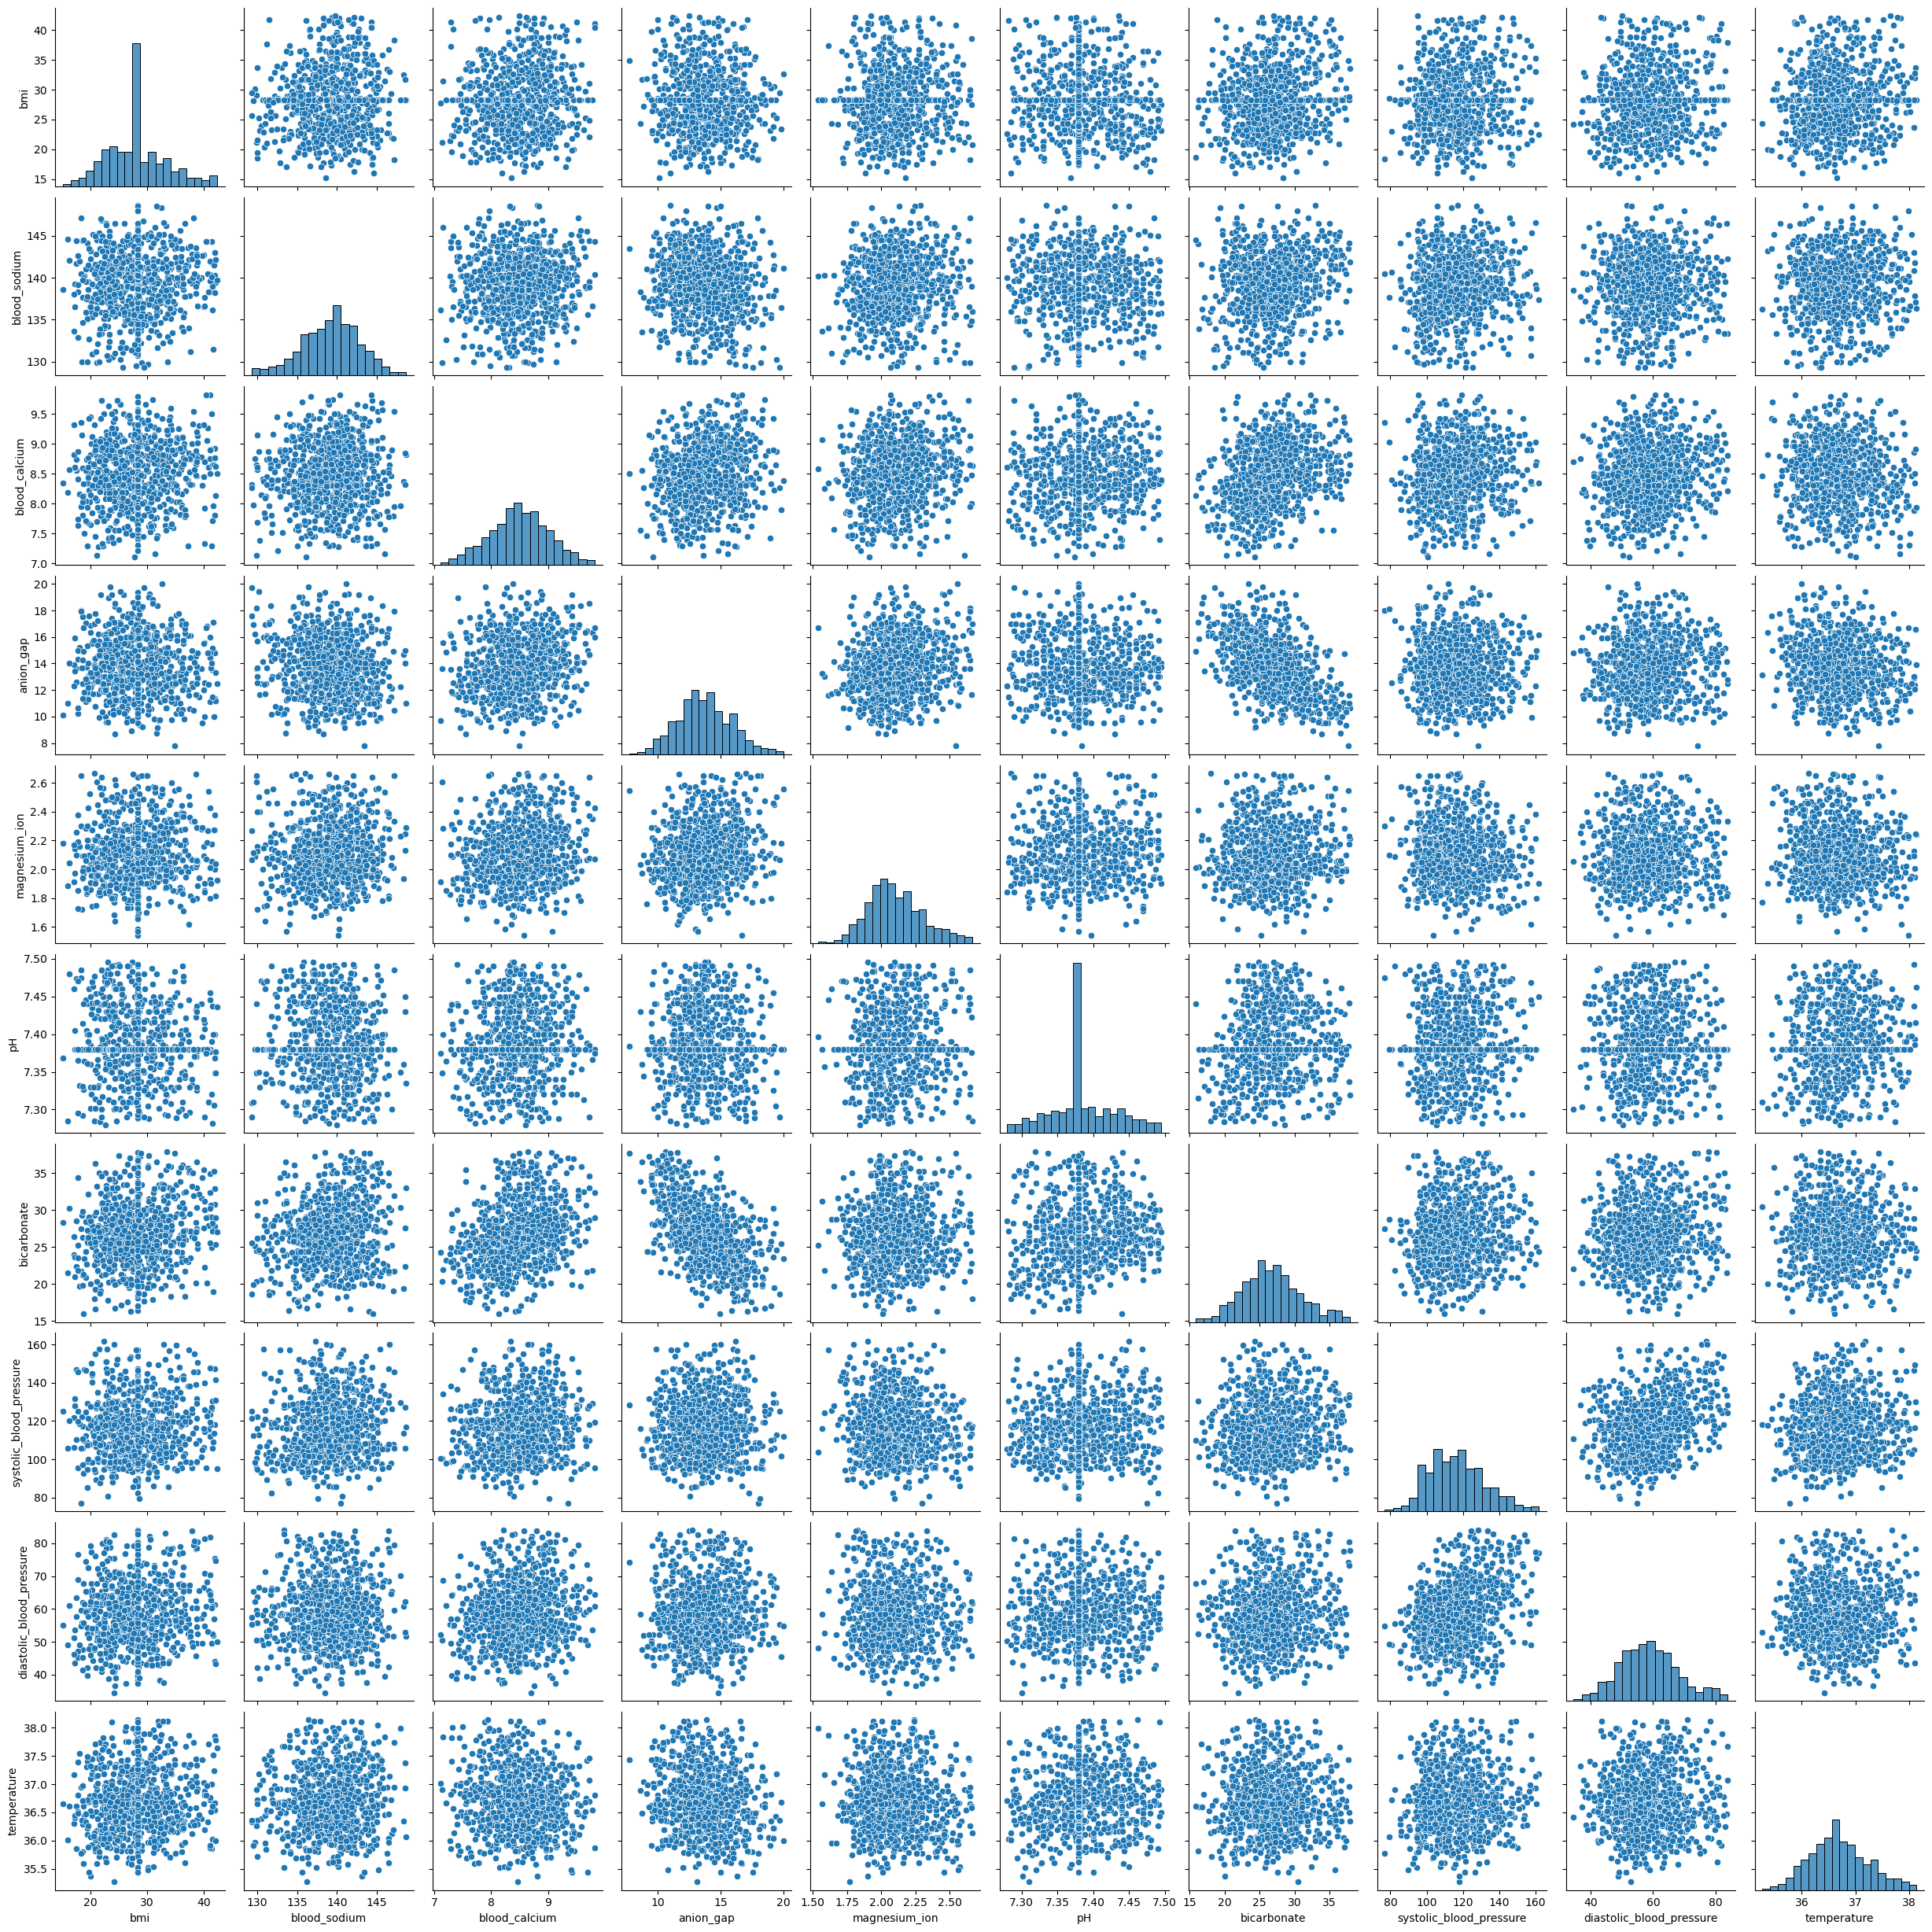

In [41]:
#Make a pair-wise visualization of numerical variables
sns.pairplot(df_1)
plt.show()

#### Observation
- The pairplots of the selected numerical variables are uniformly distributed.
- There is no observed relationship or association between any of the variables.
##### - This is a good first indication for the assessment of the assumption of Multicolinearity.

### Correlation Table

In [42]:
#Create a correlation table for the numerical columns
corr = df_1.corr()
corr

bmi  blood_sodium  blood_calcium  anion_gap  \
bmi                       1.000000      0.079857       0.099044  -0.039280   
blood_sodium              0.079857      1.000000       0.064563  -0.131330   
blood_calcium             0.099044      0.064563       1.000000   0.182114   
anion_gap                -0.039280     -0.131330       0.182114   1.000000   
magnesium_ion             0.032361      0.067626       0.135257   0.156854   
pH                       -0.087616     -0.056566       0.066352  -0.027028   
bicarbonate               0.161419      0.147095       0.287861  -0.532047   
systolic_blood_pressure   0.063375      0.109659       0.096696   0.008270   
diastolic_blood_pressure  0.093835      0.032149       0.121061   0.050212   
temperature               0.082033      0.041287      -0.102401  -0.110909   

                          magnesium_ion        pH  bicarbonate  \
bmi                            0.032361 -0.087616     0.161419   
blood_sodium                   0.067626 -0.056566     0.147095   
blood_calcium                  0.135257  0.066352     0.287861   
anion_gap                      0.156854 -0.027028    -0.532047   
magnesium_ion                  1.000000  0.045388     0.037043   
pH                             0.045388  1.000000     0.109078   
bicarbonate                    0.037043  0.109078     1.000000   
systolic_blood_pressure       -0.067343  0.078968     0.105898   
diastolic_blood_pressure      -0.018275  0.026261     0.083239   
temperature                   -0.078139  0.096244     0.002170   

                          systolic_blood_pressure  diastolic_blood_pressure  \
bmi                                      0.063375                  0.093835   
blood_sodium                             0.109659                  0.032149   
blood_calcium                            0.096696                  0.121061   
anion_gap                                0.008270                  0.050212   
magnesium_ion                           -0.067343                 -0.018275   
pH                                       0.078968                  0.026261   
bicarbonate                              0.105898                  0.083239   
systolic_blood_pressure                  1.000000                  0.325265   
diastolic_blood_pressure                 0.325265                  1.000000   
temperature                              0.063883                  0.007228   

                          temperature  
bmi                          0.082033  
blood_sodium                 0.041287  
blood_calcium               -0.102401  
anion_gap                   -0.110909  
magnesium_ion               -0.078139  
pH                           0.096244  
bicarbonate                  0.002170  
systolic_blood_pressure      0.063883  
diastolic_blood_pressure     0.007228  
temperature                  1.000000

### Heatmap

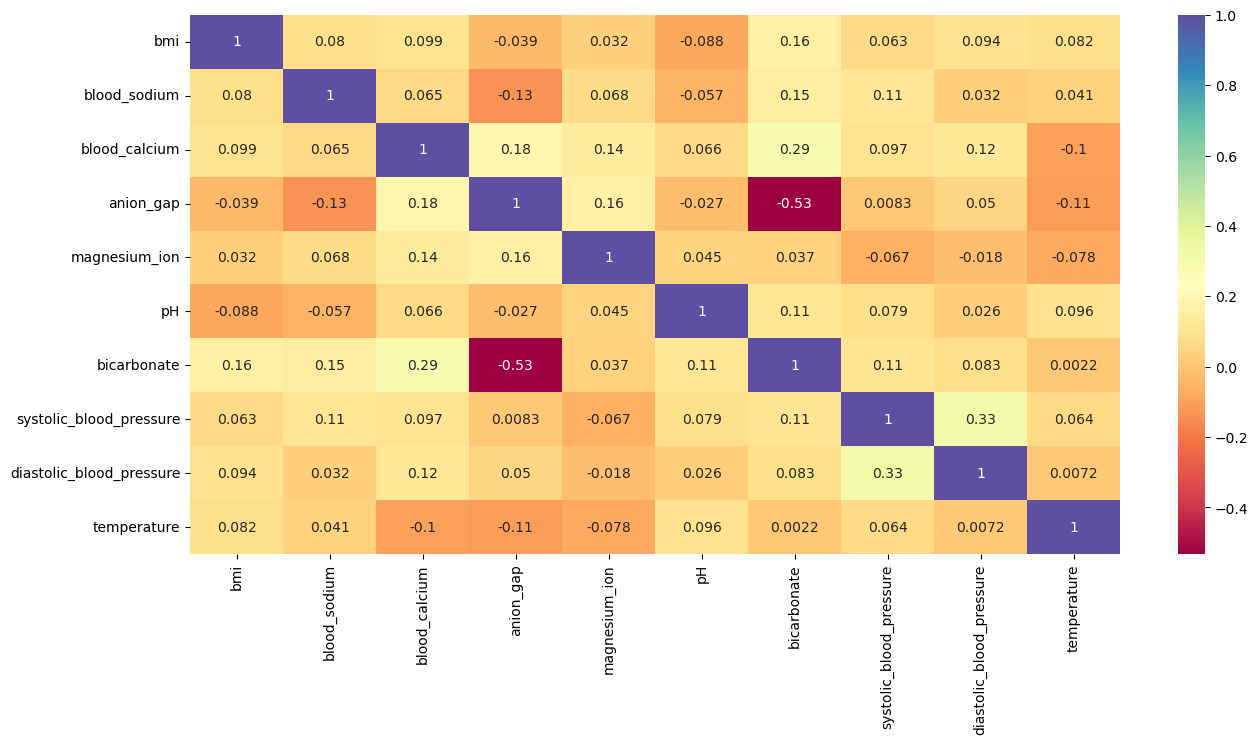

In [43]:
# Draw a heatmap to visualize the correlations
plt.figure(figsize=(15, 7))
sns.heatmap(corr, annot=True, cmap="Spectral")
plt.show()

#### Observation
- None of the predictor variables have a strong correlation.
- All correlation coffeicients are below +/-0.6
###### - This is another good indicator of no multicolinearity between the predictor variables

## ## Preparation of Dataset for modeling: Splitting

In [44]:
# Separating features and the target column
X = df_1.drop('outcome', axis=1)
y = df_1['outcome']

In [45]:
#Prepare a dummy table for the categorical variables
X = pd.get_dummies(X, drop_first=True)

In [46]:
# Splitting the data into train and test sets in 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1, shuffle=True)

#View size of the train set and test set
X_train.shape, X_test.shape

((672, 20), (168, 20))

## Predictive Models
- Logistic Regression
- Decision Tree
- Random Forest


## Model 1: Logistic Regression

#### Assumptions of Linear Regression:
1. Normal Distribution: The variables with continuous data are normally distributed.
2. Multicollinearity: The predictor variables are independent of each other.
3. Linear Relationship: A linear relationship exists between the dependent and independent variables.
4. There is equal variance within the dataset

Accuracy: 0.9047619047619048

 Classification Report: 
               precision    recall  f1-score   support

           0       0.90      1.00      0.95       152
           1       0.00      0.00      0.00        16

    accuracy                           0.90       168
   macro avg       0.45      0.50      0.48       168
weighted avg       0.82      0.90      0.86       168


 Confusion Matrix: 
 [[152   0]
 [ 16   0]]


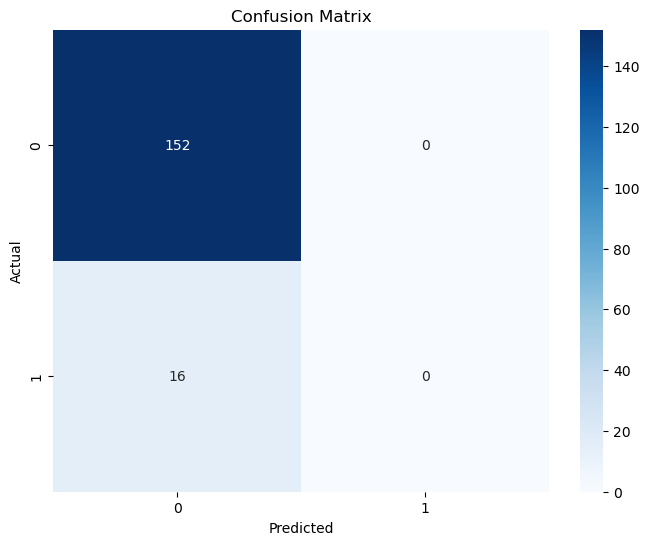

In [47]:
#Draw a Regression model
model= LogisticRegression()
model.fit(X_train, y_train)


#Perform regression analysis on the test set
y_pred=model.predict(X_test)


#Find out how well the model can predict outcomes
print('Accuracy:', accuracy_score(y_test, y_pred))
print('\n Classification Report: \n', classification_report(y_test, y_pred))
print('\n Confusion Matrix: \n', confusion_matrix(y_test, y_pred))

#Plot the confusion matrix
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

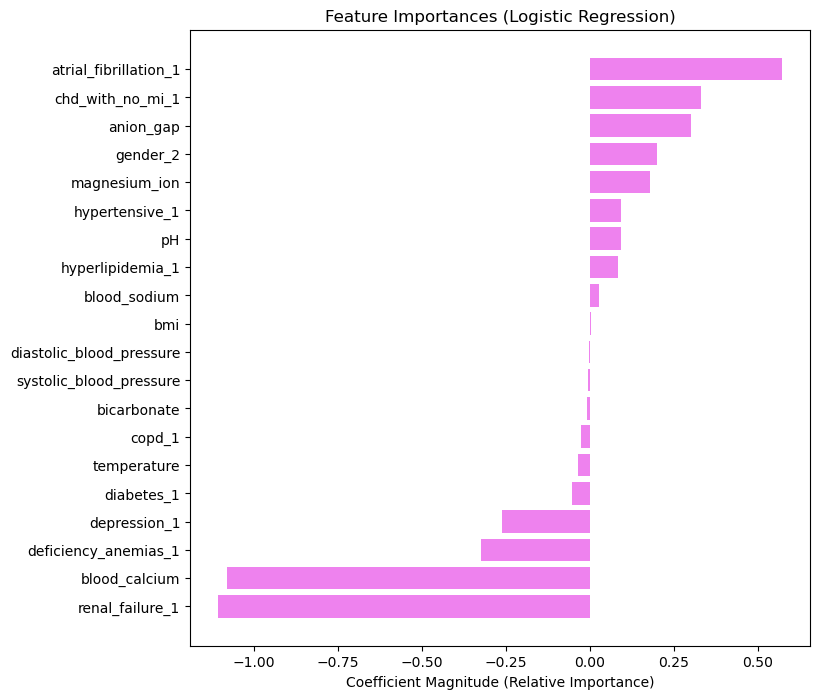

In [48]:
# Exploring the impact of each columns/variable on the model
feature_names = list(X.columns) 
importances = model.coef_[0]  # Access coefficients for Logistic Regression
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances (Logistic Regression)")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Coefficient Magnitude (Relative Importance)")
plt.show()


#### Observations:
The logistic regression model has the following performance parameters for survival:
- Accuracy: 90%
- Recall: 100%
- Precision: 90%
- F1-Score: 95%

The model was however unable to predict mortalities

## Model 2: Decision Tree

Accuracy: 0.8571428571428571

 Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.90      0.92       152
           1       0.32      0.44      0.37        16

    accuracy                           0.86       168
   macro avg       0.63      0.67      0.64       168
weighted avg       0.88      0.86      0.87       168


 Confusion Matrix: 
 [[137  15]
 [  9   7]]


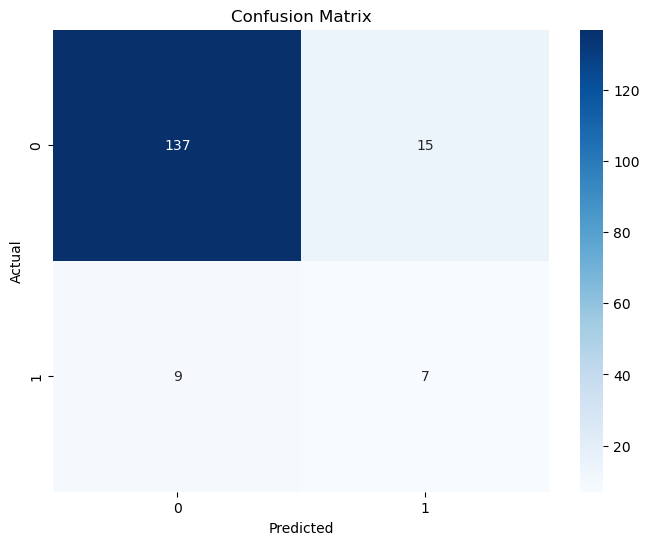

In [49]:
## Performance on train set
model_2 = DecisionTreeClassifier(random_state=1)
model_2.fit(X_train, y_train)

#Perform decision tree analysis on the test set
y_pred_2=model_2.predict(X_test)

#Find out how well the model can predict outcomes
print('Accuracy:', accuracy_score(y_test, y_pred_2))
print('\n Classification Report: \n', classification_report(y_test, y_pred_2))
print('\n Confusion Matrix: \n', confusion_matrix(y_test, y_pred_2))

#Plot the confusion matrix
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_2)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

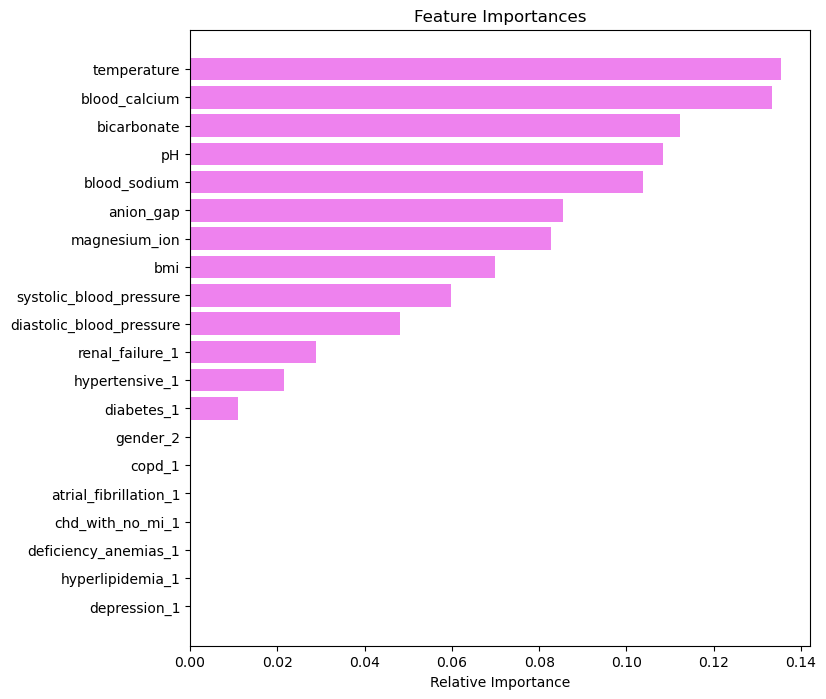

In [50]:
#Exploring the impact of each columns/variable on the model
feature_names = list(X_train.columns)
importances = model_2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

#### Observations:
The decision tree model has the following performance parameters for predicting survival:
- Accuracy: 86%
- Recall: 90%
- Precision: 94%
- F1-Score: 92%

The model however performed poorly in predicting mortality:
- Recall: 44%
- Precision: 32%
- F1-Score: 37%

#### Feature Importance:
In descending order, the most influental predictors in the decision tree model are:
- temperature
- blood_calcium
- bicarbonate
- pH
- blood_sodium
- anion_gap
- magnesium_ion
- bmi
- systolic_blood_pressure
- diastolic_blood_pressure
- renal_failure
- hypertensive
- diabetes


## Model 3: Random Forest

Accuracy: 0.8988095238095238

 Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.99      0.95       152
           1       0.00      0.00      0.00        16

    accuracy                           0.90       168
   macro avg       0.45      0.50      0.47       168
weighted avg       0.82      0.90      0.86       168


 Confusion Matrix: 
 [[151   1]
 [ 16   0]]


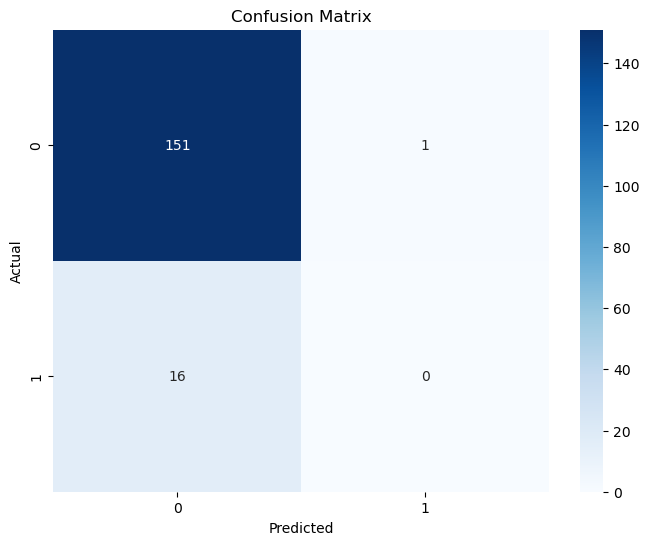

In [51]:
#Train the random forest classifier
model_3=RandomForestClassifier(random_state=1)
model_3.fit(X_train,y_train)

#Perform decision tree analysis on the test set
y_pred_3=model_3.predict(X_test)

#Find out how well the model can predict outcomes
print('Accuracy:', accuracy_score(y_test, y_pred_3))
print('\n Classification Report: \n', classification_report(y_test, y_pred_3))
print('\n Confusion Matrix: \n', confusion_matrix(y_test, y_pred_3))

#Plot the confusion matrix
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_3)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

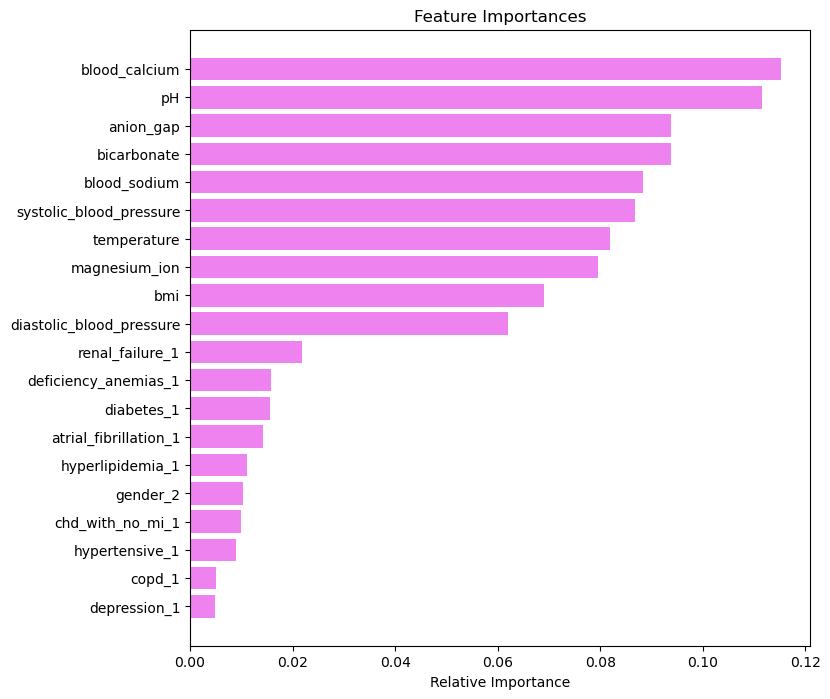

In [52]:
#Exploring the impact of each columns/variable on the model
feature_names = list(X_train.columns)
importances = model_3.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

#### Observations:
The random forest model has the following performance parameters for predicting survival:
- Accuracy: 89.99% 
- Recall: 99%
- Precision: 90%
- F1-Score: 95%

The model however performed poorly in predicting mortalities.

#### Feature Importance:
In descending order, the most influental predictors in the decision tree model are:
- blood_calcium
- pH
- anion_gap
- bicarbonate
- blood_sodium
- systolic_blood_pressure
- temperature
- magnesium_ion
- bmi
- diastolic_blood_pressure
- renal_failure
- deficiency_anemias
- diabetes
- atrial_fibrillation
- hyperlipidemia
- gender
- chd_with_no_mi
- hypertensive
- copd
- depression

### Model Comparison

In [53]:
#Draw a comparison table for all three models (Google Colab, 2023)
# Calculate metrics for Logistic Regression
logreg_precision, logreg_recall, logreg_f1, _ = precision_recall_fscore_support(y_test, y_pred, zero_division=0)

# Calculate metrics for Decision Tree
dt_precision, dt_recall, dt_f1, _ = precision_recall_fscore_support(y_test, y_pred_2, zero_division=0)


# Calculate metrics for Random Forest
rf_precision, rf_recall, rf_f1, _ = precision_recall_fscore_support(y_test, y_pred_3, zero_division=0)

# Create a DataFrame for comparison
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision (Class 0)', 'Precision (Class 1)', 
               'Recall (Class 0)', 'Recall (Class 1)', 
               'F1-score (Class 0)', 'F1-score (Class 1)'],
    'Logistic Regression': [accuracy_score(y_test, y_pred), 
                            logreg_precision[0], logreg_precision[1],
                            logreg_recall[0], logreg_recall[1],
                            logreg_f1[0], logreg_f1[1]],
    'Decision Tree': [accuracy_score(y_test, y_pred_2),
                      dt_precision[0], dt_precision[1],
                      dt_recall[0], dt_recall[1],
                      dt_f1[0], dt_f1[1]],
    'Random Forest': [accuracy_score(y_test, y_pred_3),
                      rf_precision[0], rf_precision[1],
                      rf_recall[0], rf_recall[1],
                      rf_f1[0], rf_f1[1]]
})

# Display the comparison table
metrics_df

Metric  Logistic Regression  Decision Tree  Random Forest
0             Accuracy             0.904762       0.857143       0.898810
1  Precision (Class 0)             0.904762       0.938356       0.904192
2  Precision (Class 1)             0.000000       0.318182       0.000000
3     Recall (Class 0)             1.000000       0.901316       0.993421
4     Recall (Class 1)             0.000000       0.437500       0.000000
5   F1-score (Class 0)             0.950000       0.919463       0.946708
6   F1-score (Class 1)             0.000000       0.368421       0.000000

#### Observation
- All three machine learning models performed well in predicting the survival of heart failure patients in the ICU but performed poorly in their ability to predict mortality.
- Logistic regression had the highest accuracy (90%) which means that this model will be able to predict patient survival 90% of the time. 

### Limitations
### 1. An Imbalanced Dataset
The performance of the predictive models in predicting survival versus mortality can be explained by the low number of mortality cases in this dataset. 
- The original dataset had 159 mortalities against 1018 surviving patients, making 13.5% of the entire dataset.
- After data cleaning, the number of mortalities in the sample used for machine learning was 95 out of 745.

The class imbalance did not provide the models with enough mortality data to learn from.
- Such situations can be handled using resampling strategies for imbalanced datasets.

### 2. The Possibility of True Outliers
Outliers for the numerical variables were also rigidly removed. There is a possibility that some of the removed outliers were significant.

## Conclusion
This analysis involved a sample of 1177 heart failure patients admitted into intensive care units. 13.5% of the patients died. Twenty predictor variables were selected and used to develop a logistic regression model that can accurately predict patient survival 90% of the time.


## References
Centers for Disease Control and Prevention. (2024, May 15). _About heart failure: Overview_. https://www.cdc.gov/heart-disease/about/heart-failure.html

Google Colaboratory (2023). Define an aggregate function for the mean, median, skew and curtosis of a dataset. https://colab.google/

Google Colaboratory (2023). Comparison tables for comparing accuracy, recall, precision and F1 score of predictive models. https://colab.google/

Li, F., Xin, H., Zhang, J., Fu, M., Zhou, J., & Lian, Z. (2021). Prediction model of in-hospital mortality in intensive care unit patients with heart failure: machine learning-based, retrospective analysis of the MIMIC-III database. BMJ Open, 11(7), e044779–e044779. https://doi.org/10.1136/bmjopen-2020-044779